<a href="https://colab.research.google.com/github/Acippppp/ggplot/blob/master/shareholder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


In [ ]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import statistics as stats

In [ ]:
Bursa = pd.read_csv('drive/MyDrive/director_disclosure_bursa_view.csv',encoding='cp1252')
Bursa

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
0,3119718,ANN JOO RESOURCES BERHAD,ANNJOO,Dato' Lim Aun Chuan,7/1/2021,"80,000",Acquired,"RM102,400.00",Acquired from open market,"1,636,000",0.303,Ordinary Shares
1,3119719,ANN JOO RESOURCES BERHAD,ANNJOO,Datuk Kamarudin Bin Md Ali,7/1/2021,"15,000",Acquired,"RM20,550.00",Acquired from open market,"200,000",0.037,Ordinary Shares
2,3119074,ANN JOO RESOURCES BERHAD,ANNJOO,Datuk Kamarudin Bin Md Ali,5/1/2021,"10,000",Acquired,"RM15,300.00",Acquired from open market,"185,000",0.034,Ordinary Shares
3,3119387,APM AUTOMOTIVE HOLDINGS BERHAD,APM,Kenanga Nominees (Tempatan) Sdn Bhd Pledged Se...,4/1/2021,"40,000",Acquired,RM2.5050 per share,Purchase from open market,"10,687,499",5.467,Ordinary Shares
4,3119289,AHMAD ZAKI RESOURCES BERHAD,AZRB,Tan Sri Dato' Lau Yin Pin,5/1/2021,"300,000",Acquired,NaN,Acquisition from the open market,"2,000,000",0.340,Ordinary Shares
...,...,...,...,...,...,...,...,...,...,...,...,...
112,3119761,UWC BERHAD,UWC,Dato' Wan Hashim Bin Wan Jusoh,7/1/2021,"20,000",Acquired,NaN,Open market acquisition of shares,"245,000",0.045,Ordinary shares
113,3119372,VERTICE BERHAD,VERTICE,Wong Kwai Wah,5/1/2021,"100,000",Acquired,RM0.22,Acquisition of shares,"7,754,300",3.335,Ordinary shares
114,3119538,WARISAN TC HOLDINGS BERHAD,WARISAN,Public Nominees (Tempatan) Sdn Bhd : Pledged S...,5/1/2021,"26,000",Acquired,RM1.3500 per ordinary share,Purchase from open market,"4,352,333",6.686,Ordinary Shares
115,3119350,XIAN LENG HOLDINGS BERHAD,XIANLNG,DATO' NG JET HEONG,6/1/2021,"8,000,000",Disposed,NaN,Disposal,"11,751,600",14.771,Ordinary Shares


In [ ]:
Bursa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ref            117 non-null    int64  
 1   company        117 non-null    object 
 2   stock_name     117 non-null    object 
 3   director       117 non-null    object 
 4   date           117 non-null    object 
 5   share          117 non-null    object 
 6   trans_type     117 non-null    object 
 7   price          55 non-null     object 
 8   reason         117 non-null    object 
 9   updated_share  115 non-null    object 
 10  pct_share      115 non-null    float64
 11  description    117 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.1+ KB


In [ ]:
Bursa['share']=Bursa['share'].str.replace(',','').astype(float)


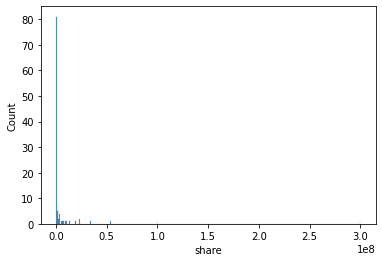

In [ ]:
#Histogram for volume
sns.histplot(x='share',data=Bursa)

In [ ]:
#log transform
Bursa['share']=np.log10(Bursa['share'])

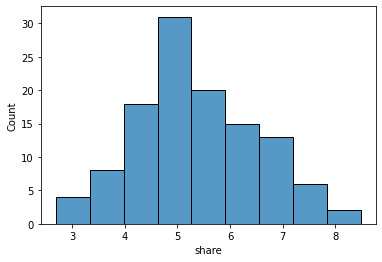

In [ ]:
sns.histplot(x='share',data=Bursa)

In [ ]:
Bursa

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
0,3119718,ANN JOO RESOURCES BERHAD,ANNJOO,Dato' Lim Aun Chuan,7/1/2021,4.903090,Acquired,"RM102,400.00",Acquired from open market,"1,636,000",0.303,Ordinary Shares
1,3119719,ANN JOO RESOURCES BERHAD,ANNJOO,Datuk Kamarudin Bin Md Ali,7/1/2021,4.176091,Acquired,"RM20,550.00",Acquired from open market,"200,000",0.037,Ordinary Shares
2,3119074,ANN JOO RESOURCES BERHAD,ANNJOO,Datuk Kamarudin Bin Md Ali,5/1/2021,4.000000,Acquired,"RM15,300.00",Acquired from open market,"185,000",0.034,Ordinary Shares
3,3119387,APM AUTOMOTIVE HOLDINGS BERHAD,APM,Kenanga Nominees (Tempatan) Sdn Bhd Pledged Se...,4/1/2021,4.602060,Acquired,RM2.5050 per share,Purchase from open market,"10,687,499",5.467,Ordinary Shares
4,3119289,AHMAD ZAKI RESOURCES BERHAD,AZRB,Tan Sri Dato' Lau Yin Pin,5/1/2021,5.477121,Acquired,NaN,Acquisition from the open market,"2,000,000",0.340,Ordinary Shares
...,...,...,...,...,...,...,...,...,...,...,...,...
112,3119761,UWC BERHAD,UWC,Dato' Wan Hashim Bin Wan Jusoh,7/1/2021,4.301030,Acquired,NaN,Open market acquisition of shares,"245,000",0.045,Ordinary shares
113,3119372,VERTICE BERHAD,VERTICE,Wong Kwai Wah,5/1/2021,5.000000,Acquired,RM0.22,Acquisition of shares,"7,754,300",3.335,Ordinary shares
114,3119538,WARISAN TC HOLDINGS BERHAD,WARISAN,Public Nominees (Tempatan) Sdn Bhd : Pledged S...,5/1/2021,4.414973,Acquired,RM1.3500 per ordinary share,Purchase from open market,"4,352,333",6.686,Ordinary Shares
115,3119350,XIAN LENG HOLDINGS BERHAD,XIANLNG,DATO' NG JET HEONG,6/1/2021,6.903090,Disposed,NaN,Disposal,"11,751,600",14.771,Ordinary Shares


In [ ]:
import pandas_datareader.data as web
import datetime


In [ ]:
Dis = Bursa[Bursa['trans_type']=='Disposed']
Dis

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
5,3119392,ES CERAMICS TECHNOLOGY BHD,ESCERAM,RITHAUDDIN HUSSEIN JAMALATIFF BIN JAMALUDDIN,07/01/2021,5.176091,Disposed,RM0.30 per warrant,Disposal of Warrants,NaN,NaN,Warrants B (2020/2023)
9,3119529,THETA EDGE BERHAD,THETA,CGS-CIMB Nominees (Tempatan) Sdn Bhd - Pledged...,07/01/2021,4.845098,Disposed,RM0.876 per share (average price),Disposal in Open Market,"280,000",0.261,Ordinary Shares
18,3119889,SENTORIA GROUP BERHAD,SNTORIA,Base Rock Sdn. Bhd.,07/01/2021,6.176091,Disposed,NaN,Disposal via married deal,NaN,NaN,Ordinary shares
26,3119245,THETA EDGE BERHAD,THETA,CGS-CIMB Nominees (Tempatan) Sdn Bhd - Pledged...,06/01/2021,5.000000,Disposed,RM0.943 per share (average price),Disposal in Open Market,"350,000",0.326,Ordinary Shares
27,3119350,XIAN LENG HOLDINGS BERHAD,XIANLNG,DATO' NG JET HEONG,06/01/2021,6.903090,Disposed,NaN,Disposal,"11,751,600",14.771,Ordinary Shares
41,3118939,THETA EDGE BERHAD,THETA,CGS-CIMB Nominees (Tempatan) Sdn Bhd - Pledged...,05/01/2021,5.184407,Disposed,RM0.893 (average price),Disposal in Open Market,"450,000",0.420,Ordinary Shares
43,3119089,MMS VENTURES BERHAD,MMSV,Sim Goay Hoon,05/01/2021,4.903090,Disposed,NaN,Disposal of Shares in Open Market,"31,676,007",15.504,Ordinary Shares
50,3119138,PEGASUS HEIGHTS BERHAD,PHB,RHB Nominees (Tempatan) Sdn Bhd Toh Hong Chye,05/01/2021,8.000000,Disposed,RM0.015,Disposal of Warrants via off market.,"139,367,892",4.395,Warrants
51,3119139,PEGASUS HEIGHTS BERHAD,PHB,Chin Pak Loong,05/01/2021,8.477121,Disposed,RM0.02,Disposal of ordinary shares via off market.,"1,505,263,143",14.428,Ordinary Share
53,3119201,TOYO VENTURES HOLDINGS BERHAD,TOYOVEN-WB,SONG KOK CHEONG,05/01/2021,5.000000,Disposed,NaN,Direct Interest:-\r\n- Disposal warrants throu...,"550,000",1.028,Warrants 2018/2023


In [ ]:
#Number of Disposed
len(Dis.index)

25

# ***ACQUIRED (AMENDMENT)***

In [ ]:
Acq = Bursa[Bursa['trans_type']=='Acquired'].sort_values(by=['share'],ascending=0).head(15)
Acq

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
39,3119756,HEXTAR GLOBAL BERHAD,HEXTAR,Hextar Holdings Sdn Bhd,6/1/2021,7.363386,Acquired,NaN,Direct Business Transaction,0,0.000,Ordinary Shares
40,3119757,HEXTAR GLOBAL BERHAD,HEXTAR,Hextar Holdings Sdn Bhd,6/1/2021,7.363386,Acquired,NaN,Direct Business Transaction,"31,238,500",3.806,Ordinary Shares
94,3119441,TITIJAYA LAND BERHAD,TITIJYA,LIM POH YIT,4/1/2021,7.272770,Acquired,NaN,Acquisition via direct business transaction,"45,578,600",3.575,Ordinary Shares
91,3118987,TIGER SYNERGY BERHAD,TIGER,Dato' Tan Wei Lian,4/1/2021,6.854543,Acquired,NaN,1 Acquisition of Ordinary Shares through Open ...,"10,331,675",0.703,Ordinary Shares
92,3118989,TIGER SYNERGY BERHAD,TIGER,Dato' Tan Wei Lian,4/1/2021,6.854543,Acquired,NaN,1 Acquisition of Ordinary Shares through Open ...,"194,732,459",13.259,Ordinary Shares
57,3119088,METRONIC GLOBAL BERHAD,MTRONIC,Amsec Nominees (Tempatan) Sdn Bhd Pledged Secu...,4/1/2021,6.845098,Acquired,RM0.17,"1. Acquisition of 7,000,000 ordinary shares vi...","23,017,000",1.789,Ordinary Shares
5,3118941,BCM ALLIANCE BERHAD,BCMALL,Yap Kim Choy,4/1/2021,6.579784,Acquired,NaN,Acquisition of ordinary shares via off market,"3,800,000",0.789,Ordinary Shares
97,3118883,TOP GLOVE CORPORATION BHD,TOPGLOV,RHB NOMINEES (TEMPATAN) SDN BHD PLEDGED SECURI...,4/1/2021,6.558709,Acquired,RM5.5217 Per Share,Acquisition of shares.,"2,105,671,456",26.247,Ordinary Shares
96,3118881,TOP GLOVE CORPORATION BHD,TOPGLOV,RHB NOMINEES (TEMPATAN) SDN BHD PLEDGED SECURI...,4/1/2021,6.558709,Acquired,RM5.5217 Per Share,Acquisition of shares by Tan Sri Dr Lim Wee Chai.,"22,291,176",0.278,Ordinary Shares
98,3118885,TOP GLOVE CORPORATION BHD,TOPGLOV,RHB NOMINEES (TEMPATAN) SDN BHD PLEDGED SECURI...,4/1/2021,6.558709,Acquired,RM5.5217 Per Share,Acquisition of shares by Tan Sri Dr Lim Wee Chai.,"112,061,244",1.397,Ordinary Shares


In [ ]:
#Number of Acquired
len(Acq)

67

In [ ]:
#HEXTAR
#TITIJAYA
#TIGER
#MTRO
#BCMALL
#TOP


start = datetime.datetime(2021,1,1)
end = datetime.datetime(2021,1,31)

HEX = web.DataReader('5151.kl','yahoo',start,end).reset_index()
TITI = web.DataReader('5239.kl','yahoo',start,end).reset_index()
TIGER = web.DataReader('7079.kl','yahoo',start,end).reset_index()
MET = web.DataReader('0043.kl','yahoo',start,end).reset_index()
BCM = web.DataReader('0187.kl','yahoo',start,end).reset_index()
TOP= web.DataReader('7113.kl','yahoo',start,end).reset_index()

In [ ]:
time= datetime.datetime(2021,1,6)

Text(0, 0.5, 'HEXTAR GLOBAL BERHAD')

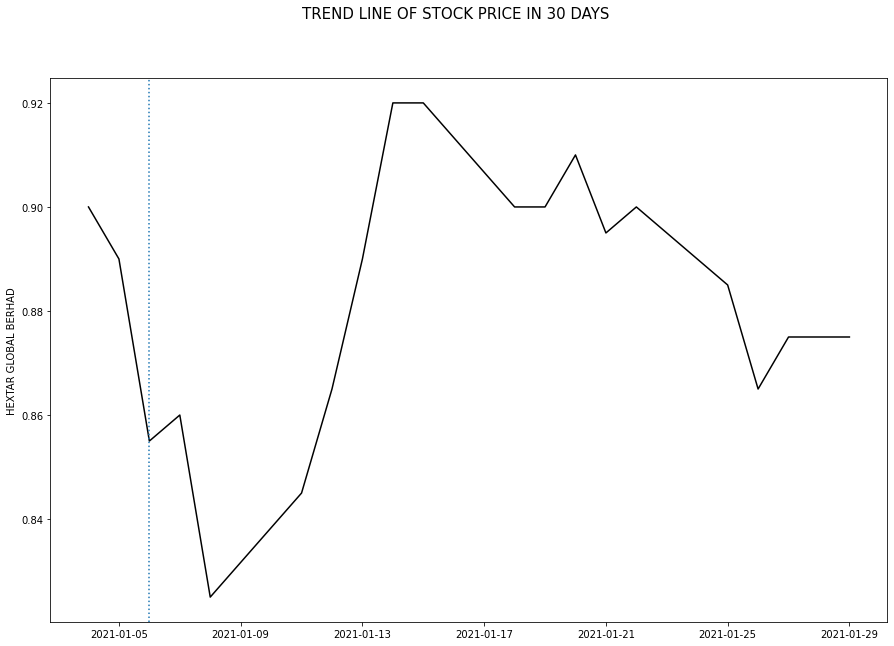

In [ ]:
fig,(ax1) = plt.subplots(1,1,figsize=(15,10))
fig.suptitle('TREND LINE OF STOCK PRICE IN 30 DAYS',fontsize=15)
ax1.plot(HEX.Date,HEX.Close, color='k') 
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('HEXTAR GLOBAL BERHAD')

In [ ]:
time= datetime.datetime(2021,1,4)

Text(0, 0.5, 'TITIJAYA LAND BERHAD')

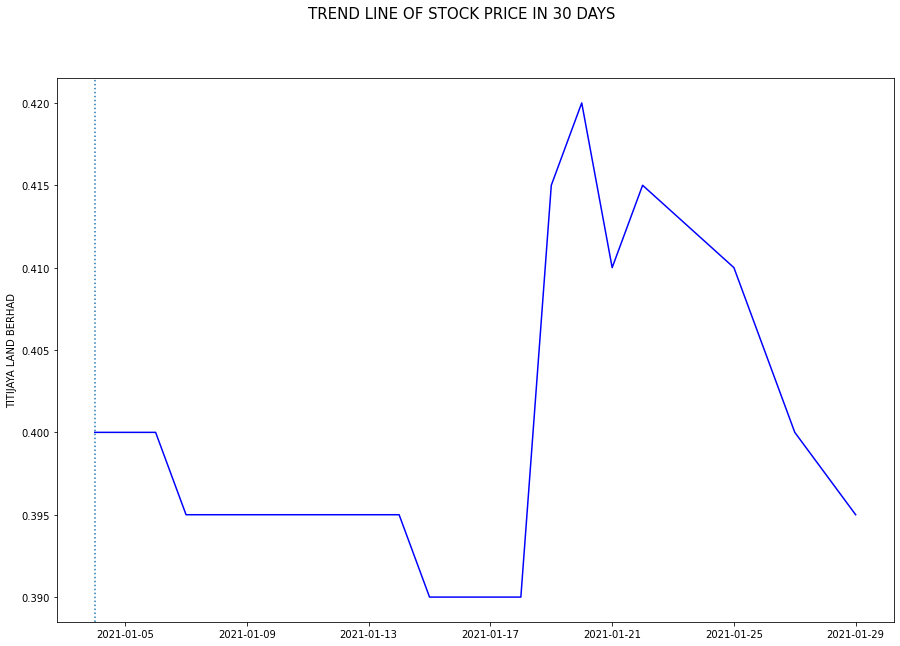

In [ ]:
fig,(ax1) = plt.subplots(1,1,figsize=(15,10))
fig.suptitle('TREND LINE OF STOCK PRICE IN 30 DAYS',fontsize=15)
ax1.plot(TITI.Date,TITI.Close, color='b') 
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('TITIJAYA LAND BERHAD')

Text(0, 0.5, 'TIGER SYNERGY BERHAD')

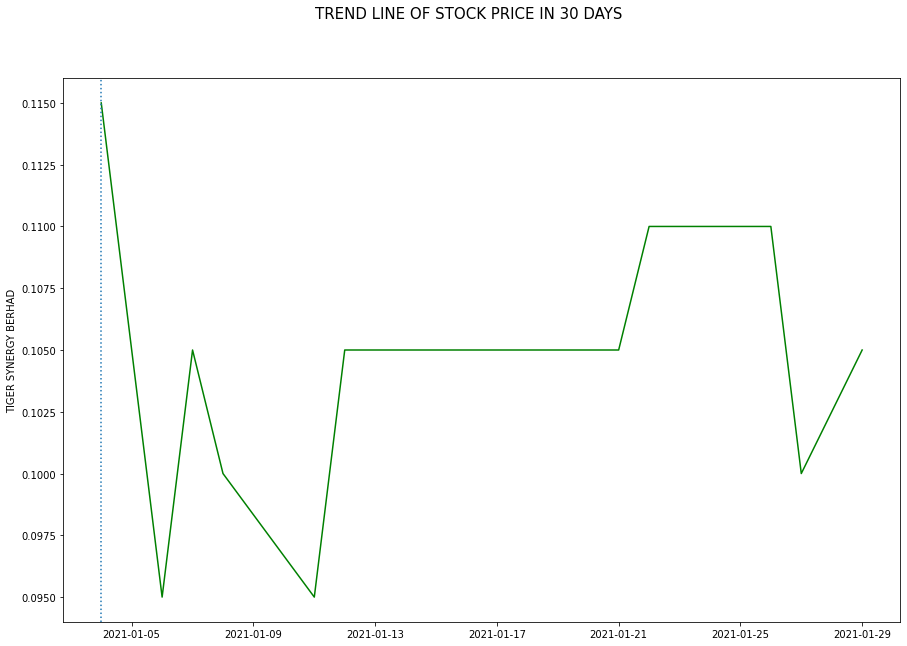

In [ ]:
fig,(ax1) = plt.subplots(1,1,figsize=(15,10))
fig.suptitle('TREND LINE OF STOCK PRICE IN 30 DAYS',fontsize=15)
ax1.plot(TIGER.Date,TIGER.Close, color='g') 
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('TIGER SYNERGY BERHAD')

Text(0, 0.5, 'METRONIC GLOBAL BERHAD')

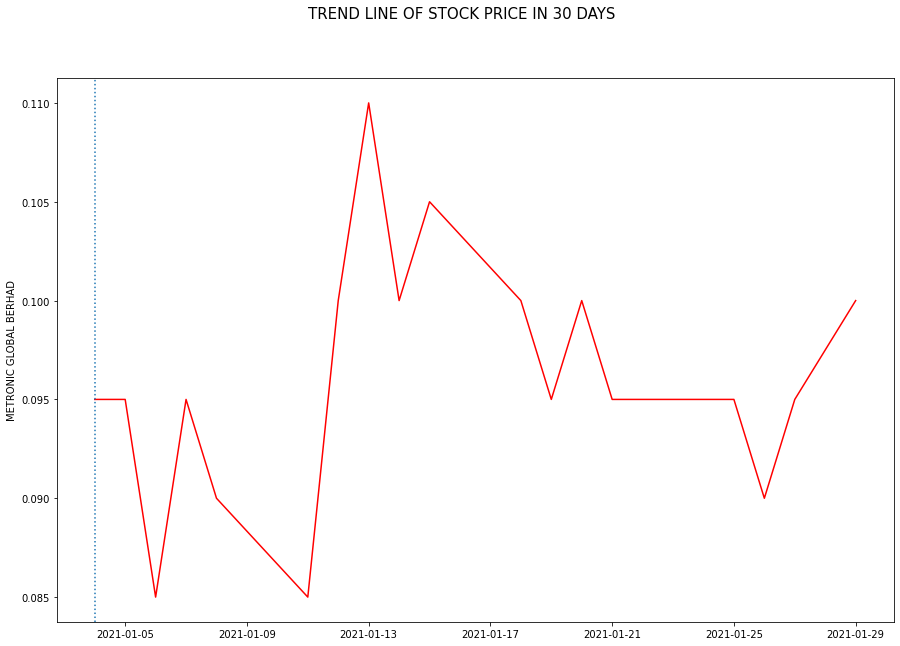

In [ ]:
fig,(ax1) = plt.subplots(1,1,figsize=(15,10))
fig.suptitle('TREND LINE OF STOCK PRICE IN 30 DAYS',fontsize=15)
ax1.plot(MET.Date,MET.Close, color='r') 
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('METRONIC GLOBAL BERHAD')

Text(0, 0.5, 'BCM ALLIANCE BERHAD')

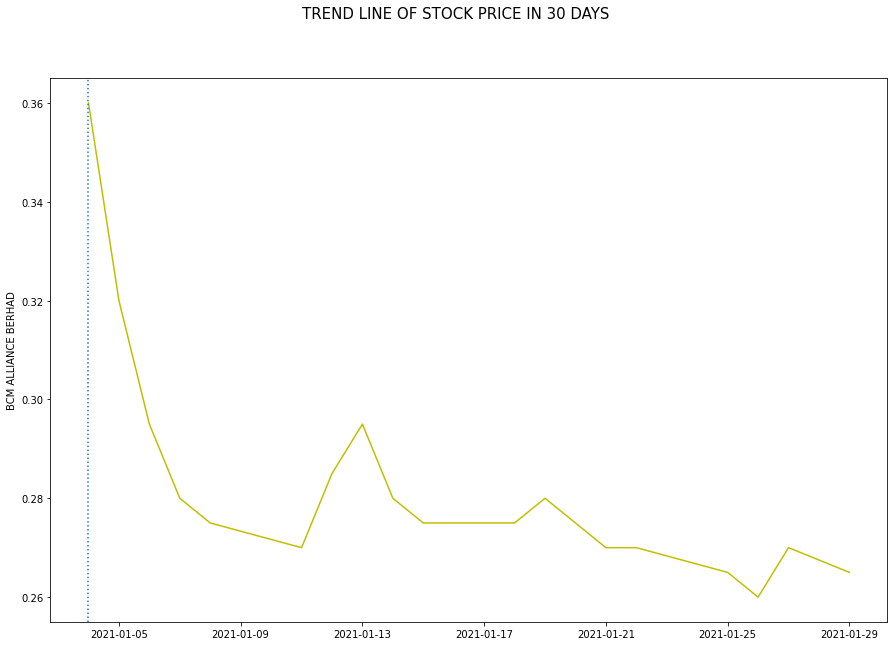

In [ ]:
fig,(ax1) = plt.subplots(1,1,figsize=(15,10))
fig.suptitle('TREND LINE OF STOCK PRICE IN 30 DAYS',fontsize=15)
ax1.plot(BCM.Date,BCM.Close, color='y') 
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('BCM ALLIANCE BERHAD')

Text(0, 0.5, 'TOPGLOVE CORPORATION BERHAD')

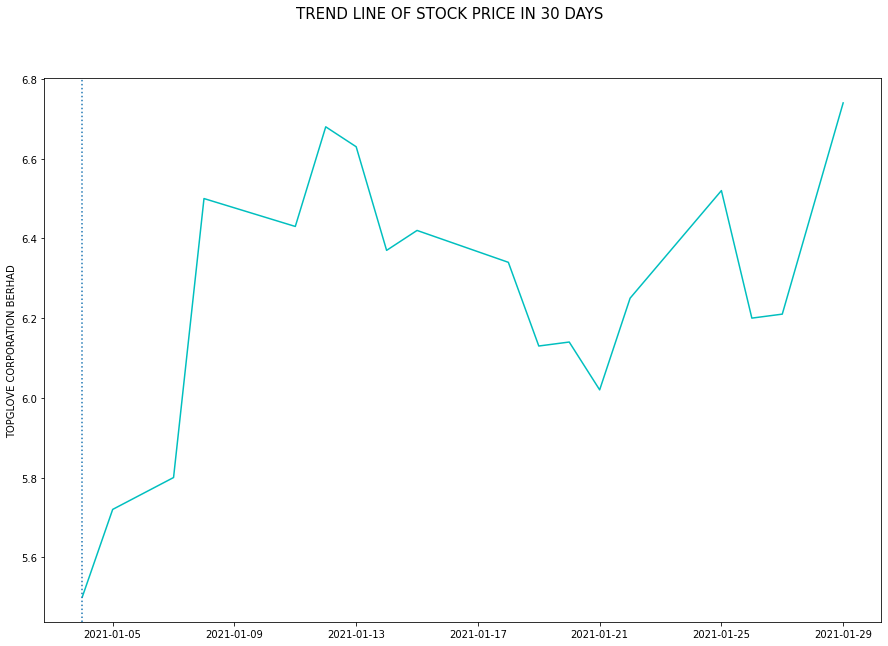

In [ ]:
fig,(ax1) = plt.subplots(1,1,figsize=(15,10))
fig.suptitle('TREND LINE OF STOCK PRICE IN 30 DAYS',fontsize=15)
ax1.plot(TOP.Date,TOP.Close, color='c') 
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('TOPGLOVE CORPORATION BERHAD')

In [ ]:
Acq = Bursa[Bursa['trans_type']=='Acquired'].sort_values(by=['share'],ascending=0).head(8)
Acq

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
39,3119756,HEXTAR GLOBAL BERHAD,HEXTAR,Hextar Holdings Sdn Bhd,6/1/2021,7.363386,Acquired,NaN,Direct Business Transaction,0,0.000,Ordinary Shares
40,3119757,HEXTAR GLOBAL BERHAD,HEXTAR,Hextar Holdings Sdn Bhd,6/1/2021,7.363386,Acquired,NaN,Direct Business Transaction,"31,238,500",3.806,Ordinary Shares
94,3119441,TITIJAYA LAND BERHAD,TITIJYA,LIM POH YIT,4/1/2021,7.272770,Acquired,NaN,Acquisition via direct business transaction,"45,578,600",3.575,Ordinary Shares
91,3118987,TIGER SYNERGY BERHAD,TIGER,Dato' Tan Wei Lian,4/1/2021,6.854543,Acquired,NaN,1 Acquisition of Ordinary Shares through Open ...,"10,331,675",0.703,Ordinary Shares
92,3118989,TIGER SYNERGY BERHAD,TIGER,Dato' Tan Wei Lian,4/1/2021,6.854543,Acquired,NaN,1 Acquisition of Ordinary Shares through Open ...,"194,732,459",13.259,Ordinary Shares
57,3119088,METRONIC GLOBAL BERHAD,MTRONIC,Amsec Nominees (Tempatan) Sdn Bhd Pledged Secu...,4/1/2021,6.845098,Acquired,RM0.17,"1. Acquisition of 7,000,000 ordinary shares vi...","23,017,000",1.789,Ordinary Shares
5,3118941,BCM ALLIANCE BERHAD,BCMALL,Yap Kim Choy,4/1/2021,6.579784,Acquired,NaN,Acquisition of ordinary shares via off market,"3,800,000",0.789,Ordinary Shares
97,3118883,TOP GLOVE CORPORATION BHD,TOPGLOV,RHB NOMINEES (TEMPATAN) SDN BHD PLEDGED SECURI...,4/1/2021,6.558709,Acquired,RM5.5217 Per Share,Acquisition of shares.,"2,105,671,456",26.247,Ordinary Shares


In [ ]:
Company = [HEX, HEX, TITI, TIGER, TIGER, MET, BCM, TOP]

In [ ]:
for i in range (len(Company)):
  print(Company[i])

         Date   High    Low   Open  Close   Volume  Adj Close
0  2021-01-04  0.930  0.890  0.910  0.900  1746900   0.894146
1  2021-01-05  0.910  0.885  0.890  0.890  1858200   0.884211
2  2021-01-06  0.890  0.855  0.890  0.855  3148200   0.849439
3  2021-01-07  0.860  0.840  0.860  0.860  1975500   0.854407
4  2021-01-08  0.860  0.820  0.860  0.825  4544600   0.819634
5  2021-01-11  0.865  0.815  0.825  0.845  2517000   0.839504
6  2021-01-12  0.875  0.830  0.830  0.865  2492900   0.859374
7  2021-01-13  0.915  0.865  0.865  0.890  4135900   0.884211
8  2021-01-14  0.940  0.890  0.900  0.920  6741100   0.914016
9  2021-01-15  0.935  0.910  0.925  0.920  2596200   0.914016
10 2021-01-18  0.920  0.890  0.920  0.900  2560000   0.894146
11 2021-01-19  0.910  0.895  0.895  0.900  1560600   0.894146
12 2021-01-20  0.910  0.895  0.900  0.910  1630700   0.904081
13 2021-01-21  0.910  0.895  0.910  0.895  1784500   0.889179
14 2021-01-22  0.905  0.895  0.900  0.900  1149300   0.894146
15 2021-

In [ ]:
pct_chg =[]
for i in range(0,8):
  df=(Company[i].loc[12,'Close']-Company[i].loc[0,'Close'])/(Company[i].loc[0,'Close'])*100
  pct_chg.append(df)
pct_chg

[1.111116703645831,
 1.111116703645831,
 4.999995157122685,
 -8.69565668088043,
 -8.69565668088043,
 5.263160784158717,
 -23.611112490848203,
 11.636361208829014]

In [ ]:
Acq['pct_chg_for_30days']=pct_chg
Acq

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description,pct_chg_for_30days
39,3119756,HEXTAR GLOBAL BERHAD,HEXTAR,Hextar Holdings Sdn Bhd,6/1/2021,7.363386,Acquired,NaN,Direct Business Transaction,0,0.000,Ordinary Shares,1.111117
40,3119757,HEXTAR GLOBAL BERHAD,HEXTAR,Hextar Holdings Sdn Bhd,6/1/2021,7.363386,Acquired,NaN,Direct Business Transaction,"31,238,500",3.806,Ordinary Shares,1.111117
94,3119441,TITIJAYA LAND BERHAD,TITIJYA,LIM POH YIT,4/1/2021,7.272770,Acquired,NaN,Acquisition via direct business transaction,"45,578,600",3.575,Ordinary Shares,4.999995
91,3118987,TIGER SYNERGY BERHAD,TIGER,Dato' Tan Wei Lian,4/1/2021,6.854543,Acquired,NaN,1 Acquisition of Ordinary Shares through Open ...,"10,331,675",0.703,Ordinary Shares,-8.695657
92,3118989,TIGER SYNERGY BERHAD,TIGER,Dato' Tan Wei Lian,4/1/2021,6.854543,Acquired,NaN,1 Acquisition of Ordinary Shares through Open ...,"194,732,459",13.259,Ordinary Shares,-8.695657
57,3119088,METRONIC GLOBAL BERHAD,MTRONIC,Amsec Nominees (Tempatan) Sdn Bhd Pledged Secu...,4/1/2021,6.845098,Acquired,RM0.17,"1. Acquisition of 7,000,000 ordinary shares vi...","23,017,000",1.789,Ordinary Shares,5.263161
5,3118941,BCM ALLIANCE BERHAD,BCMALL,Yap Kim Choy,4/1/2021,6.579784,Acquired,NaN,Acquisition of ordinary shares via off market,"3,800,000",0.789,Ordinary Shares,-23.611112
97,3118883,TOP GLOVE CORPORATION BHD,TOPGLOV,RHB NOMINEES (TEMPATAN) SDN BHD PLEDGED SECURI...,4/1/2021,6.558709,Acquired,RM5.5217 Per Share,Acquisition of shares.,"2,105,671,456",26.247,Ordinary Shares,11.636361


In [ ]:
Acq=Acq.sort_values(by=['pct_chg_for_30days'],ascending=0)

In [ ]:
acq=set(pct_chg)

In [ ]:
acq=list(acq)
acq

[1.111116703645831,
 4.999995157122685,
 5.263160784158717,
 -23.611112490848203,
 11.636361208829014,
 -8.69565668088043]

In [ ]:
acq.sort(reverse=True)

Text(0, 0.5, 'Stock Name')

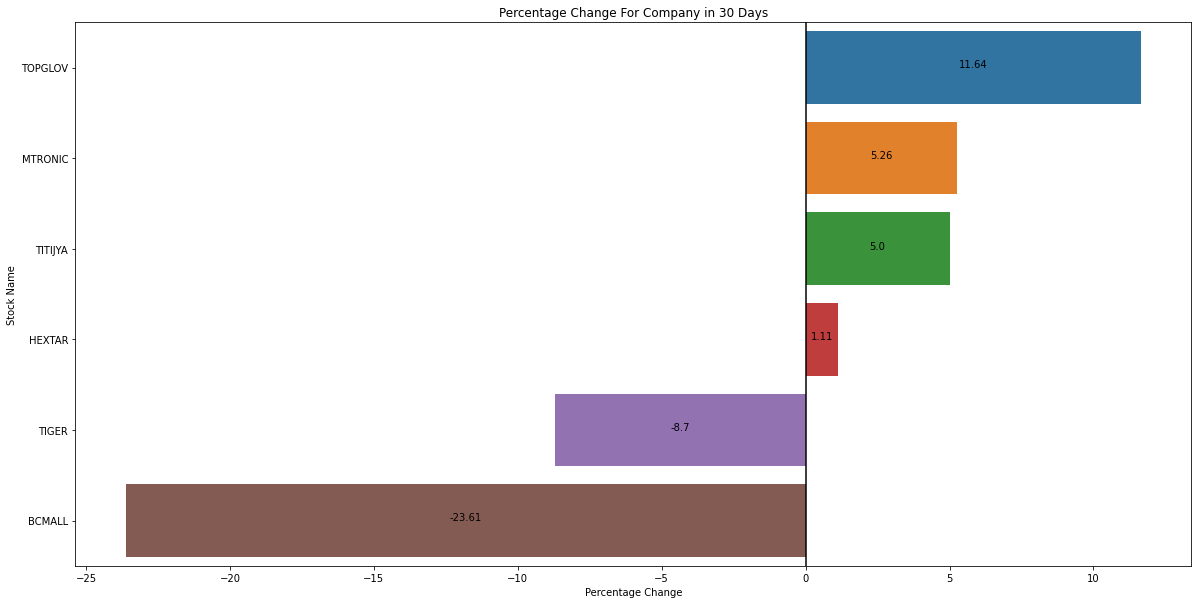

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='pct_chg_for_30days',y='stock_name',data=Acq)
for i in range(len(acq)):
 plt.text(acq[i]/2,i, str(round(acq[i],2)),
           fontdict= dict(color = 'black', fontsize =10),
           horizontalalignment= 'center')
plt.axvline(x=0,linestyle='solid',color='black')           
plt.title('Percentage Change For Company in 30 Days')
plt.xlabel('Percentage Change')
plt.ylabel('Stock Name')

# ***ACQUIRED IN JANUARY 4***

In [ ]:
#Acquired in Januari 4
Jan4=Acq[Acq['date']=='04/01/2021']
Jan4

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
74,3118456,EKOVEST BERHAD,EKOVEST,Lim Chen Thai,04/01/2021,5.698970,Acquired,NaN,Purchased in open market,"3,600,000",0.134,Ordinary Shares
75,3118466,TSH RESOURCES BERHAD,TSH,RHB Capital Nominees (Tempatan) Sdn Bhd,04/01/2021,5.000000,Acquired,NaN,Purchase of shares,"210,899,317",15.281,Ordinary shares
78,3118748,IJM PLANTATIONS BERHAD,IJMPLNT,Tan Boon Seng @ Krishnan,04/01/2021,4.681241,Acquired,"RM87,840",Transaction of Securities,"842,060",0.096,Ordinary Shares
81,3118881,TOP GLOVE CORPORATION BHD,TOPGLOV,RHB NOMINEES (TEMPATAN) SDN BHD PLEDGED SECURI...,04/01/2021,6.558709,Acquired,RM5.5217 Per Share,Acquisition of shares by Tan Sri Dr Lim Wee Chai.,"22,291,176",0.278,Ordinary Shares
82,3118883,TOP GLOVE CORPORATION BHD,TOPGLOV,RHB NOMINEES (TEMPATAN) SDN BHD PLEDGED SECURI...,04/01/2021,6.558709,Acquired,RM5.5217 Per Share,Acquisition of shares.,"2,105,671,456",26.247,Ordinary Shares
83,3118885,TOP GLOVE CORPORATION BHD,TOPGLOV,RHB NOMINEES (TEMPATAN) SDN BHD PLEDGED SECURI...,04/01/2021,6.558709,Acquired,RM5.5217 Per Share,Acquisition of shares by Tan Sri Dr Lim Wee Chai.,"112,061,244",1.397,Ordinary Shares
84,3118929,P.A. RESOURCES BERHAD,PA,Wang Sze Yao @ Wang Ming Way,04/01/2021,6.301030,Acquired,RM0.105 per unit,Acquisition of warrants in the open market.,"2,000,000",0.306,Warrant B
85,3118941,BCM ALLIANCE BERHAD,BCMALL,Yap Kim Choy,04/01/2021,6.579784,Acquired,NaN,Acquisition of ordinary shares via off market,"3,800,000",0.789,Ordinary Shares
91,3118987,TIGER SYNERGY BERHAD,TIGER,Dato' Tan Wei Lian,04/01/2021,6.854543,Acquired,NaN,1 Acquisition of Ordinary Shares through Open ...,"10,331,675",0.703,Ordinary Shares
92,3118989,TIGER SYNERGY BERHAD,TIGER,Dato' Tan Wei Lian,04/01/2021,6.854543,Acquired,NaN,1 Acquisition of Ordinary Shares through Open ...,"194,732,459",13.259,Ordinary Shares


In [ ]:
# 30 Company with High pct share acquired in Jan 4
A4=Jan4.sort_values(['pct_share'],ascending=0)
A4


,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
115,3119447,SENI JAYA CORPORATION BERHAD,SJC,Datin Lee Nai Yee,04/01/2021,5.903090,Acquired,"RM680,000.00",Acquisition of shares,"16,743,130",41.307,Ordinary shares
82,3118883,TOP GLOVE CORPORATION BHD,TOPGLOV,RHB NOMINEES (TEMPATAN) SDN BHD PLEDGED SECURI...,04/01/2021,6.558709,Acquired,RM5.5217 Per Share,Acquisition of shares.,"2,105,671,456",26.247,Ordinary Shares
97,3119084,SCICOM (MSC) BERHAD,SCICOM,Dato' Sri Leo Suresh Ariyanayakam,04/01/2021,4.477121,Acquired,RM0.93 per share,Acquisition of shares,"90,460,763",25.449,Ordinary Shares
108,3119288,CRG INCORPORATED BERHAD,CRG,CGS-CIMB Nominees (Tempatan) Sdn. Bhd. - Pledg...,04/01/2021,5.968996,Acquired,NaN,Acquisition of Ordinary Shares,"161,016,340",19.986,Ordinary Shares
113,3119435,CAREPLUS GROUP BERHAD,CAREPLS,RHB Nominees (Tempatan) Sdn Bhd (Pledged secur...,04/01/2021,4.698970,Acquired,"RM99,000.00",Acquisition of shares via open market,"103,762,200",18.863,Ordinary shares
75,3118466,TSH RESOURCES BERHAD,TSH,RHB Capital Nominees (Tempatan) Sdn Bhd,04/01/2021,5.000000,Acquired,NaN,Purchase of shares,"210,899,317",15.281,Ordinary shares
92,3118989,TIGER SYNERGY BERHAD,TIGER,Dato' Tan Wei Lian,04/01/2021,6.854543,Acquired,NaN,1 Acquisition of Ordinary Shares through Open ...,"194,732,459",13.259,Ordinary Shares
112,3119387,APM AUTOMOTIVE HOLDINGS BERHAD,APM,Kenanga Nominees (Tempatan) Sdn Bhd Pledged Se...,04/01/2021,4.602060,Acquired,RM2.5050 per share,Purchase from open market,"10,687,499",5.467,Ordinary Shares
114,3119441,TITIJAYA LAND BERHAD,TITIJYA,LIM POH YIT,04/01/2021,7.272770,Acquired,NaN,Acquisition via direct business transaction,"45,578,600",3.575,Ordinary Shares
99,3119100,HOCK SENG LEE BERHAD,HSL,Yu Chee Hoe,04/01/2021,4.103804,Acquired,NaN,Open Market Purchase,"19,326,853",3.517,Ordinary shares


In [ ]:
#Company from Jan4
#Seni jaya 9431
#Top Glove 7113
#Scicom 0099
#Crg 03016
#Careplus 0163
#TSH 
#Tiger
#APM
#TITIJAYA
#HSL
#POH
#HPMT
#MTRO
#TOP
# GTR
#YSP
#BCMALL
#PA 
#LUXCHEM
#RGTECH
#QL RESOURCES
#EKOVEST
#IJMPLANT
#UOA


start = datetime.datetime(2021,1,4)
end = datetime.datetime(2021,1,19)

SJC = web.DataReader('9431.kl','yahoo',start,end).reset_index()
TOP= web.DataReader('7113.kl','yahoo',start,end).reset_index()
SCI = web.DataReader('0099.kl','yahoo',start,end).reset_index()
CRG = web.DataReader('03016.kl','yahoo',start,end).reset_index()
CARE = web.DataReader('0163.kl','yahoo',start,end).reset_index()
TSH = web.DataReader('9059.kl','yahoo',start,end).reset_index()
TIGER = web.DataReader('7079.kl','yahoo',start,end).reset_index()
APM = web.DataReader('5015.kl','yahoo',start,end).reset_index()
TITI = web.DataReader('5239.kl','yahoo',start,end).reset_index()
HSL = web.DataReader('6238.kl','yahoo',start,end).reset_index()
POH = web.DataReader('5080.kl','yahoo',start,end).reset_index()
HPMT = web.DataReader('5291.kl','yahoo',start,end).reset_index()
MET = web.DataReader('0043.kl','yahoo',start,end).reset_index()
GTR = web.DataReader('7022.kl','yahoo',start,end).reset_index()
YSP = web.DataReader('7178.kl','yahoo',start,end).reset_index()
BCM = web.DataReader('0187.kl','yahoo',start,end).reset_index()
PA = web.DataReader('7225.kl','yahoo',start,end).reset_index()
LUX = web.DataReader('5143.kl','yahoo',start,end).reset_index()
RGT = web.DataReader('0202.kl','yahoo',start,end).reset_index()
QL = web.DataReader('7084.kl','yahoo',start,end).reset_index()
EKO = web.DataReader('8877.kl','yahoo',start,end).reset_index()
IJM = web.DataReader('2216.kl','yahoo',start,end).reset_index()
UOA = web.DataReader('5110.kl','yahoo',start,end).reset_index()



In [ ]:
Counter= [SJC,TOP,SCI,CRG,CARE,TSH,TIGER,APM,TITI,HSL,POH,HPMT,MET,TOP,GTR,YSP,BCM,TIGER,PA,POH,TOP,LUX,RGT,QL,EKO,IJM,QL,QL,UOA,POH]

In [ ]:
len(Counter)

In [ ]:
time= datetime.datetime(2021,1,4)

Text(0, 0.5, 'Careplus')

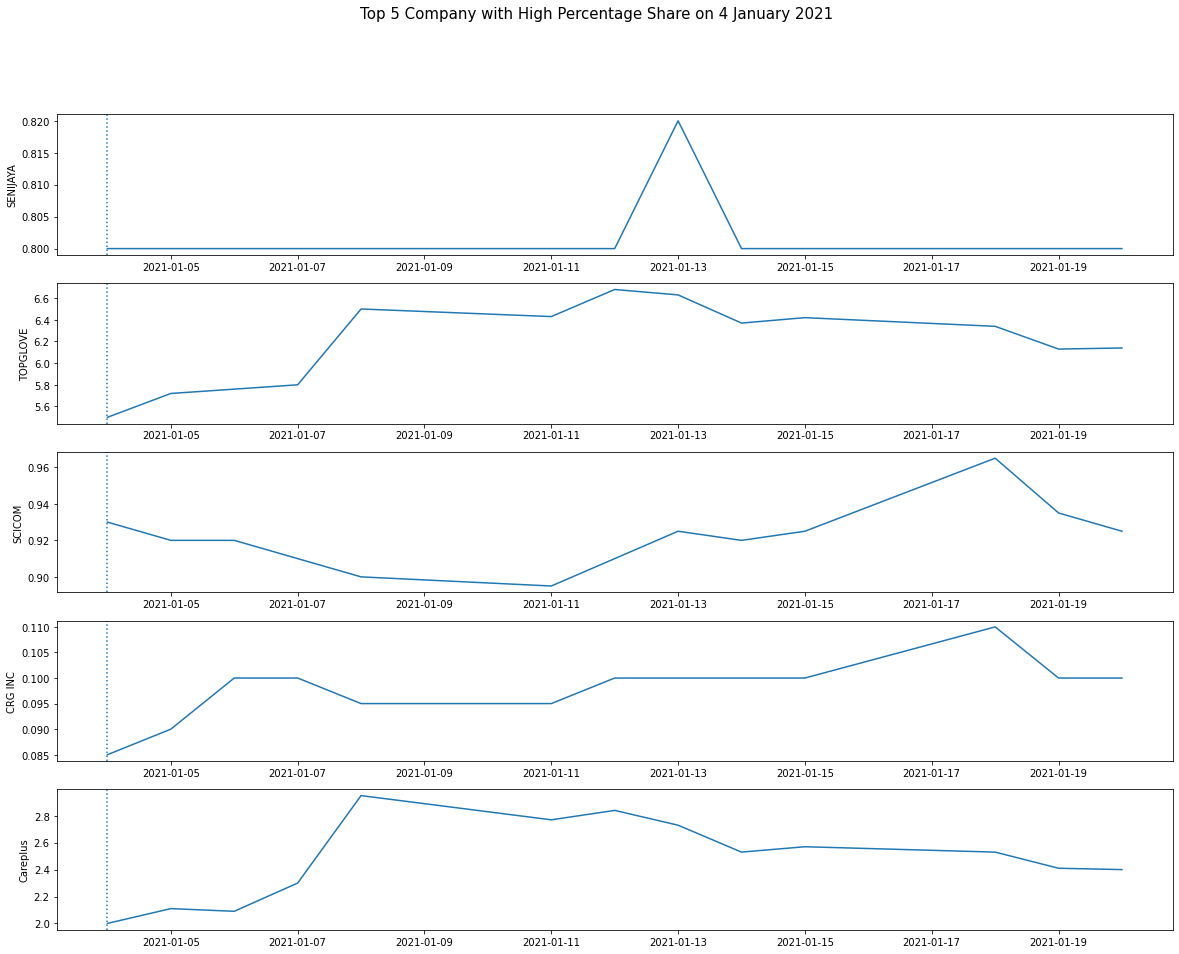

In [ ]:
#SJC = web.DataReader('9431.kl','yahoo',start,end).reset_index()
#TOP= web.DataReader('7113.kl','yahoo',start,end).reset_index()
#SCI = web.DataReader('0099.kl','yahoo',start,end).reset_index()
#CRG = web.DataReader('03016.kl','yahoo',start,end).reset_index()
#CARE = web.DataReader('0163.kl','yahoo',start,end).reset_index()
#Top 5 from Jan4
#Seni jaya
#Top Glove
#Scicom
#Crg
#Careplus
fig,(ax1,ax2,ax3,ax4,ax5,) = plt.subplots(5,1,figsize=(20,15))
fig.suptitle('Top 5 Company with High Percentage Share on 4 January 2021',fontsize=15)
ax1.plot(SJC.Date,SJC.Close) #SJC
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('SENIJAYA')

ax2.plot(TOP.Date,TOP.Close) #Topglove
ax2.axvline(x=time,linestyle ='dotted')
ax2.set_ylabel('TOPGLOVE')

ax3.plot(SCI.Date,SCI.Close)#Scicomp
ax3.axvline(x=time,linestyle ='dotted')
ax3.set_ylabel('SCICOM')

ax4.plot(CRG.Date,CRG.Close)#CRG
ax4.axvline(x=time,linestyle ='dotted')
ax4.set_ylabel('CRG INC')

ax5.plot(CARE.Date,CARE.Close)#Careplus
ax5.axvline(x=time,linestyle ='dotted')
ax5.set_ylabel('Careplus')








In [ ]:
SJC

In [ ]:
pct_chg =[]
for i in range(0,30):
  df=(Counter[i].loc[12,'Close']-Counter[i].loc[0,'Close'])/(Counter[i].loc[0,'Close'])*100
  pct_chg.append(df)
print(pct_chg) 

[0.0, 11.636361208829014, -0.5376338917391232, 17.64705933914052, 20.000004768371582, -7.826090021259681, -8.69565668088043, -7.630524357138774, 4.999995157122685, -3.0303061318608857, -12.12121248610128, 25.316453499588537, 5.263160784158717, 11.636361208829014, 9.964411996137109, -3.964753961477019, -23.611112490848203, -8.69565668088043, 0.0, -12.12121248610128, 11.636361208829014, 5.405400180747055, 1.4084577986089954, -1.6949136104436064, -5.263159215615413, -2.1739174096029172, -1.6949136104436064, -1.6949136104436064, -0.9009000301245093, -12.12121248610128]


In [ ]:
A4['pct_chg_in_2weeks']=pct_chg
A4

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description,pct_chg_in_2weeks
115,3119447,SENI JAYA CORPORATION BERHAD,SJC,Datin Lee Nai Yee,04/01/2021,5.903090,Acquired,"RM680,000.00",Acquisition of shares,"16,743,130",41.307,Ordinary shares,0.000000
82,3118883,TOP GLOVE CORPORATION BHD,TOPGLOV,RHB NOMINEES (TEMPATAN) SDN BHD PLEDGED SECURI...,04/01/2021,6.558709,Acquired,RM5.5217 Per Share,Acquisition of shares.,"2,105,671,456",26.247,Ordinary Shares,11.636361
97,3119084,SCICOM (MSC) BERHAD,SCICOM,Dato' Sri Leo Suresh Ariyanayakam,04/01/2021,4.477121,Acquired,RM0.93 per share,Acquisition of shares,"90,460,763",25.449,Ordinary Shares,-0.537634
108,3119288,CRG INCORPORATED BERHAD,CRG,CGS-CIMB Nominees (Tempatan) Sdn. Bhd. - Pledg...,04/01/2021,5.968996,Acquired,NaN,Acquisition of Ordinary Shares,"161,016,340",19.986,Ordinary Shares,17.647059
113,3119435,CAREPLUS GROUP BERHAD,CAREPLS,RHB Nominees (Tempatan) Sdn Bhd (Pledged secur...,04/01/2021,4.698970,Acquired,"RM99,000.00",Acquisition of shares via open market,"103,762,200",18.863,Ordinary shares,20.000005
75,3118466,TSH RESOURCES BERHAD,TSH,RHB Capital Nominees (Tempatan) Sdn Bhd,04/01/2021,5.000000,Acquired,NaN,Purchase of shares,"210,899,317",15.281,Ordinary shares,-7.826090
92,3118989,TIGER SYNERGY BERHAD,TIGER,Dato' Tan Wei Lian,04/01/2021,6.854543,Acquired,NaN,1 Acquisition of Ordinary Shares through Open ...,"194,732,459",13.259,Ordinary Shares,-8.695657
112,3119387,APM AUTOMOTIVE HOLDINGS BERHAD,APM,Kenanga Nominees (Tempatan) Sdn Bhd Pledged Se...,04/01/2021,4.602060,Acquired,RM2.5050 per share,Purchase from open market,"10,687,499",5.467,Ordinary Shares,-7.630524
114,3119441,TITIJAYA LAND BERHAD,TITIJYA,LIM POH YIT,04/01/2021,7.272770,Acquired,NaN,Acquisition via direct business transaction,"45,578,600",3.575,Ordinary Shares,4.999995
99,3119100,HOCK SENG LEE BERHAD,HSL,Yu Chee Hoe,04/01/2021,4.103804,Acquired,NaN,Open Market Purchase,"19,326,853",3.517,Ordinary shares,-3.030306


In [ ]:
#Group by Company
#Counter= [SJC,TOP,SCI,CRG,CARE,TSH,TIGER,APM,TITI,HSL,POH,HPMT,MET,TOP,GTR,YSP,BCM,TIGER,PA,POH,TOP,LUX,RGT,QL,EKO,IJM,QL,QL,UOA,POH]
test = [pct_chg[0],pct_chg[1],pct_chg[2],pct_chg[3],pct_chg[4],pct_chg[5],pct_chg[6],pct_chg[7],pct_chg[8],pct_chg[9],pct_chg[10],
        pct_chg[11],pct_chg[12],pct_chg[14],pct_chg[15],pct_chg[16],pct_chg[18],pct_chg[21],pct_chg[22],pct_chg[23],pct_chg[24],pct_chg[25],pct_chg[28]]


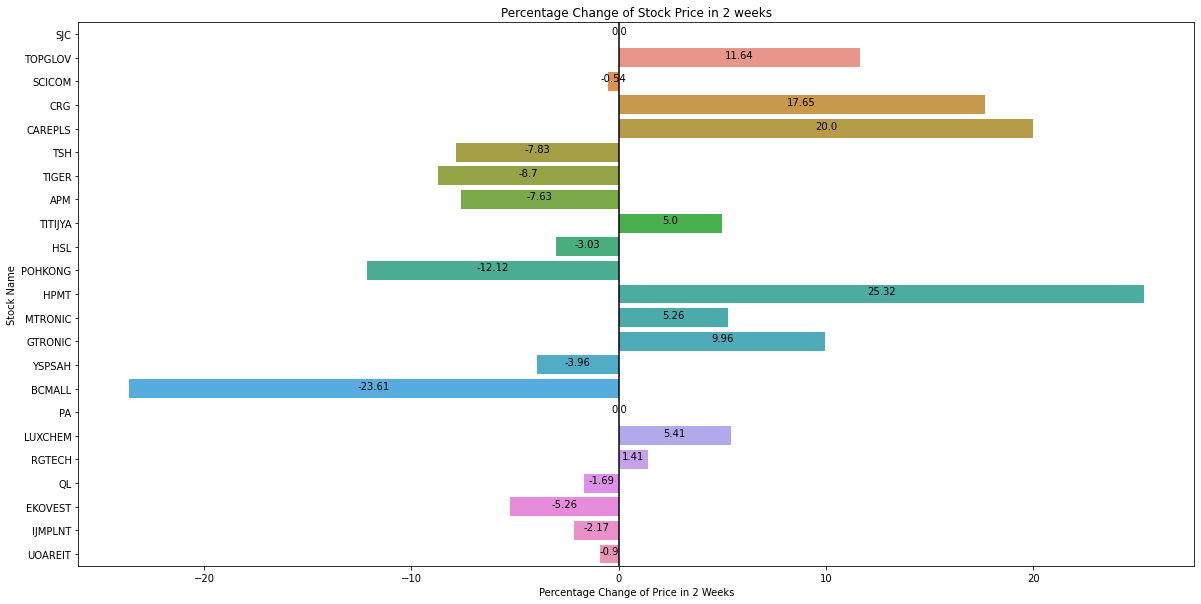

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='pct_chg_in_2weeks',y='stock_name',data=A4)
for i in range(len(test)):
 plt.text(test[i]/2,i, str(round(test[i],2)),
           fontdict= dict(color = 'black', fontsize =10),
           horizontalalignment= 'center')
plt.xlabel('Percentage Change of Price in 2 Weeks')
plt.ylabel('Stock Name')
plt.title('Percentage Change of Stock Price in 2 weeks')
plt.axvline(x=0,linestyle='solid',color='black')


In [ ]:
A4.loc[108,'director']

'CGS-CIMB Nominees (Tempatan) Sdn. Bhd. - Pledged securities account for Chiang Fong Yee'

In [ ]:
A4.sort_values(['pct_chg_for_2weeks'],ascending=1).head(8)

KeyError: ignored

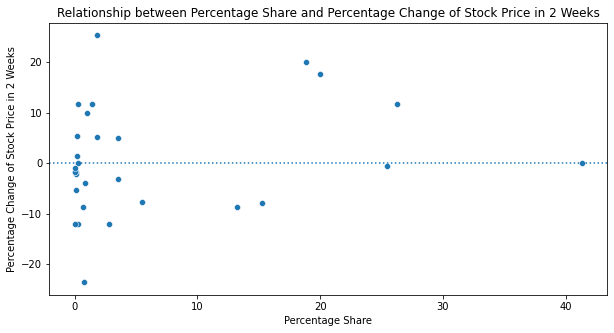

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='pct_share',y='pct_chg_in_2weeks',data = A4)
plt.xlabel('Percentage Share')
plt.ylabel('Percentage Change of Stock Price in 2 Weeks')
plt.title('Relationship between Percentage Share and Percentage Change of Stock Price in 2 Weeks')
plt.axhline(y=0,linestyle='dotted')

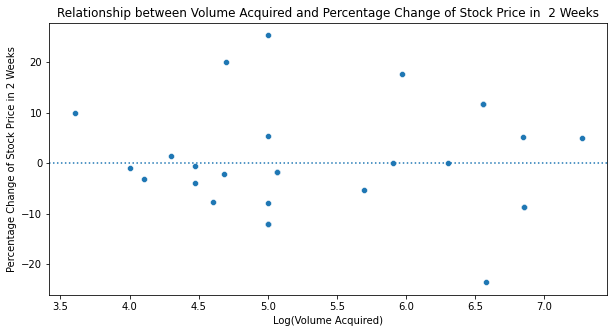

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='share',y='pct_chg_in_2weeks',data = A4)
plt.xlabel('Log(Volume Acquired)')
plt.ylabel('Percentage Change of Stock Price in 2 Weeks')
plt.title('Relationship between Volume Acquired and Percentage Change of Stock Price in  2 Weeks')
plt.axhline(y=0,linestyle='dotted')

# *ACQUIRED IN JANUARY 5*


In [ ]:
#Acquired in Januari 5
Jan5=Acq[Acq['date']=='05/01/2021']
Jan5

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
39,3118916,CAELY HOLDINGS BHD,CAELY-WA,Dato' Chuah Chin Lai,05/01/2021,5.686189,Acquired,RM0.2325 per warrant,"Acquisition of 485,500 warrants by her spouse,...",0,0.000,Warrants
40,3118917,CAELY HOLDINGS BHD,CAELY-WA,Dato' Chuah Chin Lai,05/01/2021,5.686189,Acquired,RM0.2325 per warrant,"Acquisition of 485,500 warrants on 5 January 2...","3,029,100",8.247,Warrants
42,3119074,ANN JOO RESOURCES BERHAD,ANNJOO,Datuk Kamarudin Bin Md Ali,05/01/2021,4.000000,Acquired,"RM15,300.00",Acquired from open market,"185,000",0.034,Ordinary Shares
56,3119289,AHMAD ZAKI RESOURCES BERHAD,AZRB,Tan Sri Dato' Lau Yin Pin,05/01/2021,5.477121,Acquired,NaN,Acquisition from the open market,"2,000,000",0.340,Ordinary Shares
57,3119334,IGB BERHAD,IGBB,Wah Seong Enterprises Sdn Bhd,05/01/2021,4.698970,Acquired,NaN,Purchase of shares,"2,815,793",0.319,Ordinary Shares
58,3119356,MICROLINK SOLUTIONS BERHAD,MICROLN,Monteiro Gerard Clair,05/01/2021,4.954243,Acquired,RM2.295 Per Share,Acquisition of Equity Interest,"6,208,699",2.576,Ordinary Shares
59,3119372,VERTICE BERHAD,VERTICE,Wong Kwai Wah,05/01/2021,5.000000,Acquired,RM0.22,Acquisition of shares,"7,754,300",3.335,Ordinary shares
64,3119430,KAWAN FOOD BERHAD,KAWAN,Gan Thiam Chai,05/01/2021,4.477121,Acquired,NaN,Acquisition of Shares,"87,945,148",24.462,Ordinary Shares
66,3119538,WARISAN TC HOLDINGS BERHAD,WARISAN,Public Nominees (Tempatan) Sdn Bhd : Pledged S...,05/01/2021,4.414973,Acquired,RM1.3500 per ordinary share,Purchase from open market,"4,352,333",6.686,Ordinary Shares
70,3119708,TOMYPAK HOLDINGS BERHAD,TOMYPAK,CGS-CIMB NOMINEES (TEMPATAN) SDN BHD FOR NEW O...,05/01/2021,4.000000,Acquired,NaN,ACQUISITION,"1,117,087",0.259,ORDINARY SHARES


In [ ]:
#Top High volume acquired in Jan 5
A5=Jan5.sort_values(['pct_share'],ascending=0)
A5

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
64,3119430,KAWAN FOOD BERHAD,KAWAN,Gan Thiam Chai,05/01/2021,4.477121,Acquired,NaN,Acquisition of Shares,"87,945,148",24.462,Ordinary Shares
40,3118917,CAELY HOLDINGS BHD,CAELY-WA,Dato' Chuah Chin Lai,05/01/2021,5.686189,Acquired,RM0.2325 per warrant,"Acquisition of 485,500 warrants on 5 January 2...","3,029,100",8.247,Warrants
66,3119538,WARISAN TC HOLDINGS BERHAD,WARISAN,Public Nominees (Tempatan) Sdn Bhd : Pledged S...,05/01/2021,4.414973,Acquired,RM1.3500 per ordinary share,Purchase from open market,"4,352,333",6.686,Ordinary Shares
59,3119372,VERTICE BERHAD,VERTICE,Wong Kwai Wah,05/01/2021,5.000000,Acquired,RM0.22,Acquisition of shares,"7,754,300",3.335,Ordinary shares
58,3119356,MICROLINK SOLUTIONS BERHAD,MICROLN,Monteiro Gerard Clair,05/01/2021,4.954243,Acquired,RM2.295 Per Share,Acquisition of Equity Interest,"6,208,699",2.576,Ordinary Shares
56,3119289,AHMAD ZAKI RESOURCES BERHAD,AZRB,Tan Sri Dato' Lau Yin Pin,05/01/2021,5.477121,Acquired,NaN,Acquisition from the open market,"2,000,000",0.340,Ordinary Shares
57,3119334,IGB BERHAD,IGBB,Wah Seong Enterprises Sdn Bhd,05/01/2021,4.698970,Acquired,NaN,Purchase of shares,"2,815,793",0.319,Ordinary Shares
70,3119708,TOMYPAK HOLDINGS BERHAD,TOMYPAK,CGS-CIMB NOMINEES (TEMPATAN) SDN BHD FOR NEW O...,05/01/2021,4.000000,Acquired,NaN,ACQUISITION,"1,117,087",0.259,ORDINARY SHARES
42,3119074,ANN JOO RESOURCES BERHAD,ANNJOO,Datuk Kamarudin Bin Md Ali,05/01/2021,4.000000,Acquired,"RM15,300.00",Acquired from open market,"185,000",0.034,Ordinary Shares
39,3118916,CAELY HOLDINGS BHD,CAELY-WA,Dato' Chuah Chin Lai,05/01/2021,5.686189,Acquired,RM0.2325 per warrant,"Acquisition of 485,500 warrants by her spouse,...",0,0.000,Warrants


In [ ]:
len(A5)

10

In [ ]:
counter1=[]

In [ ]:
#KAWAN
#CAELY
#WARISAN
#VERTICE
#MIROLINK
#AHMAD ZAKI
#IGB
#TOMYPAK
#ANNJOO
#CAELY
time2= datetime.datetime(2021,1,5)
end2 = datetime.datetime(2021,1,20)

KAW = web.DataReader('7216.kl','yahoo',time2,end2).reset_index()
CAE = web.DataReader('7154.kl','yahoo',time2,end2).reset_index()
WAR = web.DataReader('5016.kl','yahoo',time2,end2).reset_index()
VER = web.DataReader('7240.kl','yahoo',time2,end2).reset_index()
MCR = web.DataReader('0126.kl','yahoo',time2,end2).reset_index()
AZR = web.DataReader('7078.kl','yahoo',time2,end2).reset_index()
IGB = web.DataReader('5227.kl','yahoo',time2,end2).reset_index()
TOM = web.DataReader('7285.kl','yahoo',time2,end2).reset_index()
ANN = web.DataReader('6556.kl','yahoo',time2,end2).reset_index()


In [ ]:
counter1=[KAW,CAE,WAR,VER,MCR,AZR,IGB,TOM,ANN,CAE]

Text(0, 0.5, 'MICRO LINK')

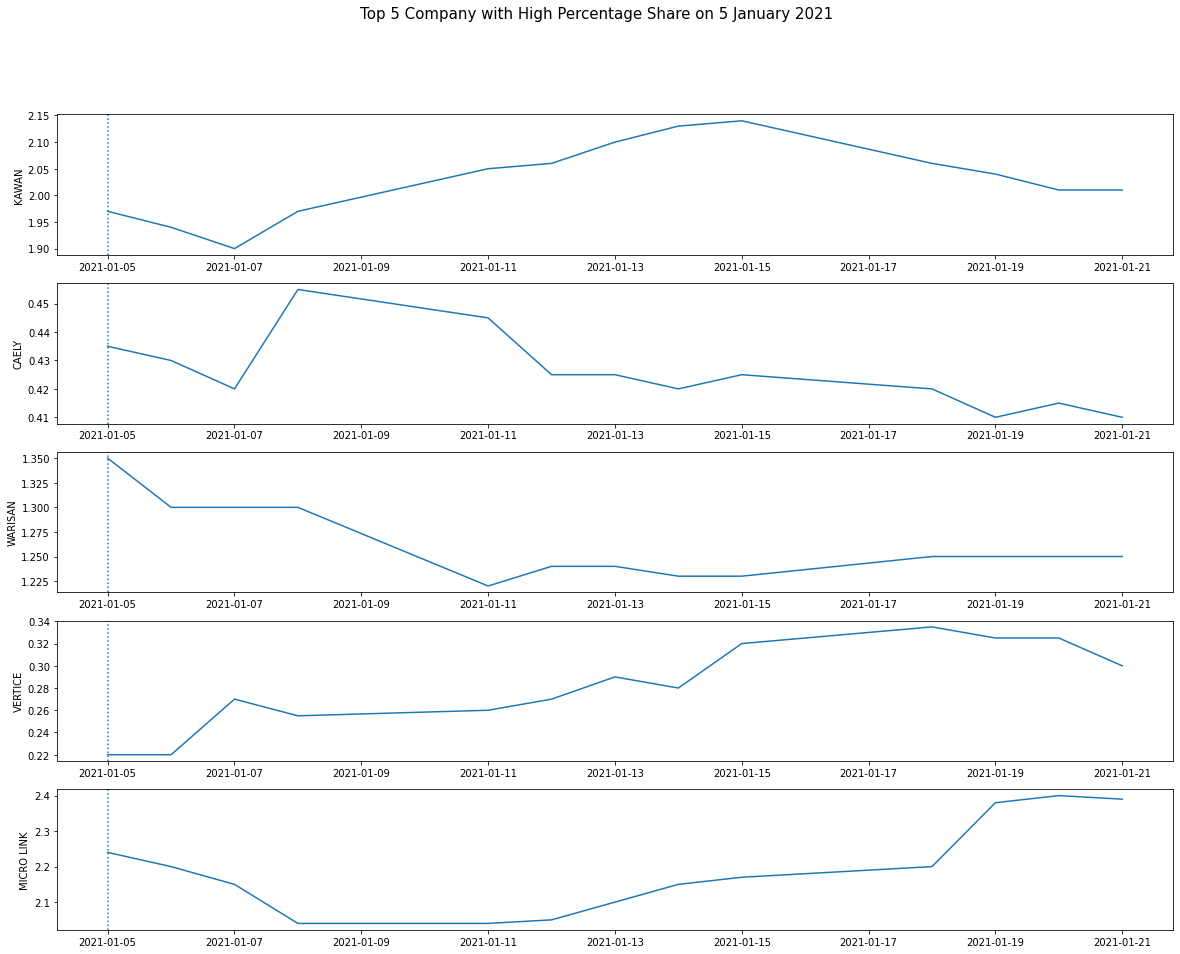

In [ ]:
fig,(ax1,ax2,ax3,ax4,ax5,) = plt.subplots(5,1,figsize=(20,15))
fig.suptitle('Top 5 Company with High Percentage Share on 5 January 2021',fontsize=15)
ax1.plot(KAW.Date,KAW.Close) #KAW
ax1.axvline(x=time2,linestyle ='dotted')
ax1.set_ylabel('KAWAN')

ax2.plot(CAE.Date,CAE.Close) #CAE
ax2.axvline(x=time2,linestyle ='dotted')
ax2.set_ylabel('CAELY')

ax3.plot(WAR.Date,WAR.Close)#WARISAN
ax3.axvline(x=time2,linestyle ='dotted')
ax3.set_ylabel('WARISAN')

ax4.plot(VER.Date,VER.Close)#VERTICE
ax4.axvline(x=time2,linestyle ='dotted')
ax4.set_ylabel('VERTICE')

ax5.plot(MCR.Date,MCR.Close)#MICROLINK
ax5.axvline(x=time2,linestyle ='dotted')
ax5.set_ylabel('MICRO LINK')

In [ ]:

#KAW = web.DataReader('7216.kl','yahoo',start,end).reset_index()
#CAE = web.DataReader('7154.kl','yahoo',start,end).reset_index()
#WAR = web.DataReader('5016.kl','yahoo',start,end).reset_index()
#VER = web.DataReader('7240.kl','yahoo',start,end).reset_index()
#AZR = web.DataReader('7078.kl','yahoo',start,end).reset_index()
#IGB = web.DataReader('5227.kl','yahoo',start,end).reset_index()
#TOM = web.DataReader('7285.kl','yahoo',start,end).reset_index()
#ANN = web.DataReader('6556.kl','yahoo',start,end).reset_index()
KAW

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-01-05,2.04,1.97,2.04,1.97,373400,1.939847
1,2021-01-06,2.00,1.91,1.98,1.94,727300,1.910306
2,2021-01-07,1.95,1.89,1.93,1.90,511200,1.870918
3,2021-01-08,1.99,1.93,1.93,1.97,441300,1.939847
4,2021-01-11,2.12,2.00,2.00,2.05,419800,2.018622
5,2021-01-12,2.12,2.00,2.11,2.06,444300,2.028469
6,2021-01-13,2.10,2.06,2.06,2.10,459500,2.067857
7,2021-01-14,2.16,2.11,2.11,2.13,1784900,2.097398
8,2021-01-15,2.18,2.10,2.17,2.14,868500,2.107245
9,2021-01-18,2.16,2.05,2.16,2.06,451100,2.028469


In [ ]:
pct_chg1 = []
for i in range(0,10):
  df1=(counter1[i].loc[12,'Close']-counter1[i].loc[0,'Close'])/(counter1[i].loc[0,'Close'])*100
  pct_chg1.append(df1)
print(pct_chg1)


[2.030454886909114, -5.747127775503971, -7.407409042651405, 36.363642521141024, 6.696432800393305, -7.407411086706321, -4.624279886319817, 2.7777750183035925, 1.342280590503612, -5.747127775503971]


In [ ]:
A5['pct_chg_in_2weeks']=pct_chg1

In [ ]:
A5.sort_values('pct_chg_in_2weeks',ascending=0)

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description,pct_chg_in_2weeks
59,3119372,VERTICE BERHAD,VERTICE,Wong Kwai Wah,05/01/2021,5.000000,Acquired,RM0.22,Acquisition of shares,"7,754,300",3.335,Ordinary shares,36.363643
58,3119356,MICROLINK SOLUTIONS BERHAD,MICROLN,Monteiro Gerard Clair,05/01/2021,4.954243,Acquired,RM2.295 Per Share,Acquisition of Equity Interest,"6,208,699",2.576,Ordinary Shares,6.696433
70,3119708,TOMYPAK HOLDINGS BERHAD,TOMYPAK,CGS-CIMB NOMINEES (TEMPATAN) SDN BHD FOR NEW O...,05/01/2021,4.000000,Acquired,NaN,ACQUISITION,"1,117,087",0.259,ORDINARY SHARES,2.777775
64,3119430,KAWAN FOOD BERHAD,KAWAN,Gan Thiam Chai,05/01/2021,4.477121,Acquired,NaN,Acquisition of Shares,"87,945,148",24.462,Ordinary Shares,2.030455
42,3119074,ANN JOO RESOURCES BERHAD,ANNJOO,Datuk Kamarudin Bin Md Ali,05/01/2021,4.000000,Acquired,"RM15,300.00",Acquired from open market,"185,000",0.034,Ordinary Shares,1.342281
57,3119334,IGB BERHAD,IGBB,Wah Seong Enterprises Sdn Bhd,05/01/2021,4.698970,Acquired,NaN,Purchase of shares,"2,815,793",0.319,Ordinary Shares,-4.624280
40,3118917,CAELY HOLDINGS BHD,CAELY-WA,Dato' Chuah Chin Lai,05/01/2021,5.686189,Acquired,RM0.2325 per warrant,"Acquisition of 485,500 warrants on 5 January 2...","3,029,100",8.247,Warrants,-5.747128
39,3118916,CAELY HOLDINGS BHD,CAELY-WA,Dato' Chuah Chin Lai,05/01/2021,5.686189,Acquired,RM0.2325 per warrant,"Acquisition of 485,500 warrants by her spouse,...",0,0.000,Warrants,-5.747128
66,3119538,WARISAN TC HOLDINGS BERHAD,WARISAN,Public Nominees (Tempatan) Sdn Bhd : Pledged S...,05/01/2021,4.414973,Acquired,RM1.3500 per ordinary share,Purchase from open market,"4,352,333",6.686,Ordinary Shares,-7.407409
56,3119289,AHMAD ZAKI RESOURCES BERHAD,AZRB,Tan Sri Dato' Lau Yin Pin,05/01/2021,5.477121,Acquired,NaN,Acquisition from the open market,"2,000,000",0.340,Ordinary Shares,-7.407411


Text(0, 0.5, 'Stock Name')

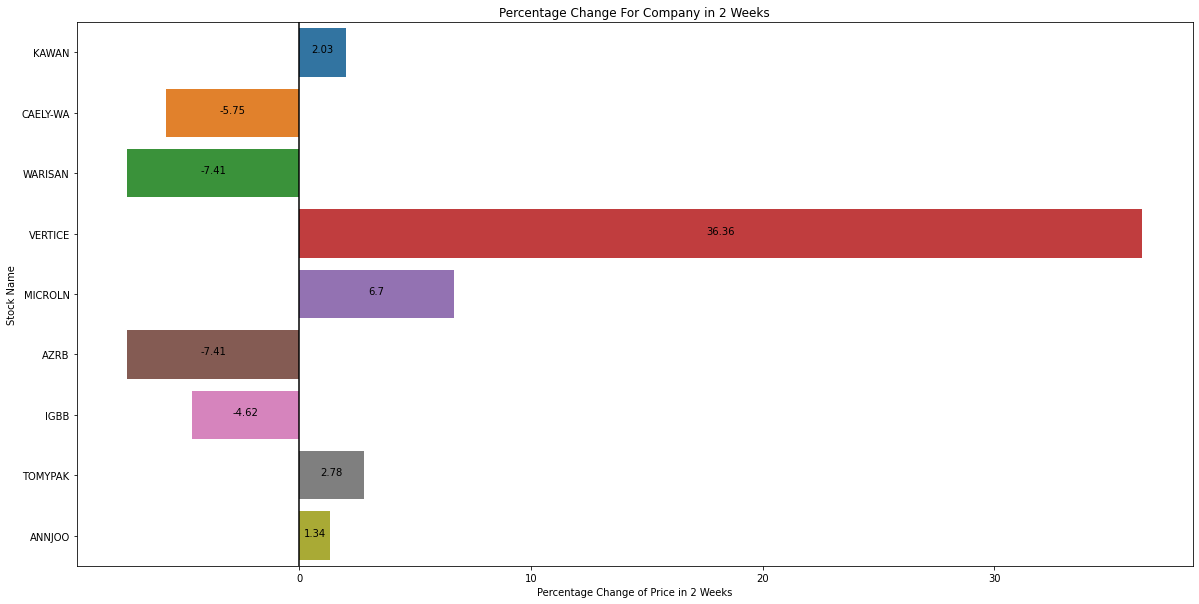

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='pct_chg_in_2weeks',y='stock_name',data=A5)
for i in range(len(pct_chg1)-1):
 plt.text(pct_chg1[i]/2,i, str(round(pct_chg1[i],2)),
           fontdict= dict(color = 'black', fontsize =10),
           horizontalalignment= 'center')
plt.axvline(x=0,linestyle='solid',color='black')           
plt.title('Percentage Change For Company in 2 Weeks')
plt.xlabel('Percentage Change of Price in 2 Weeks')
plt.ylabel('Stock Name')

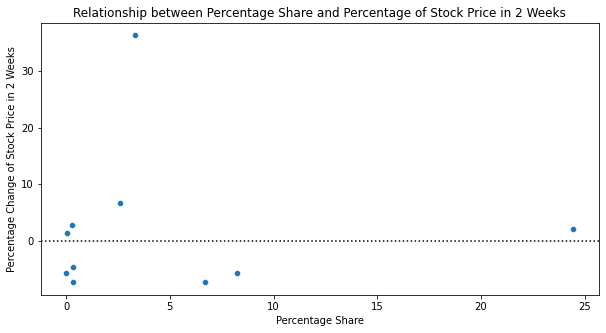

In [ ]:
#relation pct share and pct change
plt.figure(figsize=(10,5))
sns.scatterplot(x='pct_share',y='pct_chg_in_2weeks',data = A5)
plt.xlabel('Percentage Share')
plt.ylabel('Percentage Change of Stock Price in 2 Weeks')
plt.title('Relationship between Percentage Share and Percentage of Stock Price in 2 Weeks')
plt.axhline(y=0,linestyle='dotted',color='black')


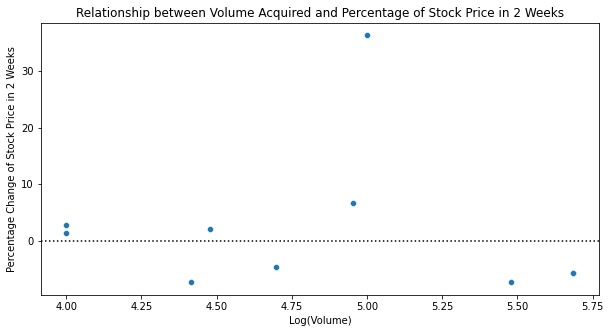

In [ ]:
#relation volume and pct change
plt.figure(figsize=(10,5))
sns.scatterplot(x='share',y='pct_chg_in_2weeks',data = A5)
plt.xlabel('Log(Volume)')
plt.ylabel('Percentage Change of Stock Price in 2 Weeks')
plt.title('Relationship between Volume Acquired and Percentage of Stock Price in 2 Weeks')
plt.axhline(y=0,linestyle='dotted',color='black')

# ***ACQUIRED IN JANUARY 6***

In [ ]:
#Company that acquired in january 6
Jan6 = Acq[Acq['date']=='06/01/2021']
Jan6

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
20,3119109,TSH RESOURCES BERHAD,TSH,RHB Capital Nominees (Tempatan) Sdn Bhd,06/01/2021,5.000000,Acquired,NaN,Purchase of shares,"210,999,317",15.288,Ordinary shares
25,3119230,UOA REAL ESTATE INVESTMENT TRUST,UOAREIT,DATO' GAN BOON KHUAY,06/01/2021,5.000000,Acquired,NaN,Acquired in the open market.,"200,000",0.030,Units
28,3119384,GREATECH TECHNOLOGY BERHAD,GREATEC,Wong Sui Cheng,06/01/2021,2.698970,Acquired,RM9.45 per share,Acquisition ordinary shares by his child via o...,0,0.000,Ordinary Shares
29,3119414,IRIS CORPORATION BERHAD,IRIS,Dr. Poh Soon Sim,06/01/2021,6.301030,Acquired,NaN,Acquired through open market,"36,000,000",1.210,Ordinary shares
31,3119475,UNITED MALACCA BERHAD,UMCCA,TEE KIM TEE @ TEE CHING TEE,06/01/2021,3.732394,Acquired,NaN,Deemed interest via shares acquired by sibling.,0,0.000,Ordinary shares
32,3119482,UNITED MALACCA BERHAD,UMCCA,TEE KIM TEE @ TEE CHING TEE,06/01/2021,3.732394,Acquired,NaN,Deemed interest via shares acquired by Parent.,"1,268,400",0.605,Ordinary shares
33,3119667,CABNET HOLDINGS BERHAD,CABNET,YONG THIAM YUEN,06/01/2021,5.766524,Acquired,NaN,Acquired of ordinary shares via direct deal.,"742,275",0.415,Ordinary Shares
34,3119756,HEXTAR GLOBAL BERHAD,HEXTAR,Hextar Holdings Sdn Bhd,06/01/2021,7.363386,Acquired,NaN,Direct Business Transaction,0,0.000,Ordinary Shares
35,3119757,HEXTAR GLOBAL BERHAD,HEXTAR,Hextar Holdings Sdn Bhd,06/01/2021,7.363386,Acquired,NaN,Direct Business Transaction,"31,238,500",3.806,Ordinary Shares
36,3119901,I-BERHAD,IBHD,Sumurwang Capital Sdn Bhd,06/01/2021,5.440279,Acquired,NaN,Purchase of ordinary shares in the open market...,"2,470,500",0.222,Ordinary Shares


In [ ]:
A6=Jan6.sort_values(['pct_share'],ascending=0)
A6

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
20,3119109,TSH RESOURCES BERHAD,TSH,RHB Capital Nominees (Tempatan) Sdn Bhd,06/01/2021,5.000000,Acquired,NaN,Purchase of shares,"210,999,317",15.288,Ordinary shares
35,3119757,HEXTAR GLOBAL BERHAD,HEXTAR,Hextar Holdings Sdn Bhd,06/01/2021,7.363386,Acquired,NaN,Direct Business Transaction,"31,238,500",3.806,Ordinary Shares
29,3119414,IRIS CORPORATION BERHAD,IRIS,Dr. Poh Soon Sim,06/01/2021,6.301030,Acquired,NaN,Acquired through open market,"36,000,000",1.210,Ordinary shares
32,3119482,UNITED MALACCA BERHAD,UMCCA,TEE KIM TEE @ TEE CHING TEE,06/01/2021,3.732394,Acquired,NaN,Deemed interest via shares acquired by Parent.,"1,268,400",0.605,Ordinary shares
33,3119667,CABNET HOLDINGS BERHAD,CABNET,YONG THIAM YUEN,06/01/2021,5.766524,Acquired,NaN,Acquired of ordinary shares via direct deal.,"742,275",0.415,Ordinary Shares
36,3119901,I-BERHAD,IBHD,Sumurwang Capital Sdn Bhd,06/01/2021,5.440279,Acquired,NaN,Purchase of ordinary shares in the open market...,"2,470,500",0.222,Ordinary Shares
25,3119230,UOA REAL ESTATE INVESTMENT TRUST,UOAREIT,DATO' GAN BOON KHUAY,06/01/2021,5.000000,Acquired,NaN,Acquired in the open market.,"200,000",0.030,Units
28,3119384,GREATECH TECHNOLOGY BERHAD,GREATEC,Wong Sui Cheng,06/01/2021,2.698970,Acquired,RM9.45 per share,Acquisition ordinary shares by his child via o...,0,0.000,Ordinary Shares
31,3119475,UNITED MALACCA BERHAD,UMCCA,TEE KIM TEE @ TEE CHING TEE,06/01/2021,3.732394,Acquired,NaN,Deemed interest via shares acquired by sibling.,0,0.000,Ordinary shares
34,3119756,HEXTAR GLOBAL BERHAD,HEXTAR,Hextar Holdings Sdn Bhd,06/01/2021,7.363386,Acquired,NaN,Direct Business Transaction,0,0.000,Ordinary Shares


In [ ]:
#TSH
#HEX
#IRRIS
#United Malacca
#CABNET
#I-Berhad
#UOA
#GRET
#UMCC
#load Stock ticker
time3 = datetime.datetime(2021,1,6)
end3 = datetime.datetime(2021,1,21)
TSH1 = web.DataReader('9059.kl','yahoo',time3,end3).reset_index()
HEX = web.DataReader('5151.kl','yahoo',time3,end3).reset_index()
IRIS = web.DataReader('0010.kl','yahoo',time3,end3).reset_index()
UMCCA = web.DataReader('2593.kl','yahoo',time3,end3).reset_index()
CABNET = web.DataReader('0191.kl','yahoo',time3,end3).reset_index()
IBHD = web.DataReader('4251.kl','yahoo',time3,end3).reset_index()
UOA1 = web.DataReader('5110.kl','yahoo',time3,end3).reset_index()
GRET = web.DataReader('0208.kl','yahoo',time3,end3).reset_index()


Text(0, 0.5, 'CABNET')

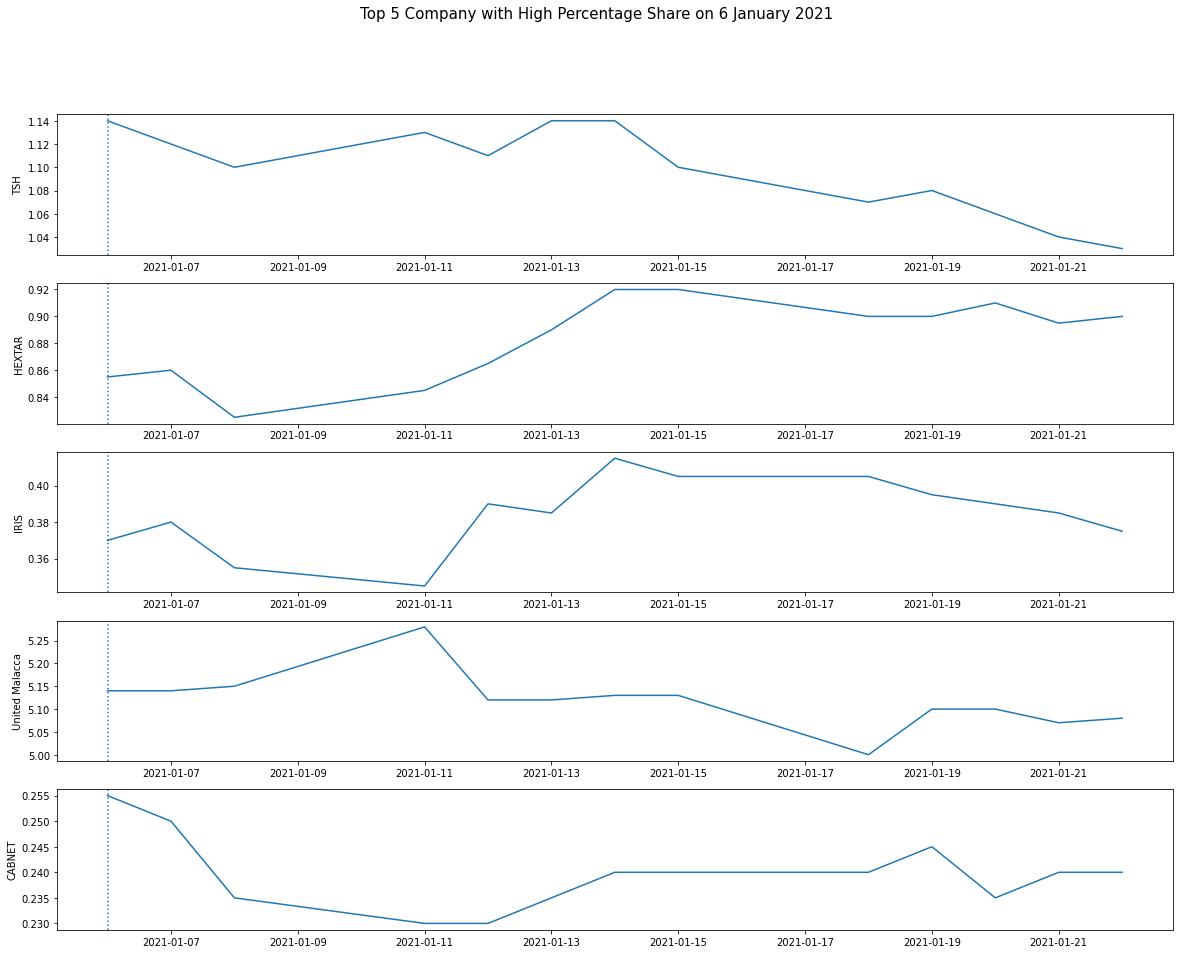

In [ ]:
#Plot to findout trendline
fig,(ax1,ax2,ax3,ax4,ax5,) = plt.subplots(5,1,figsize=(20,15))
fig.suptitle('Top 5 Company with High Percentage Share on 6 January 2021',fontsize=15)
ax1.plot(TSH1.Date,TSH1.Close) #SJC
ax1.axvline(x=time3,linestyle ='dotted')
ax1.set_ylabel('TSH')

ax2.plot(HEX.Date,HEX.Close) #Topglove
ax2.axvline(x=time3,linestyle ='dotted')
ax2.set_ylabel('HEXTAR')

ax3.plot(IRIS.Date,IRIS.Close)#Scicomp
ax3.axvline(x=time3,linestyle ='dotted')
ax3.set_ylabel('IRIS')

ax4.plot(UMCCA.Date,UMCCA.Close)#CRG
ax4.axvline(x=time3,linestyle ='dotted')
ax4.set_ylabel('United Malacca')

ax5.plot(CABNET.Date,CABNET.Close)#Careplus
ax5.axvline(x=time3,linestyle ='dotted')
ax5.set_ylabel('CABNET')

In [ ]:
counter2 = [TSH1,HEX,IRIS,UMCCA,CABNET,IBHD,UOA1,GRET,UMCCA,HEX]

In [ ]:
UMCCA

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-01-06,5.14,5.13,5.13,5.14,11500.0,5.109883
1,2021-01-07,5.14,5.14,5.14,5.14,8100.0,5.109883
2,2021-01-08,5.15,5.13,5.13,5.15,10000.0,5.119824
3,2021-01-11,5.28,5.15,5.15,5.28,105800.0,5.249063
4,2021-01-12,5.28,5.11,5.28,5.12,14500.0,5.090000
5,2021-01-13,5.12,5.11,5.12,5.12,32900.0,5.090000
6,2021-01-14,5.13,5.10,5.10,5.13,21000.0,5.130000
7,2021-01-15,5.13,5.13,5.13,5.13,0.0,5.130000
8,2021-01-18,5.10,5.00,5.10,5.00,5400.0,5.000000
9,2021-01-19,5.15,5.05,5.15,5.10,49700.0,5.100000


In [ ]:
pct_chg2 = []
for i in range(0,10):
  df2=(counter2[i].loc[12,'Close']-counter2[i].loc[0,'Close'])/(counter2[i].loc[0,'Close'])*100
  pct_chg2.append(df2)
print(pct_chg2)

[-9.649124182932722, 5.263152757987022, 1.3513500451867637, -1.1673140921804177, -5.88235328491722, 2.173910930837298, 0.0, 18.393232178664935, -1.1673140921804177, 5.263152757987022]


In [ ]:
A6['pct_chg_in_2weeks']=pct_chg2
A6

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description,pct_chg_in_2weeks
20,3119109,TSH RESOURCES BERHAD,TSH,RHB Capital Nominees (Tempatan) Sdn Bhd,06/01/2021,5.000000,Acquired,NaN,Purchase of shares,"210,999,317",15.288,Ordinary shares,-9.649124
35,3119757,HEXTAR GLOBAL BERHAD,HEXTAR,Hextar Holdings Sdn Bhd,06/01/2021,7.363386,Acquired,NaN,Direct Business Transaction,"31,238,500",3.806,Ordinary Shares,5.263153
29,3119414,IRIS CORPORATION BERHAD,IRIS,Dr. Poh Soon Sim,06/01/2021,6.301030,Acquired,NaN,Acquired through open market,"36,000,000",1.210,Ordinary shares,1.351350
32,3119482,UNITED MALACCA BERHAD,UMCCA,TEE KIM TEE @ TEE CHING TEE,06/01/2021,3.732394,Acquired,NaN,Deemed interest via shares acquired by Parent.,"1,268,400",0.605,Ordinary shares,-1.167314
33,3119667,CABNET HOLDINGS BERHAD,CABNET,YONG THIAM YUEN,06/01/2021,5.766524,Acquired,NaN,Acquired of ordinary shares via direct deal.,"742,275",0.415,Ordinary Shares,-5.882353
36,3119901,I-BERHAD,IBHD,Sumurwang Capital Sdn Bhd,06/01/2021,5.440279,Acquired,NaN,Purchase of ordinary shares in the open market...,"2,470,500",0.222,Ordinary Shares,2.173911
25,3119230,UOA REAL ESTATE INVESTMENT TRUST,UOAREIT,DATO' GAN BOON KHUAY,06/01/2021,5.000000,Acquired,NaN,Acquired in the open market.,"200,000",0.030,Units,0.000000
28,3119384,GREATECH TECHNOLOGY BERHAD,GREATEC,Wong Sui Cheng,06/01/2021,2.698970,Acquired,RM9.45 per share,Acquisition ordinary shares by his child via o...,0,0.000,Ordinary Shares,18.393232
31,3119475,UNITED MALACCA BERHAD,UMCCA,TEE KIM TEE @ TEE CHING TEE,06/01/2021,3.732394,Acquired,NaN,Deemed interest via shares acquired by sibling.,0,0.000,Ordinary shares,-1.167314
34,3119756,HEXTAR GLOBAL BERHAD,HEXTAR,Hextar Holdings Sdn Bhd,06/01/2021,7.363386,Acquired,NaN,Direct Business Transaction,0,0.000,Ordinary Shares,5.263153


Text(0.5, 1.0, 'Percentage Change of Stock Price in 2 Weeks')

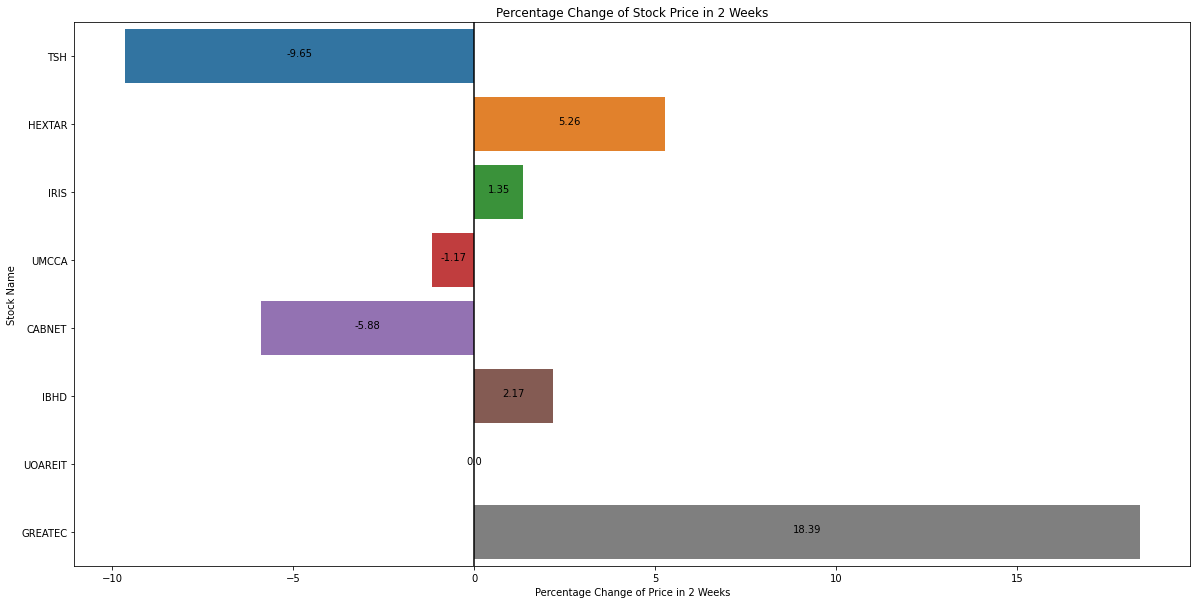

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(y='stock_name',x= 'pct_chg_in_2weeks',data=A6)
for i in range(len(pct_chg2)-2):
 plt.text(pct_chg2[i]/2,i, str(round(pct_chg2[i],2)),
           fontdict= dict(color = 'black', fontsize =10),
           horizontalalignment= 'center')
plt.axvline(x=0, linestyle = 'solid', color= 'black')
plt.ylabel('Stock Name')
plt.xlabel('Percentage Change of Price in 2 Weeks')
plt.title('Percentage Change of Stock Price in 2 Weeks')


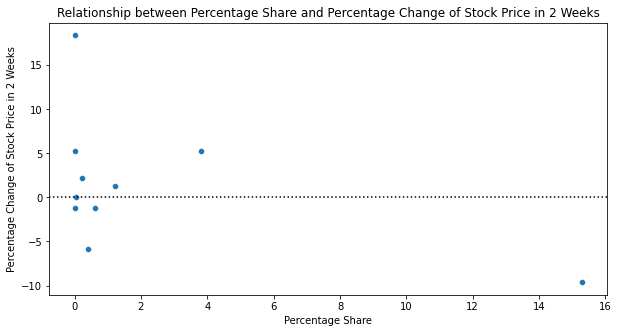

In [ ]:
#pct share vs pct chg
plt.figure(figsize=(10,5))
sns.scatterplot(x='pct_share',y='pct_chg_in_2weeks',data=A6)
plt.xlabel('Percentage Share')
plt.ylabel('Percentage Change of Stock Price in 2 Weeks')
plt.title('Relationship between Percentage Share and Percentage Change of Stock Price in 2 Weeks')
plt.axhline(y=0,linestyle= 'dotted',color= 'black')

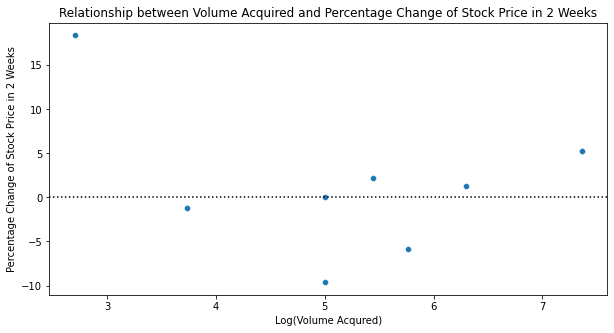

In [ ]:
#log volume vs pct chg
plt.figure(figsize=(10,5))
sns.scatterplot(x='share',y='pct_chg_in_2weeks',data=A6)
plt.xlabel('Log(Volume Acqured)')
plt.ylabel('Percentage Change of Stock Price in 2 Weeks')
plt.title('Relationship between Volume Acquired and Percentage Change of Stock Price in 2 Weeks')
plt.axhline(y=0,linestyle= 'dotted',color= 'black')

# ***ACQUIRED IN JANUARY 7***

In [ ]:
Jan7 = Acq[Acq['date']=='07/01/2021']
Jan7

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
4,3119368,FIMA CORPORATION BERHAD,FIMACOR,REZAL ZAIN BIN ABDUL RASHID,07/01/2021,3.301030,Acquired,RM1.75,ACQUISITION THROUGH OPEN MARKET,"9,000",0.004,ORDINARY SHARES
6,3119428,TSH RESOURCES BERHAD,TSH,RHB Capital Nominees (Tempatan) Sdn Bhd,07/01/2021,4.698970,Acquired,NaN,Purchase of shares,"211,049,317",15.292,Ordinary shares
7,3119484,POWER ROOT BERHAD,PWROOT,ONG KHENG SWEE,07/01/2021,4.000000,Acquired,NaN,Acquisition of Ordinary Shares,"235,315",0.056,Ordinary Shares
8,3119528,DPI HOLDINGS BERHAD,DPIH,FONG YOO KAW @ FONG YEE KOW,07/01/2021,5.778151,Acquired,NaN,ACQUISITION OF SHARES,"800,000",0.164,ORDINARY SHARES
10,3119532,DPI HOLDINGS BERHAD,DPIH,LUA KOK HIYONG,07/01/2021,5.301030,Acquired,RM0.305 per share,ACQUISITION OF SHARES,"500,000",0.103,ORDINARY SHARES
11,3119647,GABUNGAN AQRS BERHAD,GBGAQRS,DATUK KAMARUDIN BIN MD. ALI,07/01/2021,4.602060,Acquired,NaN,Acquisition of shares in open market,"394,000",0.079,Ordinary Shares
12,3119652,GLOBETRONICS TECHNOLOGY BERHAD,GTRONIC,Glencare Sdn Bhd,07/01/2021,3.602060,Acquired,RM2.70 per share,Open market purchases via Glencare Sdn Bhd,"6,979,165",1.040,Ordinary Shares
13,3119701,DUTCH LADY MILK INDUSTRIES BERHAD,DLADY,DATIN SERI SUNITA MEI-LIN RAJAKUMAR,07/01/2021,3.000000,Acquired,RM36.336 per share,Acquisition of shares via open market,"1,000",0.001,Ordinary Shares
14,3119718,ANN JOO RESOURCES BERHAD,ANNJOO,Dato' Lim Aun Chuan,07/01/2021,4.903090,Acquired,"RM102,400.00",Acquired from open market,"1,636,000",0.303,Ordinary Shares
15,3119719,ANN JOO RESOURCES BERHAD,ANNJOO,Datuk Kamarudin Bin Md Ali,07/01/2021,4.176091,Acquired,"RM20,550.00",Acquired from open market,"200,000",0.037,Ordinary Shares


In [ ]:
A7=Jan7.sort_values(['pct_share'],ascending=0)
A7

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
6,3119428,TSH RESOURCES BERHAD,TSH,RHB Capital Nominees (Tempatan) Sdn Bhd,07/01/2021,4.698970,Acquired,NaN,Purchase of shares,"211,049,317",15.292,Ordinary shares
16,3119745,DESTINI BERHAD,DESTINI,ZALEEHA CAPITAL SDN. BHD. (FKA MAZER SDN. BHD.),07/01/2021,5.698970,Acquired,RM0.250,"Acquisition of 500,000 ordinary shares via ope...","105,126,500",6.892,Ordinary shares
12,3119652,GLOBETRONICS TECHNOLOGY BERHAD,GTRONIC,Glencare Sdn Bhd,07/01/2021,3.602060,Acquired,RM2.70 per share,Open market purchases via Glencare Sdn Bhd,"6,979,165",1.040,Ordinary Shares
14,3119718,ANN JOO RESOURCES BERHAD,ANNJOO,Dato' Lim Aun Chuan,07/01/2021,4.903090,Acquired,"RM102,400.00",Acquired from open market,"1,636,000",0.303,Ordinary Shares
19,3119905,I-BERHAD,IBHD-PA,Sumurwang Capital Sdn Bhd,07/01/2021,4.176091,Acquired,NaN,Purchase of RCCPS in the open market by Sumurw...,"1,974,500",0.267,Redeemable Cumulative Convertible Preference S...
8,3119528,DPI HOLDINGS BERHAD,DPIH,FONG YOO KAW @ FONG YEE KOW,07/01/2021,5.778151,Acquired,NaN,ACQUISITION OF SHARES,"800,000",0.164,ORDINARY SHARES
10,3119532,DPI HOLDINGS BERHAD,DPIH,LUA KOK HIYONG,07/01/2021,5.301030,Acquired,RM0.305 per share,ACQUISITION OF SHARES,"500,000",0.103,ORDINARY SHARES
11,3119647,GABUNGAN AQRS BERHAD,GBGAQRS,DATUK KAMARUDIN BIN MD. ALI,07/01/2021,4.602060,Acquired,NaN,Acquisition of shares in open market,"394,000",0.079,Ordinary Shares
7,3119484,POWER ROOT BERHAD,PWROOT,ONG KHENG SWEE,07/01/2021,4.000000,Acquired,NaN,Acquisition of Ordinary Shares,"235,315",0.056,Ordinary Shares
17,3119761,UWC BERHAD,UWC,Dato' Wan Hashim Bin Wan Jusoh,07/01/2021,4.301030,Acquired,NaN,Open market acquisition of shares,"245,000",0.045,Ordinary shares


In [ ]:
len(A7)

13

In [ ]:
#TSH
#DESTINI
#GTR1
#ANN1
#IBHD1
#DPIH
#GBG
#PWR
#UWC
#FIMA
#DLADY
time4 = datetime.datetime(2021,1,7)
end4 = datetime.datetime(2021,1,22)

TSH2= web.DataReader('9059.kl','yahoo',time4,end4).reset_index()
DESTINI= web.DataReader('7212.kl','yahoo',time4,end4).reset_index()
GTR1= web.DataReader('7022.kl','yahoo',time4,end4).reset_index()
ANN1= web.DataReader('6556.kl','yahoo',time4,end4).reset_index()
IBHD1= web.DataReader('4251.kl','yahoo',time4,end4).reset_index()
DPIH= web.DataReader('0205.kl','yahoo',time4,end4).reset_index()
GBG= web.DataReader('5226.kl','yahoo',time4,end4).reset_index()
PWR= web.DataReader('7237.kl','yahoo',time4,end4).reset_index()
UWC= web.DataReader('5292.kl','yahoo',time4,end4).reset_index()
FIMA= web.DataReader('3107.kl','yahoo',time4,end4).reset_index()
DLADY= web.DataReader('3026.kl','yahoo',time4,end4).reset_index()











In [ ]:
counter3 = [TSH2,DESTINI,GTR1,ANN1,IBHD1,DPIH,DPIH,GBG,PWR,UWC,ANN1,FIMA,DLADY]

In [ ]:
DLADY

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-01-07,36.680000,36.279999,36.680000,36.299999,22500,36.299999
1,2021-01-08,36.480000,35.500000,36.299999,35.759998,30500,35.759998
2,2021-01-11,35.740002,35.400002,35.599998,35.740002,7100,35.740002
3,2021-01-12,35.799999,35.560001,35.740002,35.560001,4700,35.560001
4,2021-01-13,35.779999,35.500000,35.599998,35.500000,16700,35.500000
5,2021-01-14,35.500000,35.279999,35.500000,35.279999,12100,35.279999
6,2021-01-15,35.279999,35.099998,35.279999,35.200001,18100,35.200001
7,2021-01-18,35.480000,35.000000,35.200001,35.099998,8600,35.099998
8,2021-01-19,35.360001,35.020000,35.360001,35.040001,12100,35.040001
9,2021-01-20,35.040001,34.900002,35.040001,34.939999,17700,34.939999


Text(0, 0.5, 'IBHD')

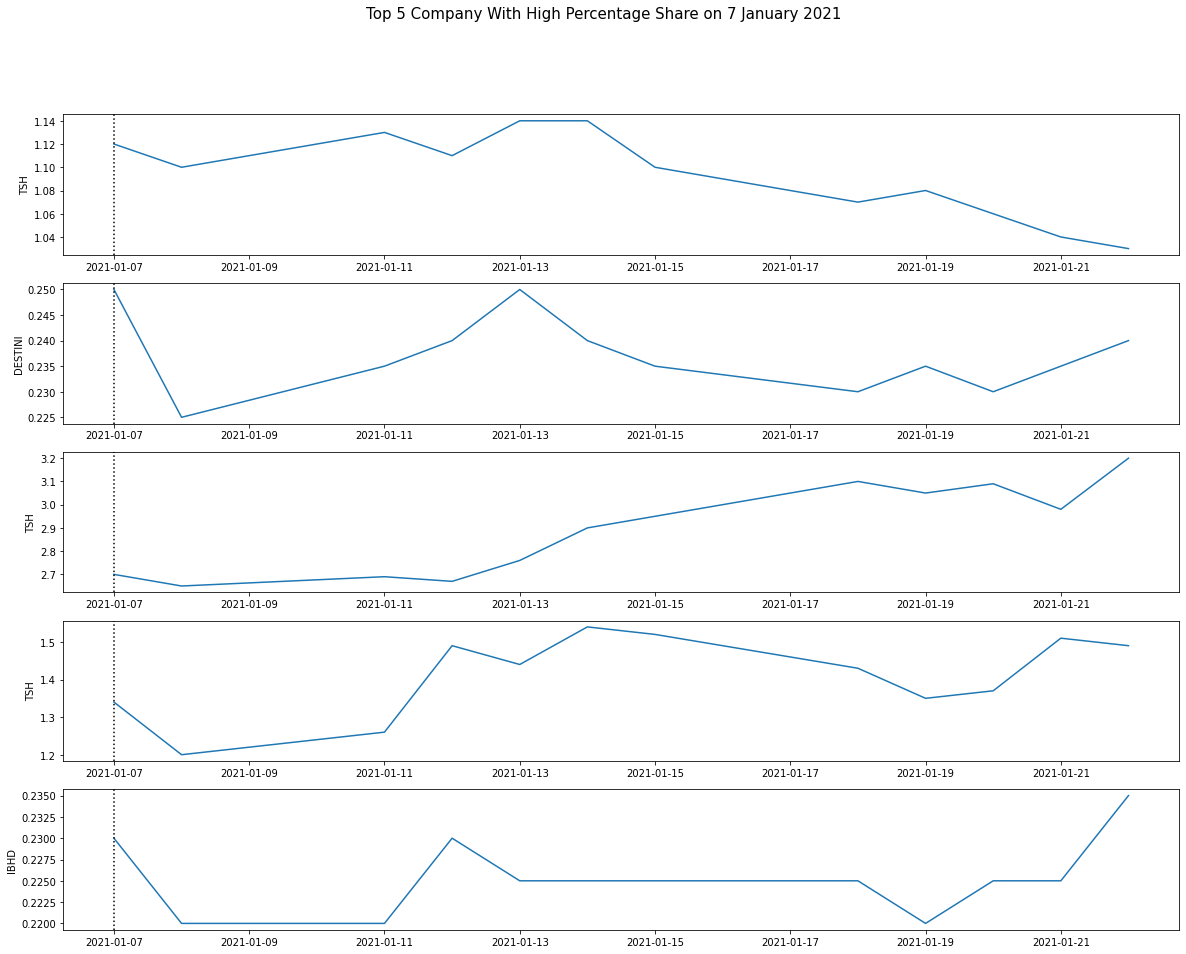

In [ ]:
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(5,1,figsize=(20,15))
fig.suptitle('Top 5 Company With High Percentage Share on 7 January 2021',fontsize=15)

ax1.plot(TSH2.Date,TSH2.Close)
ax1.axvline(x=time4,linestyle='dotted',color='black')
ax1.set_ylabel('TSH')

ax2.plot(DESTINI.Date,DESTINI.Close)
ax2.axvline(x=time4,linestyle='dotted',color='black')
ax2.set_ylabel('DESTINI')

ax3.plot(GTR1.Date,GTR1.Close)
ax3.axvline(x=time4,linestyle='dotted',color='black')
ax3.set_ylabel('TSH')

ax4.plot(ANN1.Date,ANN1.Close)
ax4.axvline(x=time4,linestyle='dotted',color='black')
ax4.set_ylabel('TSH')

ax5.plot(IBHD1.Date,IBHD1.Close)
ax5.axvline(x=time4,linestyle='dotted',color='black')
ax5.set_ylabel('IBHD')

In [ ]:
pct_chg3 =[]
for i in range(0,13):
    df3 = (counter3[i].loc[11,'Close']-counter3[i].loc[0,'Close'])/(counter3[i].loc[0,'Close'])*100
    pct_chg3.append(df3)
print(pct_chg3)


[-8.035717231734662, -4.000002145767212, 18.518518191469717, 11.194027792666583, 2.173910930837298, -4.918037752603991, -4.918037752603991, -1.6393426604503258, -3.174600171093715, 32.131491356454525, 11.194027792666583, 1.7142840794154575, -3.691460553034434]


In [ ]:
A7['pct_chg_in_2weeks']=pct_chg3
A7

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description,pct_chg_in_2weeks
6,3119428,TSH RESOURCES BERHAD,TSH,RHB Capital Nominees (Tempatan) Sdn Bhd,07/01/2021,4.698970,Acquired,NaN,Purchase of shares,"211,049,317",15.292,Ordinary shares,-8.035717
16,3119745,DESTINI BERHAD,DESTINI,ZALEEHA CAPITAL SDN. BHD. (FKA MAZER SDN. BHD.),07/01/2021,5.698970,Acquired,RM0.250,"Acquisition of 500,000 ordinary shares via ope...","105,126,500",6.892,Ordinary shares,-4.000002
12,3119652,GLOBETRONICS TECHNOLOGY BERHAD,GTRONIC,Glencare Sdn Bhd,07/01/2021,3.602060,Acquired,RM2.70 per share,Open market purchases via Glencare Sdn Bhd,"6,979,165",1.040,Ordinary Shares,18.518518
14,3119718,ANN JOO RESOURCES BERHAD,ANNJOO,Dato' Lim Aun Chuan,07/01/2021,4.903090,Acquired,"RM102,400.00",Acquired from open market,"1,636,000",0.303,Ordinary Shares,11.194028
19,3119905,I-BERHAD,IBHD-PA,Sumurwang Capital Sdn Bhd,07/01/2021,4.176091,Acquired,NaN,Purchase of RCCPS in the open market by Sumurw...,"1,974,500",0.267,Redeemable Cumulative Convertible Preference S...,2.173911
8,3119528,DPI HOLDINGS BERHAD,DPIH,FONG YOO KAW @ FONG YEE KOW,07/01/2021,5.778151,Acquired,NaN,ACQUISITION OF SHARES,"800,000",0.164,ORDINARY SHARES,-4.918038
10,3119532,DPI HOLDINGS BERHAD,DPIH,LUA KOK HIYONG,07/01/2021,5.301030,Acquired,RM0.305 per share,ACQUISITION OF SHARES,"500,000",0.103,ORDINARY SHARES,-4.918038
11,3119647,GABUNGAN AQRS BERHAD,GBGAQRS,DATUK KAMARUDIN BIN MD. ALI,07/01/2021,4.602060,Acquired,NaN,Acquisition of shares in open market,"394,000",0.079,Ordinary Shares,-1.639343
7,3119484,POWER ROOT BERHAD,PWROOT,ONG KHENG SWEE,07/01/2021,4.000000,Acquired,NaN,Acquisition of Ordinary Shares,"235,315",0.056,Ordinary Shares,-3.174600
17,3119761,UWC BERHAD,UWC,Dato' Wan Hashim Bin Wan Jusoh,07/01/2021,4.301030,Acquired,NaN,Open market acquisition of shares,"245,000",0.045,Ordinary shares,32.131491


In [ ]:
z=list(set(pct_chg3))
z

[32.131491356454525,
 1.7142840794154575,
 2.173910930837298,
 11.194027792666583,
 -4.918037752603991,
 -3.691460553034434,
 18.518518191469717,
 -8.035717231734662,
 -4.000002145767212,
 -3.174600171093715,
 -1.6393426604503258]

In [ ]:
z.sort(reverse=True)


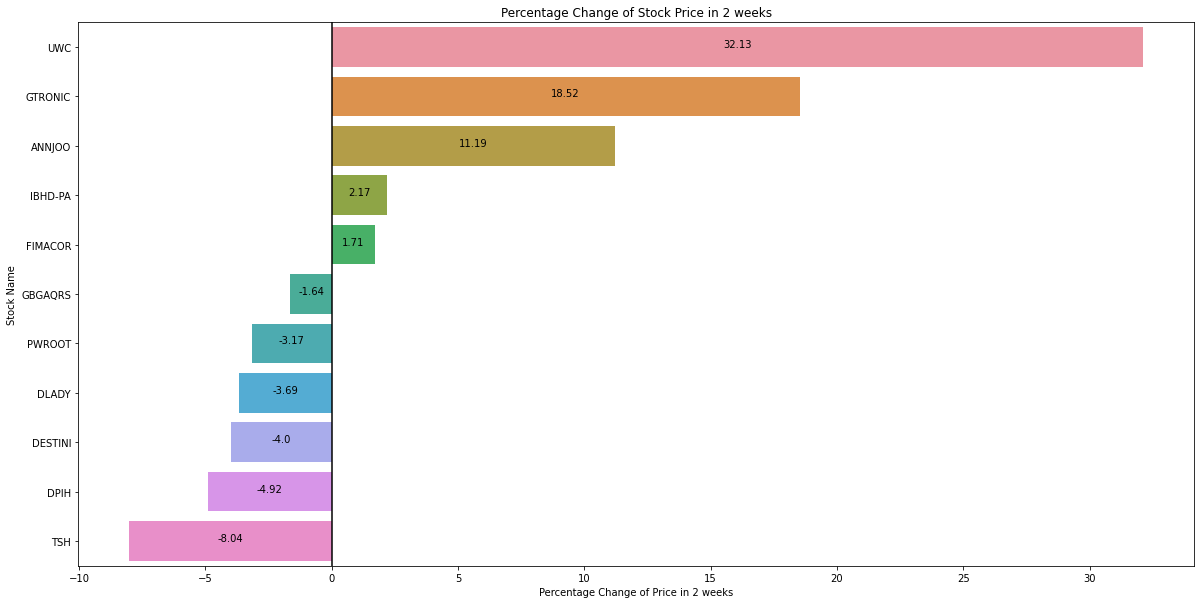

In [ ]:
plt.figure(figsize=(20,10))
for i in range(len(z)):
 plt.text(z[i]/2,i, str(round(z[i],2)),
           fontdict= dict(color = 'black', fontsize =10),
           horizontalalignment= 'center')
sns.barplot(x='pct_chg_in_2weeks',y='stock_name',data=A7.sort_values('pct_chg_in_2weeks',ascending=0))
plt.xlabel('Percentage Change of Price in 2 weeks')
plt.ylabel('Stock Name')
plt.title('Percentage Change of Stock Price in 2 weeks')
plt.axvline(x=0,linestyle='solid',color='black')

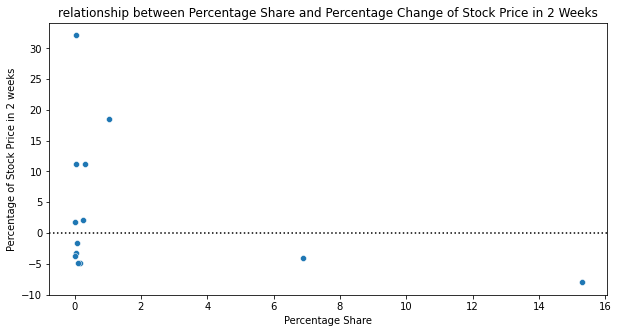

In [ ]:
#pct share vs pct chg
plt.figure(figsize=(10,5))
sns.scatterplot(x='pct_share',y='pct_chg_in_2weeks',data=A7)
plt.xlabel('Percentage Share')
plt.ylabel('Percentage of Stock Price in 2 weeks')
plt.title('relationship between Percentage Share and Percentage Change of Stock Price in 2 Weeks')
plt.axhline(y=0,linestyle='dotted',color='black')

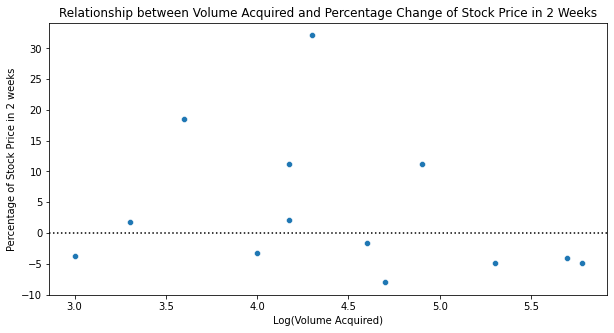

In [ ]:
#volume vs pct chg
plt.figure(figsize=(10,5))
sns.scatterplot(x='share',y='pct_chg_in_2weeks',data=A7)
plt.xlabel('Log(Volume Acquired)')
plt.ylabel('Percentage of Stock Price in 2 weeks')
plt.title('Relationship between Volume Acquired and Percentage Change of Stock Price in 2 Weeks')
plt.axhline(y=0,linestyle='dotted',color='black')

# ***ACQUIRED IN JANUARY 8***

In [ ]:
Jan8 = Acq[Acq['date']=='08/01/2021']
Jan8

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
0,3119729,OKA CORPORATION BHD,OKA,Chok Hooa @ Chok Yin Fatt,08/01/2021,4.301030,Acquired,RM0.61 per share,Acquisition of shares in open market,"1,564,003",0.637,Ordinary shares
1,3119882,MY E.G. SERVICES BERHAD,MYEG,Wong Thean Soon,08/01/2021,6.000000,Acquired,RM1.77,Acquisition of Shares,"386,875,855",10.700,Ordinary Shares
2,3119986,CRG INCORPORATED BERHAD,CRG,Datin Sri Lo Kin Yee,08/01/2021,4.693727,Acquired,NaN,Acquisition of Ordinary Shares,"161,016,340",19.986,Ordinary Shares
3,3119988,HARTALEGA HOLDINGS BERHAD,HARTA,KUAN KAM HON @ KWAN KAM ONN,08/01/2021,5.477121,Acquired,RM11.2593 per share,Acquisition of shares via open market,"26,562,480",0.775,ORDINARY SHARE


In [ ]:
A8 = Jan8.sort_values('pct_share',ascending=0)
A8

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
2,3119986,CRG INCORPORATED BERHAD,CRG,Datin Sri Lo Kin Yee,08/01/2021,4.693727,Acquired,NaN,Acquisition of Ordinary Shares,"161,016,340",19.986,Ordinary Shares
1,3119882,MY E.G. SERVICES BERHAD,MYEG,Wong Thean Soon,08/01/2021,6.000000,Acquired,RM1.77,Acquisition of Shares,"386,875,855",10.700,Ordinary Shares
3,3119988,HARTALEGA HOLDINGS BERHAD,HARTA,KUAN KAM HON @ KWAN KAM ONN,08/01/2021,5.477121,Acquired,RM11.2593 per share,Acquisition of shares via open market,"26,562,480",0.775,ORDINARY SHARE
0,3119729,OKA CORPORATION BHD,OKA,Chok Hooa @ Chok Yin Fatt,08/01/2021,4.301030,Acquired,RM0.61 per share,Acquisition of shares in open market,"1,564,003",0.637,Ordinary shares


In [ ]:
#Find ticker
#CRG
#MYEG
#HARTA
#OKA
time5 = datetime.datetime(2021,1,8)
end5 = datetime.datetime(2021,1,23)

CRG1=web.DataReader('03016.kl','yahoo',time5,end5).reset_index()
MYEG=web.DataReader('0138.kl','yahoo',time5,end5).reset_index()
HARTA=web.DataReader('5168.kl','yahoo',time5,end5).reset_index()
OKA=web.DataReader('7140.kl','yahoo',time5,end5).reset_index()

Text(0, 0.5, 'OKA')

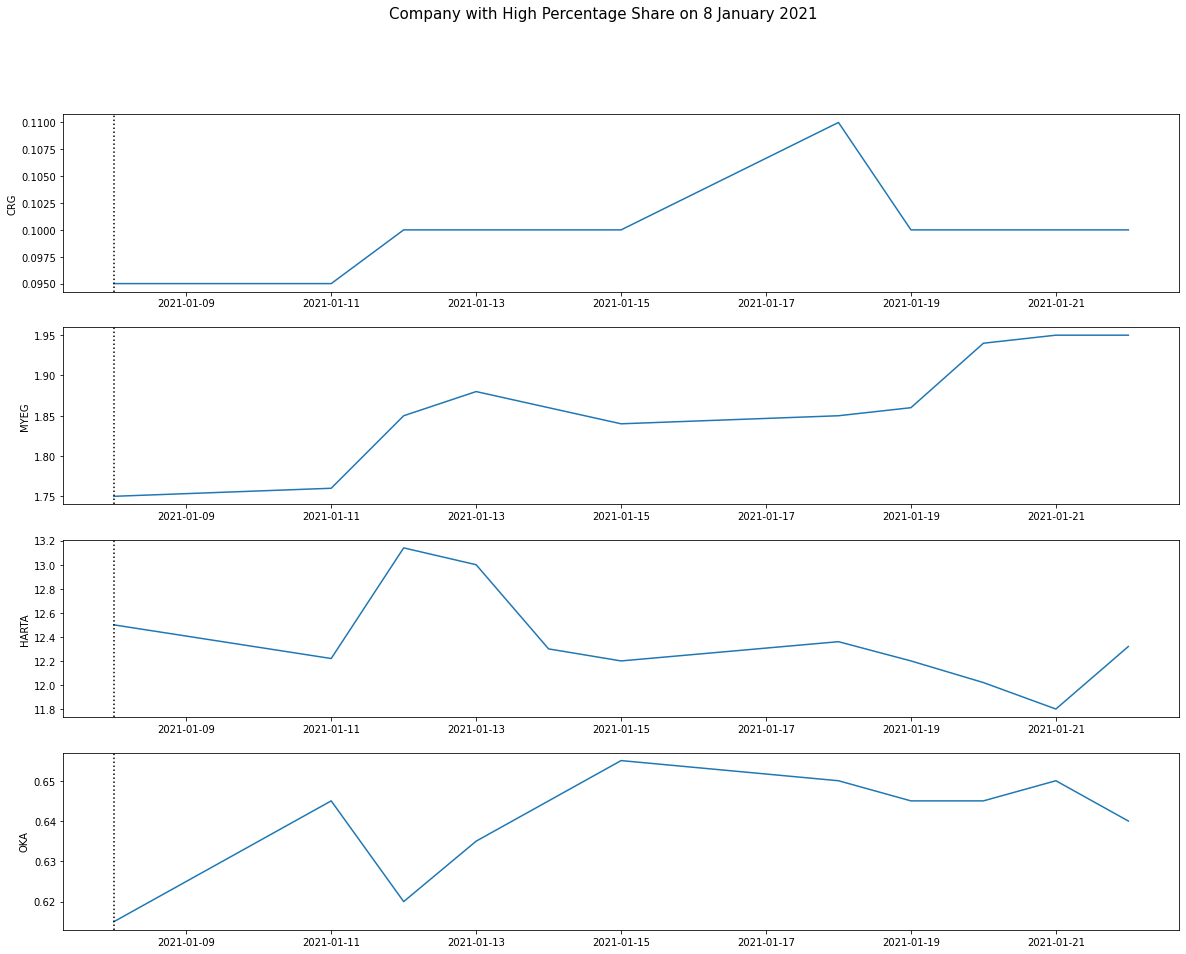

In [ ]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(20,15))
plt.suptitle('Company with High Percentage Share on 8 January 2021',fontsize=15)
ax1.plot(CRG1.Date,CRG1.Close)
ax1.axvline(x=time5,linestyle='dotted',color='black')
ax1.set_ylabel('CRG')

ax2.plot(MYEG.Date,MYEG.Close)
ax2.axvline(x=time5,linestyle='dotted',color='black')
ax2.set_ylabel('MYEG')

ax3.plot(HARTA.Date,HARTA.Close)
ax3.axvline(x=time5,linestyle='dotted',color='black')
ax3.set_ylabel('HARTA')

ax4.plot(OKA.Date,OKA.Close)
ax4.axvline(x=time5,linestyle='dotted',color='black')
ax4.set_ylabel('OKA')


In [ ]:
counter4=[CRG1,MYEG,HARTA,OKA]

In [ ]:
CRG1

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-01-08,0.095,0.085,0.085,0.095,49400,0.092841
1,2021-01-11,0.095,0.095,0.095,0.095,19000,0.092841
2,2021-01-12,0.100,0.100,0.100,0.100,49000,0.097727
3,2021-01-13,0.100,0.100,0.100,0.100,0,0.097727
4,2021-01-14,0.100,0.100,0.100,0.100,77000,0.097727
5,2021-01-15,0.105,0.100,0.100,0.100,217600,0.097727
6,2021-01-18,0.110,0.100,0.100,0.110,230600,0.107500
7,2021-01-19,0.120,0.100,0.110,0.100,718100,0.097727
8,2021-01-20,0.100,0.100,0.100,0.100,19000,0.097727
9,2021-01-21,0.100,0.100,0.100,0.100,0,0.097727


In [ ]:
pct_chg4=[]
for i in range(0,4):
  df4=(counter4[i].loc[10,'Close']-counter4[i].loc[0,'Close'])/(counter4[i].loc[0,'Close'])*100
  pct_chg4.append(df4)
print(pct_chg4)

[5.263160784158717, 11.42857415335519, -1.44000244140625, 4.065036710645526]


In [ ]:
A8['pct_chg_in_2weeks']=pct_chg4
A8

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description,pct_chg_in_2weeks
2,3119986,CRG INCORPORATED BERHAD,CRG,Datin Sri Lo Kin Yee,08/01/2021,4.693727,Acquired,NaN,Acquisition of Ordinary Shares,"161,016,340",19.986,Ordinary Shares,5.263161
1,3119882,MY E.G. SERVICES BERHAD,MYEG,Wong Thean Soon,08/01/2021,6.000000,Acquired,RM1.77,Acquisition of Shares,"386,875,855",10.700,Ordinary Shares,11.428574
3,3119988,HARTALEGA HOLDINGS BERHAD,HARTA,KUAN KAM HON @ KWAN KAM ONN,08/01/2021,5.477121,Acquired,RM11.2593 per share,Acquisition of shares via open market,"26,562,480",0.775,ORDINARY SHARE,-1.440002
0,3119729,OKA CORPORATION BHD,OKA,Chok Hooa @ Chok Yin Fatt,08/01/2021,4.301030,Acquired,RM0.61 per share,Acquisition of shares in open market,"1,564,003",0.637,Ordinary shares,4.065037


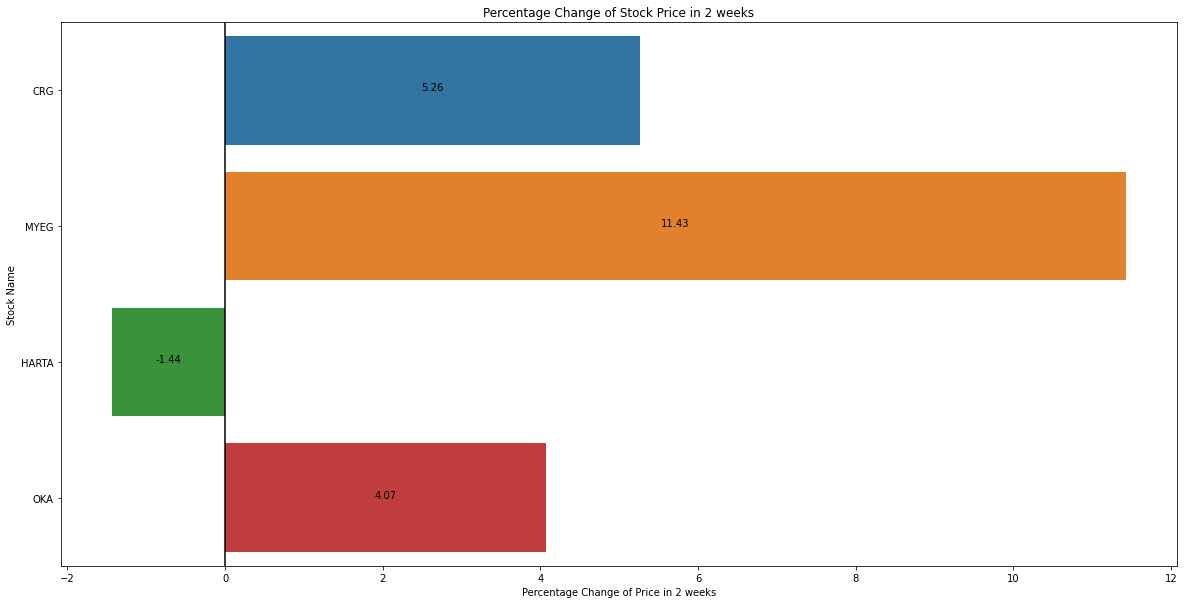

In [ ]:
plt.figure(figsize=(20,10))
for i in range(len(pct_chg4)):
 plt.text(pct_chg4[i]/2,i, str(round(pct_chg4[i],2)),
           fontdict= dict(color = 'black', fontsize =10),
           horizontalalignment= 'center')
sns.barplot(x='pct_chg_in_2weeks',y='stock_name',data=A8)
plt.xlabel('Percentage Change of Price in 2 weeks')
plt.ylabel('Stock Name')
plt.title('Percentage Change of Stock Price in 2 weeks')
plt.axvline(x=0,linestyle='solid',color='black')

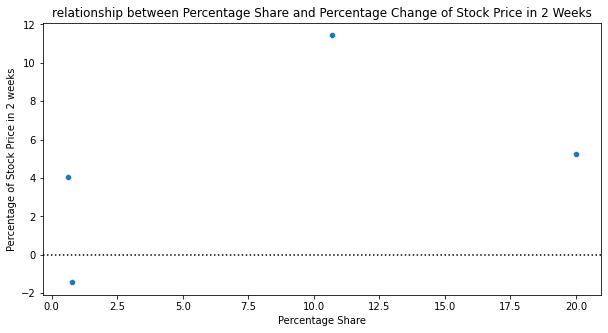

In [ ]:
#pct share vs pct chg
plt.figure(figsize=(10,5))
sns.scatterplot(x='pct_share',y='pct_chg_in_2weeks',data=A8)
plt.xlabel('Percentage Share')
plt.ylabel('Percentage of Stock Price in 2 weeks')
plt.title('relationship between Percentage Share and Percentage Change of Stock Price in 2 Weeks')
plt.axhline(y=0,linestyle='dotted',color='black')

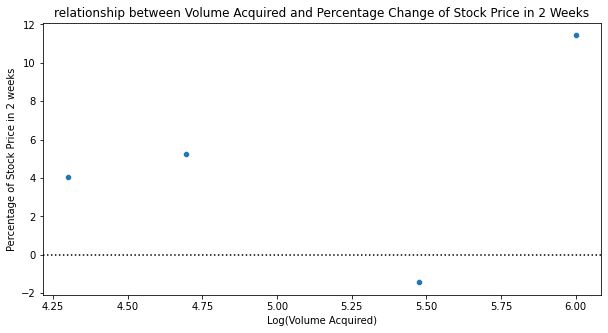

In [ ]:
#volume vs pct chg
plt.figure(figsize=(10,5))
sns.scatterplot(x='share',y='pct_chg_in_2weeks',data=A8)
plt.xlabel('Log(Volume Acquired)')
plt.ylabel('Percentage of Stock Price in 2 weeks')
plt.title('relationship between Volume Acquired and Percentage Change of Stock Price in 2 Weeks')
plt.axhline(y=0,linestyle='dotted',color='black')

In [ ]:
#Append data
test = A4.append(A5)
test = test.append(A6)
test = test.append(A7)
test = test.append(A8)
test

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description,pct_chg_in_2weeks
115,3119447,SENI JAYA CORPORATION BERHAD,SJC,Datin Lee Nai Yee,04/01/2021,5.903090,Acquired,"RM680,000.00",Acquisition of shares,"16,743,130",41.307,Ordinary shares,0.000000
82,3118883,TOP GLOVE CORPORATION BHD,TOPGLOV,RHB NOMINEES (TEMPATAN) SDN BHD PLEDGED SECURI...,04/01/2021,6.558709,Acquired,RM5.5217 Per Share,Acquisition of shares.,"2,105,671,456",26.247,Ordinary Shares,11.636361
97,3119084,SCICOM (MSC) BERHAD,SCICOM,Dato' Sri Leo Suresh Ariyanayakam,04/01/2021,4.477121,Acquired,RM0.93 per share,Acquisition of shares,"90,460,763",25.449,Ordinary Shares,-0.537634
108,3119288,CRG INCORPORATED BERHAD,CRG,CGS-CIMB Nominees (Tempatan) Sdn. Bhd. - Pledg...,04/01/2021,5.968996,Acquired,NaN,Acquisition of Ordinary Shares,"161,016,340",19.986,Ordinary Shares,17.647059
113,3119435,CAREPLUS GROUP BERHAD,CAREPLS,RHB Nominees (Tempatan) Sdn Bhd (Pledged secur...,04/01/2021,4.698970,Acquired,"RM99,000.00",Acquisition of shares via open market,"103,762,200",18.863,Ordinary shares,20.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,3119701,DUTCH LADY MILK INDUSTRIES BERHAD,DLADY,DATIN SERI SUNITA MEI-LIN RAJAKUMAR,07/01/2021,3.000000,Acquired,RM36.336 per share,Acquisition of shares via open market,"1,000",0.001,Ordinary Shares,-3.691461
2,3119986,CRG INCORPORATED BERHAD,CRG,Datin Sri Lo Kin Yee,08/01/2021,4.693727,Acquired,NaN,Acquisition of Ordinary Shares,"161,016,340",19.986,Ordinary Shares,5.263161
1,3119882,MY E.G. SERVICES BERHAD,MYEG,Wong Thean Soon,08/01/2021,6.000000,Acquired,RM1.77,Acquisition of Shares,"386,875,855",10.700,Ordinary Shares,11.428574
3,3119988,HARTALEGA HOLDINGS BERHAD,HARTA,KUAN KAM HON @ KWAN KAM ONN,08/01/2021,5.477121,Acquired,RM11.2593 per share,Acquisition of shares via open market,"26,562,480",0.775,ORDINARY SHARE,-1.440002


In [ ]:
test

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description,pct_chg_in_2weeks
115,3119447,SENI JAYA CORPORATION BERHAD,SJC,Datin Lee Nai Yee,04/01/2021,5.903090,Acquired,"RM680,000.00",Acquisition of shares,"16,743,130",41.307,Ordinary shares,0.000000
82,3118883,TOP GLOVE CORPORATION BHD,TOPGLOV,RHB NOMINEES (TEMPATAN) SDN BHD PLEDGED SECURI...,04/01/2021,6.558709,Acquired,RM5.5217 Per Share,Acquisition of shares.,"2,105,671,456",26.247,Ordinary Shares,11.636361
97,3119084,SCICOM (MSC) BERHAD,SCICOM,Dato' Sri Leo Suresh Ariyanayakam,04/01/2021,4.477121,Acquired,RM0.93 per share,Acquisition of shares,"90,460,763",25.449,Ordinary Shares,-0.537634
108,3119288,CRG INCORPORATED BERHAD,CRG,CGS-CIMB Nominees (Tempatan) Sdn. Bhd. - Pledg...,04/01/2021,5.968996,Acquired,NaN,Acquisition of Ordinary Shares,"161,016,340",19.986,Ordinary Shares,17.647059
113,3119435,CAREPLUS GROUP BERHAD,CAREPLS,RHB Nominees (Tempatan) Sdn Bhd (Pledged secur...,04/01/2021,4.698970,Acquired,"RM99,000.00",Acquisition of shares via open market,"103,762,200",18.863,Ordinary shares,20.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,3119701,DUTCH LADY MILK INDUSTRIES BERHAD,DLADY,DATIN SERI SUNITA MEI-LIN RAJAKUMAR,07/01/2021,3.000000,Acquired,RM36.336 per share,Acquisition of shares via open market,"1,000",0.001,Ordinary Shares,-3.691461
2,3119986,CRG INCORPORATED BERHAD,CRG,Datin Sri Lo Kin Yee,08/01/2021,4.693727,Acquired,NaN,Acquisition of Ordinary Shares,"161,016,340",19.986,Ordinary Shares,5.263161
1,3119882,MY E.G. SERVICES BERHAD,MYEG,Wong Thean Soon,08/01/2021,6.000000,Acquired,RM1.77,Acquisition of Shares,"386,875,855",10.700,Ordinary Shares,11.428574
3,3119988,HARTALEGA HOLDINGS BERHAD,HARTA,KUAN KAM HON @ KWAN KAM ONN,08/01/2021,5.477121,Acquired,RM11.2593 per share,Acquisition of shares via open market,"26,562,480",0.775,ORDINARY SHARE,-1.440002


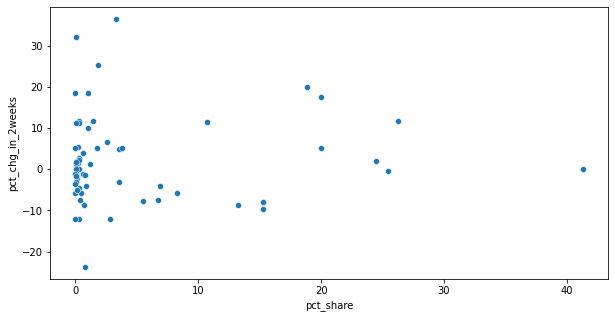

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='pct_share',y='pct_chg_in_2weeks',data=test)

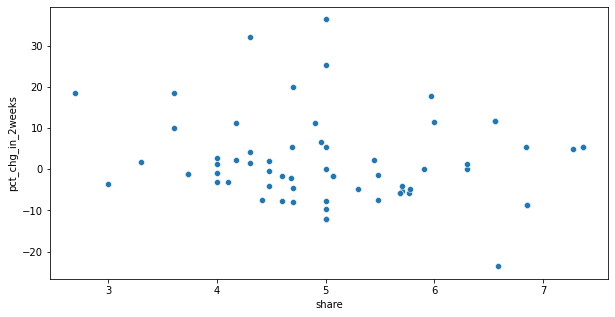

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='share',y='pct_chg_in_2weeks',data=test)

# ***DISPOSED (AMENDMENT)***

In [ ]:
import pandas_datareader.data as web
import datetime

In [ ]:
Disposed = Bursa[Bursa['trans_type']=='Disposed'].sort_values(by=['pct_share'],ascending=0)
Disposed

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
102,3119844,TROPICANA CORPORATION BERHAD,TROP,Tan Sri Dato' Tan Chee Sing,5/1/2021,6.477121,Disposed,NaN,Disposal of shares,"359,462,475",24.596,Ordinary Shares
101,3119545,TROPICANA CORPORATION BERHAD,TROP,Tan Sri Dato' Tan Chee Sing,5/1/2021,6.477121,Disposed,NaN,Disposal of shares,"359,462,475",24.596,Ordinary Shares
56,3119089,MMS VENTURES BERHAD,MMSV,Sim Goay Hoon,5/1/2021,4.903090,Disposed,NaN,Disposal of Shares in Open Market,"31,676,007",15.504,Ordinary Shares
115,3119350,XIAN LENG HOLDINGS BERHAD,XIANLNG,DATO' NG JET HEONG,6/1/2021,6.903090,Disposed,NaN,Disposal,"11,751,600",14.771,Ordinary Shares
61,3119139,PEGASUS HEIGHTS BERHAD,PHB,Chin Pak Loong,5/1/2021,8.477121,Disposed,RM0.02,Disposal of ordinary shares via off market.,"1,505,263,143",14.428,Ordinary Share
72,3119671,SCOPE INDUSTRIES BERHAD,SCOPE,CHEW KONG YOON,5/1/2021,6.740363,Disposed,0.31,Open market disposal,"44,931,196",5.842,Ordinary Shares
62,3119138,PEGASUS HEIGHTS BERHAD,PHB,RHB Nominees (Tempatan) Sdn Bhd Toh Hong Chye,5/1/2021,8.000000,Disposed,RM0.02,Disposal of Warrants via off market.,"139,367,892",4.395,Warrants
54,3119422,MALAYSIAN GENOMICS RESOURCE CENTRE BERHAD,MGRC,SYNAMATIX SDN. BHD.,5/1/2021,5.549089,Disposed,379846.3,"1.\tDisposal of 354,070 shares by Synamatix Sd...","2,894,000",2.796,Ordinary Shares
93,3118985,TIGER SYNERGY BERHAD,TIGER,Datin Sek Chian Nee,4/1/2021,6.778151,Disposed,NaN,1 Disposal of Ordinary Shares through Open Mar...,"29,562,300",2.013,Ordinary Shares
22,3119527,D&O GREEN TECHNOLOGIES BERHAD,D&O,TAY KHENG CHIONG,5/1/2021,5.318063,Disposed,NaN,Disposal of shares via open market \r\nExercis...,"20,039,352",1.737,Ordinary Shares


In [ ]:
Disposed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 102 to 74
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ref            25 non-null     int64  
 1   company        25 non-null     object 
 2   stock_name     25 non-null     object 
 3   director       25 non-null     object 
 4   date           25 non-null     object 
 5   share          25 non-null     float64
 6   trans_type     25 non-null     object 
 7   price          11 non-null     object 
 8   reason         25 non-null     object 
 9   updated_share  23 non-null     object 
 10  pct_share      23 non-null     float64
 11  description    25 non-null     object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.5+ KB


In [ ]:
#TROP
#MMSV
#XIANLNG
#PHB
#SCOPE

start = datetime.datetime(2021,1,1)
end = datetime.datetime(2021,1,31)

TROP = web.DataReader('5401.kl','yahoo',start,end).reset_index()
MMSV = web.DataReader('0113.kl','yahoo',start,end).reset_index()
XIANLNG = web.DataReader('7121.kl','yahoo',start,end).reset_index()
PHB = web.DataReader('4464.kl','yahoo',start,end).reset_index()
SCOPE = web.DataReader('0028.kl','yahoo',start,end).reset_index()

In [ ]:
time= datetime.datetime(2021,1,6)

Text(0, 0.5, 'MMS VENTURES BERHAD')

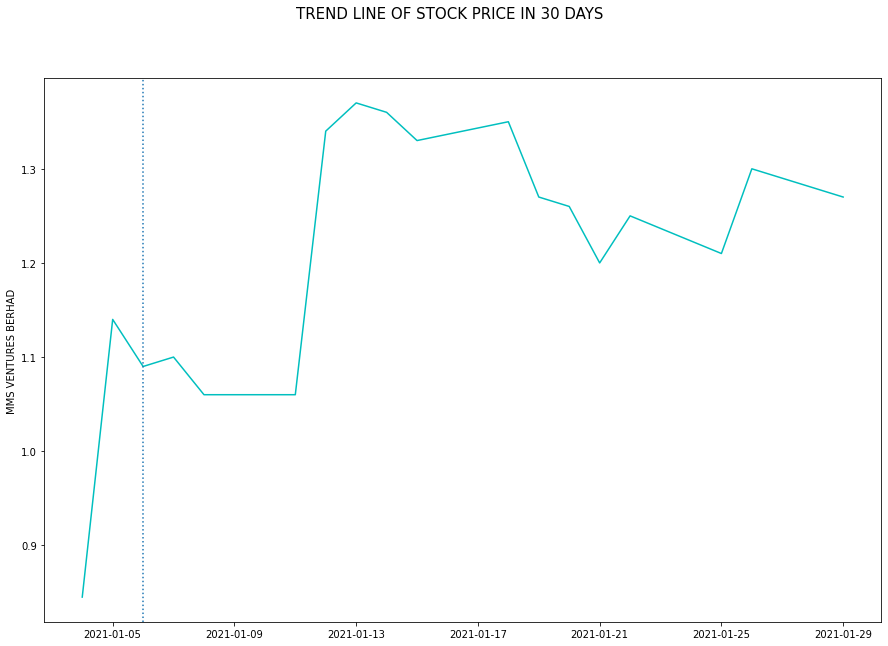

In [ ]:
fig,(ax1) = plt.subplots(1,1,figsize=(15,10))
fig.suptitle('TREND LINE OF STOCK PRICE IN 30 DAYS',fontsize=15)
ax1.plot(MMSV.Date,MMSV.Close, color='c') 
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('MMS VENTURES BERHAD')

In [ ]:
time= datetime.datetime(2021,1,5)

Text(0, 0.5, 'TROPICANA CORPORATION BERHAD')

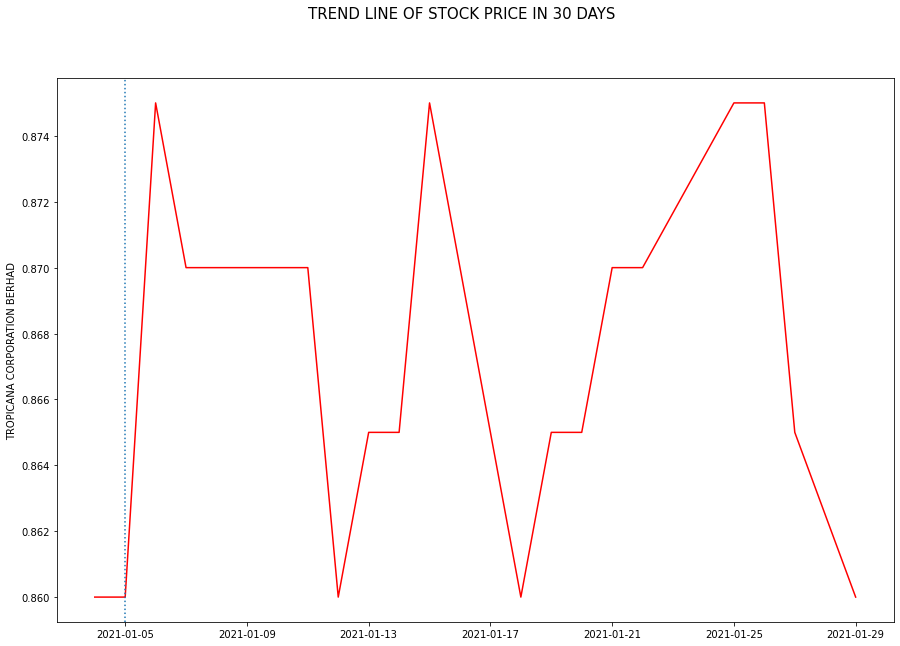

In [ ]:
fig,(ax1) = plt.subplots(1,1,figsize=(15,10))
fig.suptitle('TREND LINE OF STOCK PRICE IN 30 DAYS',fontsize=15)
ax1.plot(TROP.Date,TROP.Close, color='r') 
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('TROPICANA CORPORATION BERHAD')

Text(0, 0.5, 'XIAN LENG HOLDINGS BERHAD')

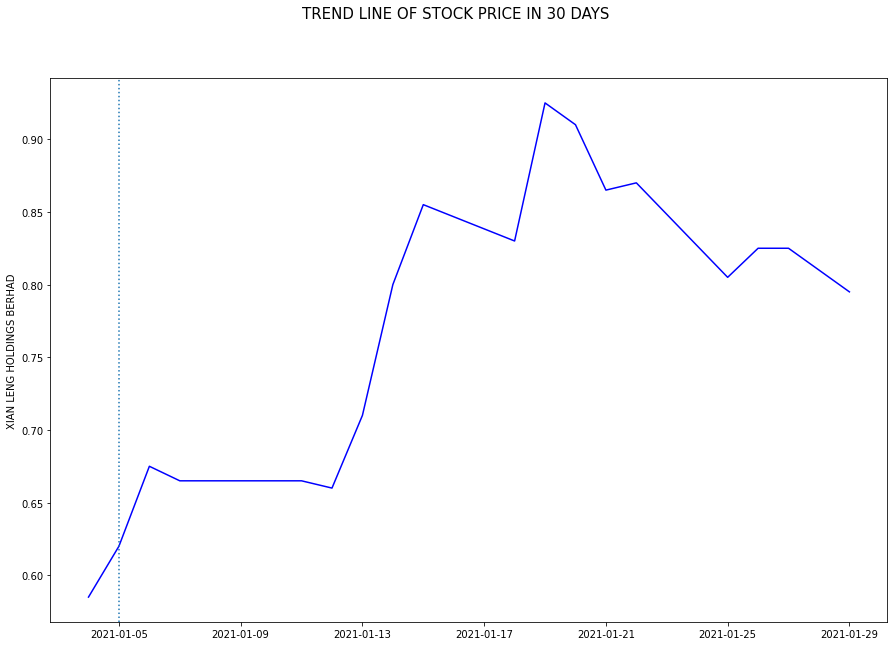

In [ ]:
fig,(ax1) = plt.subplots(1,1,figsize=(15,10))
fig.suptitle('TREND LINE OF STOCK PRICE IN 30 DAYS',fontsize=15)
ax1.plot(XIANLNG.Date,XIANLNG.Close, color='b') 
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('XIAN LENG HOLDINGS BERHAD')

Text(0, 0.5, 'PEGASUS HEIGHTS BERHAD')

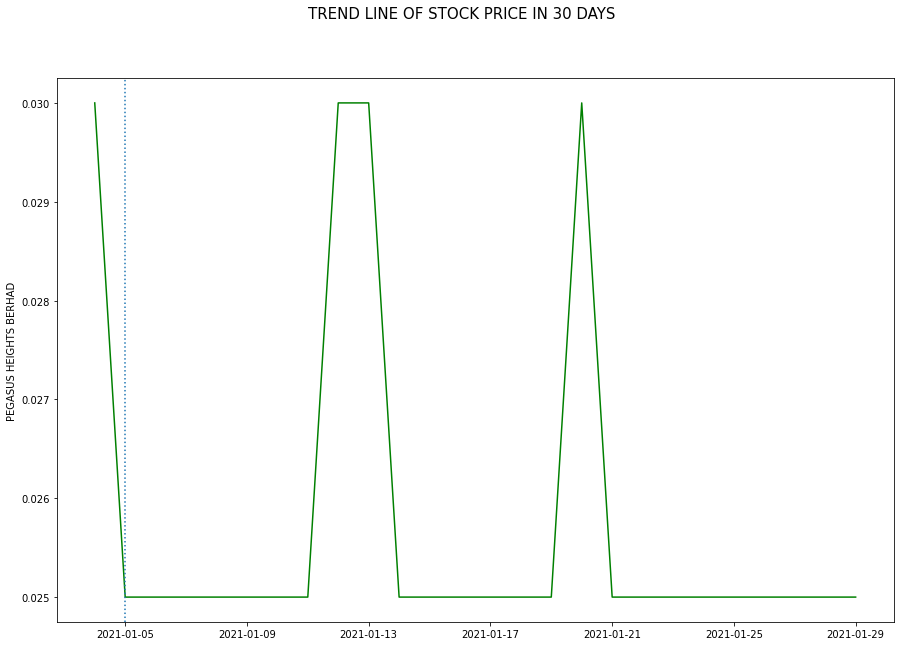

In [ ]:
fig,(ax1) = plt.subplots(1,1,figsize=(15,10))
fig.suptitle('TREND LINE OF STOCK PRICE IN 30 DAYS',fontsize=15)
ax1.plot(PHB.Date,PHB.Close, color='g') 
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('PEGASUS HEIGHTS BERHAD')

Text(0, 0.5, 'SCOPE INDUSTRIES BERHAD')

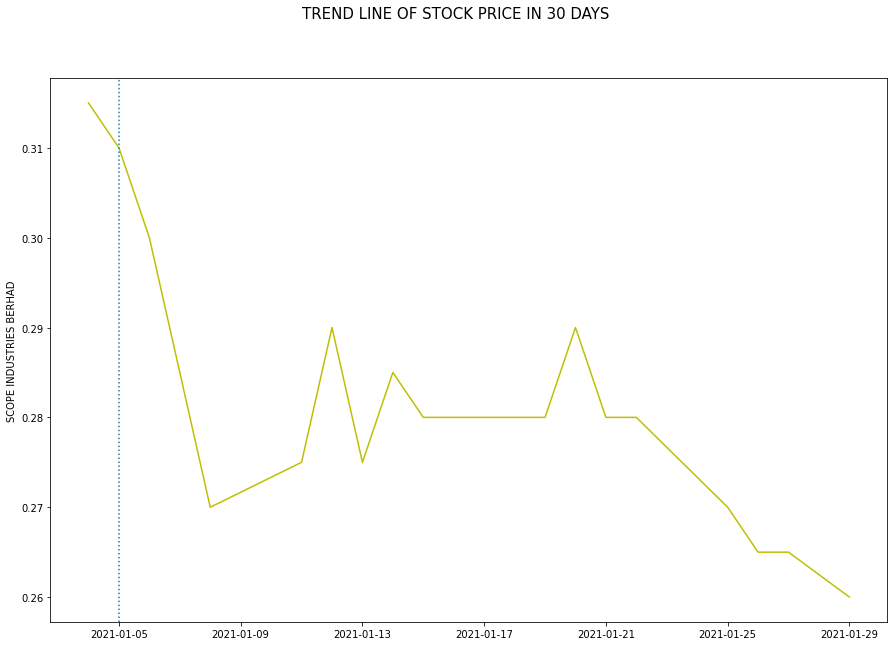

In [ ]:
fig,(ax1) = plt.subplots(1,1,figsize=(15,10))
fig.suptitle('TREND LINE OF STOCK PRICE IN 30 DAYS',fontsize=15)
ax1.plot(SCOPE.Date,SCOPE.Close, color='y') 
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('SCOPE INDUSTRIES BERHAD')

In [ ]:
Disposed = Bursa[Bursa['trans_type']=='Disposed'].sort_values(by=['pct_share'],ascending=0).head(6)
Disposed

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
102,3119844,TROPICANA CORPORATION BERHAD,TROP,Tan Sri Dato' Tan Chee Sing,5/1/2021,6.477121,Disposed,NaN,Disposal of shares,"359,462,475",24.596,Ordinary Shares
101,3119545,TROPICANA CORPORATION BERHAD,TROP,Tan Sri Dato' Tan Chee Sing,5/1/2021,6.477121,Disposed,NaN,Disposal of shares,"359,462,475",24.596,Ordinary Shares
56,3119089,MMS VENTURES BERHAD,MMSV,Sim Goay Hoon,5/1/2021,4.903090,Disposed,NaN,Disposal of Shares in Open Market,"31,676,007",15.504,Ordinary Shares
115,3119350,XIAN LENG HOLDINGS BERHAD,XIANLNG,DATO' NG JET HEONG,6/1/2021,6.903090,Disposed,NaN,Disposal,"11,751,600",14.771,Ordinary Shares
61,3119139,PEGASUS HEIGHTS BERHAD,PHB,Chin Pak Loong,5/1/2021,8.477121,Disposed,RM0.02,Disposal of ordinary shares via off market.,"1,505,263,143",14.428,Ordinary Share
72,3119671,SCOPE INDUSTRIES BERHAD,SCOPE,CHEW KONG YOON,5/1/2021,6.740363,Disposed,0.31,Open market disposal,"44,931,196",5.842,Ordinary Shares


In [ ]:
Company = [TROP, TROP, MMSV, XIANLNG, PHB, SCOPE]

In [ ]:
for i in range (len(Company)):
  print(Company[i])

         Date   High    Low   Open  Close   Volume  Adj Close
0  2021-01-04  0.860  0.830  0.845  0.860   922400      0.860
1  2021-01-05  0.865  0.840  0.855  0.860  3677500      0.860
2  2021-01-06  0.875  0.850  0.860  0.875   988000      0.875
3  2021-01-07  0.875  0.860  0.875  0.870   726400      0.870
4  2021-01-08  0.870  0.855  0.870  0.870  4233800      0.870
5  2021-01-11  0.875  0.860  0.875  0.870   600600      0.870
6  2021-01-12  0.865  0.855  0.865  0.860  3578200      0.860
7  2021-01-13  0.865  0.855  0.860  0.865   338100      0.865
8  2021-01-14  0.865  0.845  0.855  0.865  2872700      0.865
9  2021-01-15  0.875  0.860  0.865  0.875   361000      0.875
10 2021-01-18  0.870  0.860  0.865  0.860  1374700      0.860
11 2021-01-19  0.865  0.855  0.855  0.865   313300      0.865
12 2021-01-20  0.870  0.855  0.855  0.865   270100      0.865
13 2021-01-21  0.870  0.855  0.855  0.870   163600      0.870
14 2021-01-22  0.870  0.865  0.865  0.870   111400      0.870
15 2021-

In [ ]:
pct_chg =[]
for i in range(0,6):
  df=(Company[i].loc[12,'Close']-Company[i].loc[0,'Close'])/(Company[i].loc[0,'Close'])*100
  pct_chg.append(df)
pct_chg

[0.5813947847045612,
 0.5813947847045612,
 49.112419858207254,
 55.5555657443841,
 0.0,
 -7.936509888789085]

In [ ]:
Disposed['pct_chg_for_30days']=pct_chg
Disposed

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description,pct_chg_for_30days
102,3119844,TROPICANA CORPORATION BERHAD,TROP,Tan Sri Dato' Tan Chee Sing,5/1/2021,6.477121,Disposed,NaN,Disposal of shares,"359,462,475",24.596,Ordinary Shares,0.581395
101,3119545,TROPICANA CORPORATION BERHAD,TROP,Tan Sri Dato' Tan Chee Sing,5/1/2021,6.477121,Disposed,NaN,Disposal of shares,"359,462,475",24.596,Ordinary Shares,0.581395
56,3119089,MMS VENTURES BERHAD,MMSV,Sim Goay Hoon,5/1/2021,4.903090,Disposed,NaN,Disposal of Shares in Open Market,"31,676,007",15.504,Ordinary Shares,49.112420
115,3119350,XIAN LENG HOLDINGS BERHAD,XIANLNG,DATO' NG JET HEONG,6/1/2021,6.903090,Disposed,NaN,Disposal,"11,751,600",14.771,Ordinary Shares,55.555566
61,3119139,PEGASUS HEIGHTS BERHAD,PHB,Chin Pak Loong,5/1/2021,8.477121,Disposed,RM0.02,Disposal of ordinary shares via off market.,"1,505,263,143",14.428,Ordinary Share,0.000000
72,3119671,SCOPE INDUSTRIES BERHAD,SCOPE,CHEW KONG YOON,5/1/2021,6.740363,Disposed,0.31,Open market disposal,"44,931,196",5.842,Ordinary Shares,-7.936510


In [ ]:
Disposed=Disposed.sort_values(by=['pct_chg_for_30days'],ascending=0)

In [ ]:
dis=set(pct_chg)

In [ ]:
dis=list(dis)
dis

[0.5813947847045612,
 0.0,
 49.112419858207254,
 55.5555657443841,
 -7.936509888789085]

In [ ]:
dis.sort(reverse=True)

Text(0, 0.5, 'Stock Name')

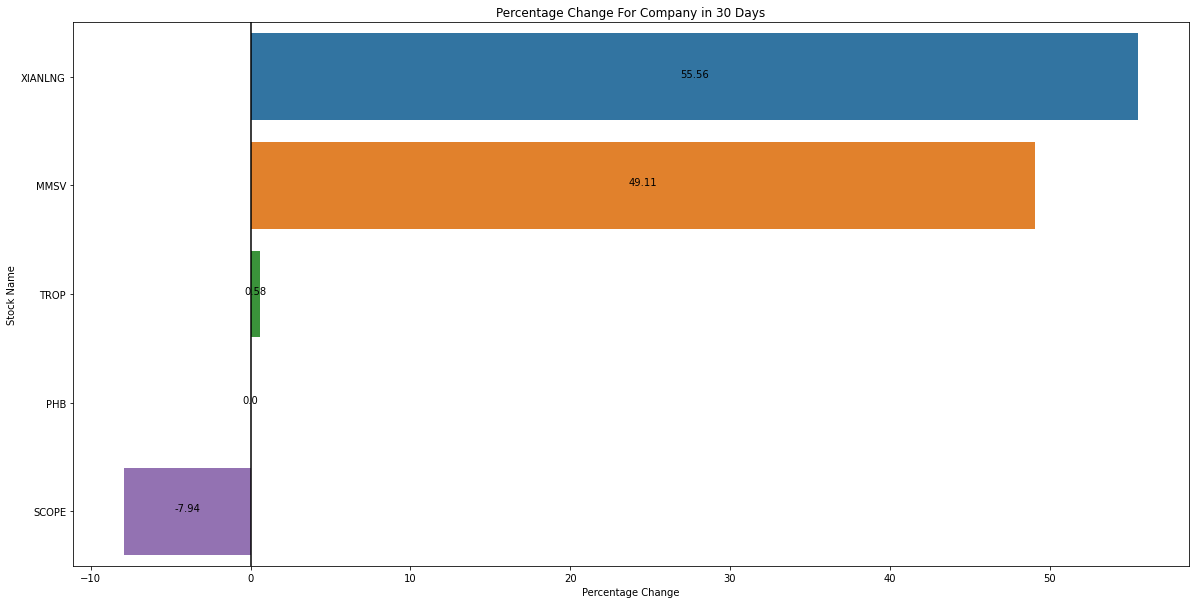

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='pct_chg_for_30days',y='stock_name',data=Disposed)
for i in range(len(dis)):
 plt.text(dis[i]/2,i, str(round(dis[i],2)),
           fontdict= dict(color = 'black', fontsize =10),
           horizontalalignment= 'center')
plt.axvline(x=0,linestyle='solid',color='black')           
plt.title('Percentage Change For Company in 30 Days')
plt.xlabel('Percentage Change')
plt.ylabel('Stock Name')

# ***DISPOSED JANUARY 4***

In [ ]:
sortDis=Disposed.sort_values(by=['pct_share'],ascending=0)
sortDis

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
67,3119545,TROPICANA CORPORATION BERHAD,TROP,Tan Sri Dato' Tan Chee Sing,05/01/2021,6.477121,Disposed,NaN,Disposal of shares,"359,462,475",24.596,Ordinary Shares
72,3119844,TROPICANA CORPORATION BERHAD,TROP,Tan Sri Dato' Tan Chee Sing,05/01/2021,6.477121,Disposed,NaN,Disposal of shares,"359,462,475",24.596,Ordinary Shares
43,3119089,MMS VENTURES BERHAD,MMSV,Sim Goay Hoon,05/01/2021,4.903090,Disposed,NaN,Disposal of Shares in Open Market,"31,676,007",15.504,Ordinary Shares
27,3119350,XIAN LENG HOLDINGS BERHAD,XIANLNG,DATO' NG JET HEONG,06/01/2021,6.903090,Disposed,NaN,Disposal,"11,751,600",14.771,Ordinary Shares
51,3119139,PEGASUS HEIGHTS BERHAD,PHB,Chin Pak Loong,05/01/2021,8.477121,Disposed,RM0.02,Disposal of ordinary shares via off market.,"1,505,263,143",14.428,Ordinary Share
69,3119671,SCOPE INDUSTRIES BERHAD,SCOPE,CHEW KONG YOON,05/01/2021,6.740363,Disposed,0.31,Open market disposal,"44,931,196",5.842,Ordinary Shares
50,3119138,PEGASUS HEIGHTS BERHAD,PHB,RHB Nominees (Tempatan) Sdn Bhd Toh Hong Chye,05/01/2021,8.000000,Disposed,RM0.015,Disposal of Warrants via off market.,"139,367,892",4.395,Warrants
63,3119422,MALAYSIAN GENOMICS RESOURCE CENTRE BERHAD,MGRC,SYNAMATIX SDN. BHD.,05/01/2021,5.549089,Disposed,379846.30,"1.\tDisposal of 354,070 shares by Synamatix Sd...","2,894,000",2.796,Ordinary Shares
90,3118985,TIGER SYNERGY BERHAD,TIGER,Datin Sek Chian Nee,04/01/2021,6.778151,Disposed,NaN,1 Disposal of Ordinary Shares through Open Mar...,"29,562,300",2.013,Ordinary Shares
65,3119527,D&O GREEN TECHNOLOGIES BERHAD,D&O,TAY KHENG CHIONG,05/01/2021,5.318063,Disposed,NaN,Disposal of shares via open market \r\nExercis...,"20,039,352",1.737,Ordinary Shares


In [ ]:
Jan4 = Disposed[Disposed['date']=='04/01/2021'].sort_values(by=['pct_share'],ascending=0)
Jan4

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
90,3118985,TIGER SYNERGY BERHAD,TIGER,Datin Sek Chian Nee,04/01/2021,6.778151,Disposed,NaN,1 Disposal of Ordinary Shares through Open Mar...,"29,562,300",2.013,Ordinary Shares
80,3118833,D&O GREEN TECHNOLOGIES BERHAD,D&O,TAY KHENG CHIONG,04/01/2021,5.332438,Disposed,NaN,Disposal of shares via open market\r\nExercise...,"19,346,852",1.677,Ordinary Shares
107,3119235,CN ASIA CORPORATION BHD,CNASIA,HO CHENG SAN,04/01/2021,6.301030,Disposed,NaN,"2,070,000 ordinary shares disposed via open ma...","693,535",1.263,ORDINARY SHARES
111,3119377,CHIN HIN GROUP PROPERTY BERHAD,CHGP,BKNT Resources Sdn Bhd,04/01/2021,7.000000,Disposed,RM0.50,Deemed interested by virtue of his shareholdin...,"2,650,000",0.773,Ordinary Shares
105,3119221,SWS CAPITAL BERHAD,SWSCAP,PIONG YEW PENG,04/01/2021,5.000000,Disposed,"RM79,539.84",Open market deal,"150,000",0.072,Ordinary shares
77,3118646,BCM ALLIANCE BERHAD,BCMALL,Lo Ling,04/01/2021,7.731811,Disposed,NaN,Disposal of ordinary shares via off market. \r...,0,0.000,Ordinary Shares
76,3118645,BCM ALLIANCE BERHAD,BCMALL,Koh Pee Seng,04/01/2021,7.528806,Disposed,NaN,Disposal of ordinary shares via off market. \r...,0,0.000,Ordinary Shares


In [ ]:
#Top 6 from Jan4

#Tiger
#D&O
#CnAsia
#Chgp
#Swscap
#Bcmall

start = datetime.datetime(2021,1,4)
end = datetime.datetime(2021,1,19)

Tiger= web.DataReader('7079.kl','yahoo',start,end).reset_index()
DnO = web.DataReader('7204.kl','yahoo',start,end).reset_index()
CnAsia = web.DataReader('7986.kl','yahoo',start,end).reset_index()
Chgp = web.DataReader('7187.kl','yahoo',start,end).reset_index()
Swscap = web.DataReader('7186.kl','yahoo',start,end).reset_index()
Bcmall = web.DataReader('0187.kl','yahoo',start,end).reset_index()

In [ ]:
time= datetime.datetime(2021,1,4)

Text(0, 0.5, 'BCMALL')

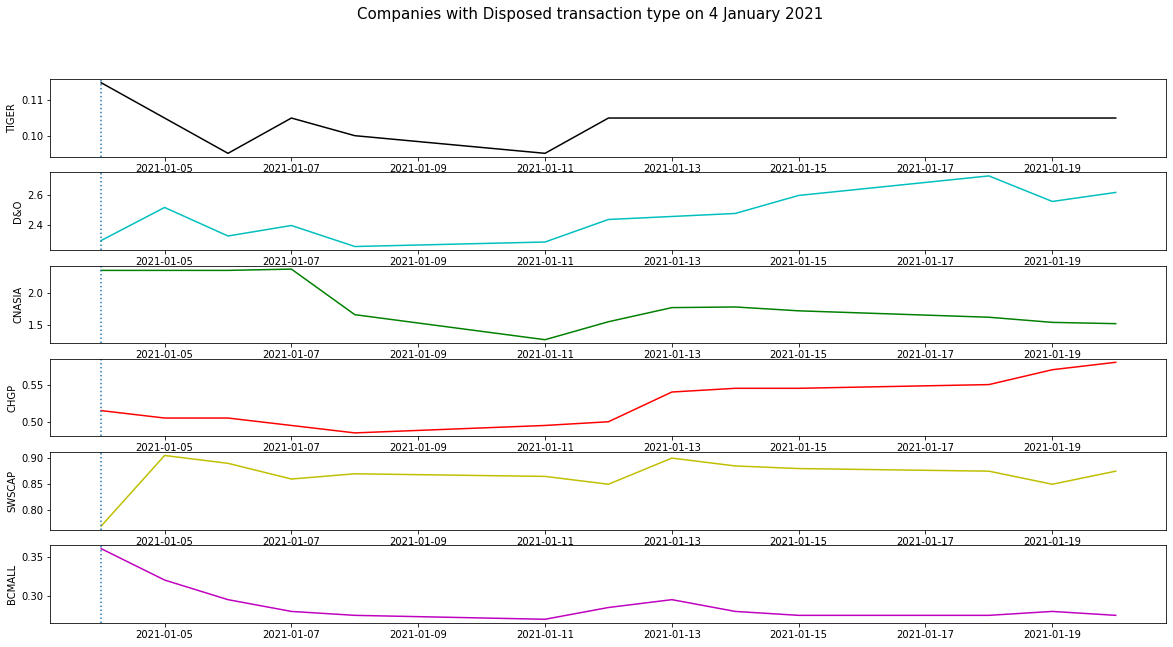

In [ ]:
#Tiger
#D&O
#CnAsia
#Chgp
#Swscap
#Bcmall

fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1,figsize=(20,10))
fig.suptitle('Companies with Disposed transaction type on 4 January 2021',fontsize=15)
ax1.plot(Tiger.Date,Tiger.Close, color='k') #Tiger
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('TIGER')

ax2.plot(DnO.Date,DnO.Close, color='c')#DnO
ax2.axvline(x=time,linestyle ='dotted')
ax2.set_ylabel('D&O')

ax3.plot(CnAsia.Date,CnAsia.Close, color='g')#CnAsia
ax3.axvline(x=time,linestyle ='dotted')
ax3.set_ylabel('CNASIA')

ax4.plot(Chgp.Date,Chgp.Close, color='r') #Chgp
ax4.axvline(x=time,linestyle ='dotted')
ax4.set_ylabel('CHGP')

ax5.plot(Swscap.Date,Swscap.Close, color='y')#Swscap
ax5.axvline(x=time,linestyle ='dotted')
ax5.set_ylabel('SWSCAP')

ax6.plot(Bcmall.Date,Bcmall.Close, color='m') #Bcmall
ax6.axvline(x=time,linestyle ='dotted')
ax6.set_ylabel('BCMALL')

# ***DISPOSED JANUARY 5***

In [ ]:
Jan5 = Disposed[Disposed['date']=='05/01/2021'].sort_values(by=['pct_share'],ascending=0)
Jan5

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
67,3119545,TROPICANA CORPORATION BERHAD,TROP,Tan Sri Dato' Tan Chee Sing,05/01/2021,6.477121,Disposed,NaN,Disposal of shares,"359,462,475",24.596,Ordinary Shares
72,3119844,TROPICANA CORPORATION BERHAD,TROP,Tan Sri Dato' Tan Chee Sing,05/01/2021,6.477121,Disposed,NaN,Disposal of shares,"359,462,475",24.596,Ordinary Shares
43,3119089,MMS VENTURES BERHAD,MMSV,Sim Goay Hoon,05/01/2021,4.903090,Disposed,NaN,Disposal of Shares in Open Market,"31,676,007",15.504,Ordinary Shares
51,3119139,PEGASUS HEIGHTS BERHAD,PHB,Chin Pak Loong,05/01/2021,8.477121,Disposed,RM0.02,Disposal of ordinary shares via off market.,"1,505,263,143",14.428,Ordinary Share
69,3119671,SCOPE INDUSTRIES BERHAD,SCOPE,CHEW KONG YOON,05/01/2021,6.740363,Disposed,0.31,Open market disposal,"44,931,196",5.842,Ordinary Shares
50,3119138,PEGASUS HEIGHTS BERHAD,PHB,RHB Nominees (Tempatan) Sdn Bhd Toh Hong Chye,05/01/2021,8.000000,Disposed,RM0.015,Disposal of Warrants via off market.,"139,367,892",4.395,Warrants
63,3119422,MALAYSIAN GENOMICS RESOURCE CENTRE BERHAD,MGRC,SYNAMATIX SDN. BHD.,05/01/2021,5.549089,Disposed,379846.30,"1.\tDisposal of 354,070 shares by Synamatix Sd...","2,894,000",2.796,Ordinary Shares
65,3119527,D&O GREEN TECHNOLOGIES BERHAD,D&O,TAY KHENG CHIONG,05/01/2021,5.318063,Disposed,NaN,Disposal of shares via open market \r\nExercis...,"20,039,352",1.737,Ordinary Shares
73,3119908,TOYO VENTURES HOLDINGS BERHAD,TOYOVEN-WB,LIM GUAN LEE,05/01/2021,5.518514,Disposed,NaN,Direct Interest:-\r\n- Disposal warrants throu...,"647,000",1.209,Warrants 2018/2023
53,3119201,TOYO VENTURES HOLDINGS BERHAD,TOYOVEN-WB,SONG KOK CHEONG,05/01/2021,5.000000,Disposed,NaN,Direct Interest:-\r\n- Disposal warrants throu...,"550,000",1.028,Warrants 2018/2023


In [ ]:
#Top 5 from Jan5

#Trop
#Mmsv
#Phb
#Scope
#Mgrc

start = datetime.datetime(2021,1,4)
end = datetime.datetime(2021,1,19)

Trop = web.DataReader('5401.kl','yahoo',start,end).reset_index()
Mmsv = web.DataReader('0113.kl','yahoo',start,end).reset_index()
Phb = web.DataReader('4464.kl','yahoo',start,end).reset_index()
Scope = web.DataReader('0028.kl','yahoo',start,end).reset_index()
Mgrc = web.DataReader('0155.kl','yahoo',start,end).reset_index()

In [ ]:
time= datetime.datetime(2021,1,4)

Text(0, 0.5, 'MGRC')

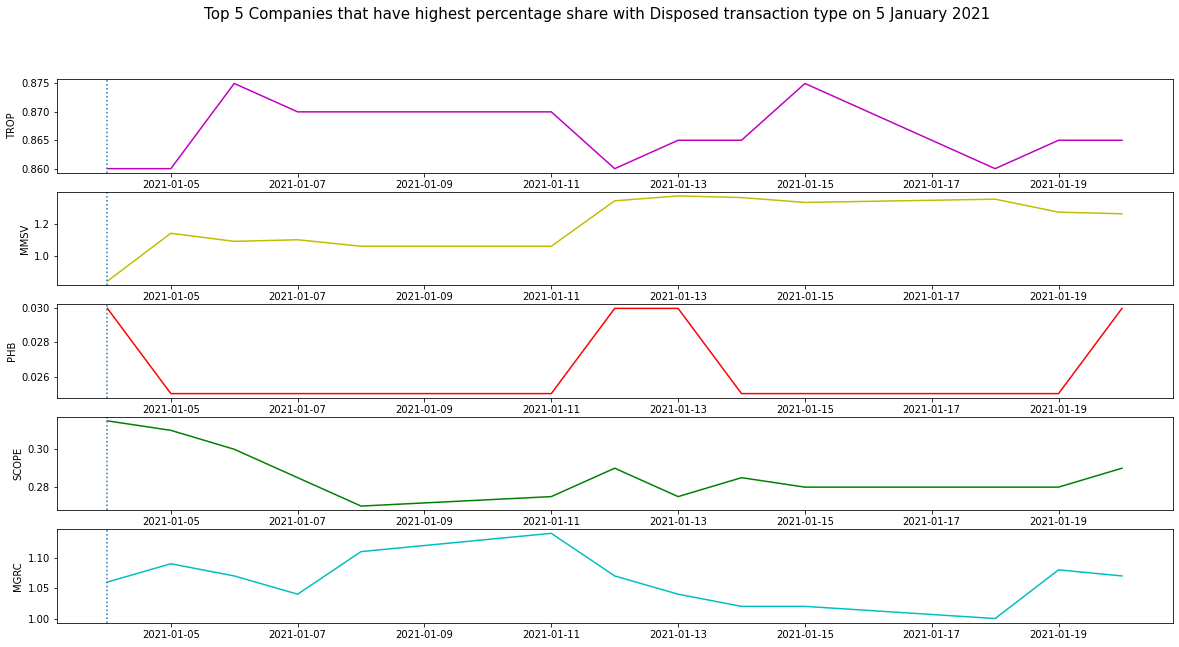

In [ ]:
#Trop
#Mmsv
#Phb
#Scope
#Mgrc

fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(20,10))
fig.suptitle('Top 5 Companies that have highest percentage share with Disposed transaction type on 5 January 2021',fontsize=15)
ax1.plot(Trop.Date,Trop.Close, color='m') #Trop
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('TROP')

ax2.plot(Mmsv.Date,Mmsv.Close, color='y')#Mmsv
ax2.axvline(x=time,linestyle ='dotted')
ax2.set_ylabel('MMSV')

ax3.plot(Phb.Date,Phb.Close, color='r')#Phb
ax3.axvline(x=time,linestyle ='dotted')
ax3.set_ylabel('PHB')

ax4.plot(Scope.Date,Scope.Close, color='g') #Scope
ax4.axvline(x=time,linestyle ='dotted')
ax4.set_ylabel('SCOPE')

ax5.plot(Mgrc.Date,Mgrc.Close, color='c')#Mgrc
ax5.axvline(x=time,linestyle ='dotted')
ax5.set_ylabel('MGRC')

# ***DISPOSED JANUARY 6***

In [ ]:
Jan6 = Disposed[Disposed['date']=='06/01/2021'].sort_values(by=['pct_share'],ascending=0)
Jan6

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
27,3119350,XIAN LENG HOLDINGS BERHAD,XIANLNG,DATO' NG JET HEONG,06/01/2021,6.90309,Disposed,NaN,Disposal,"11,751,600",14.771,Ordinary Shares
26,3119245,THETA EDGE BERHAD,THETA,CGS-CIMB Nominees (Tempatan) Sdn Bhd - Pledged...,06/01/2021,5.00000,Disposed,RM0.943 per share (average price),Disposal in Open Market,"350,000",0.326,Ordinary Shares


In [ ]:
#Companies from Jan6

#Xianlng
#Theta


start = datetime.datetime(2021,1,4)
end = datetime.datetime(2021,1,19)

Xianlng = web.DataReader('7121.kl','yahoo',start,end).reset_index()
Theta = web.DataReader('0113.kl','yahoo',start,end).reset_index()

In [ ]:
time= datetime.datetime(2021,1,4)

Text(0, 0.5, 'THETA')

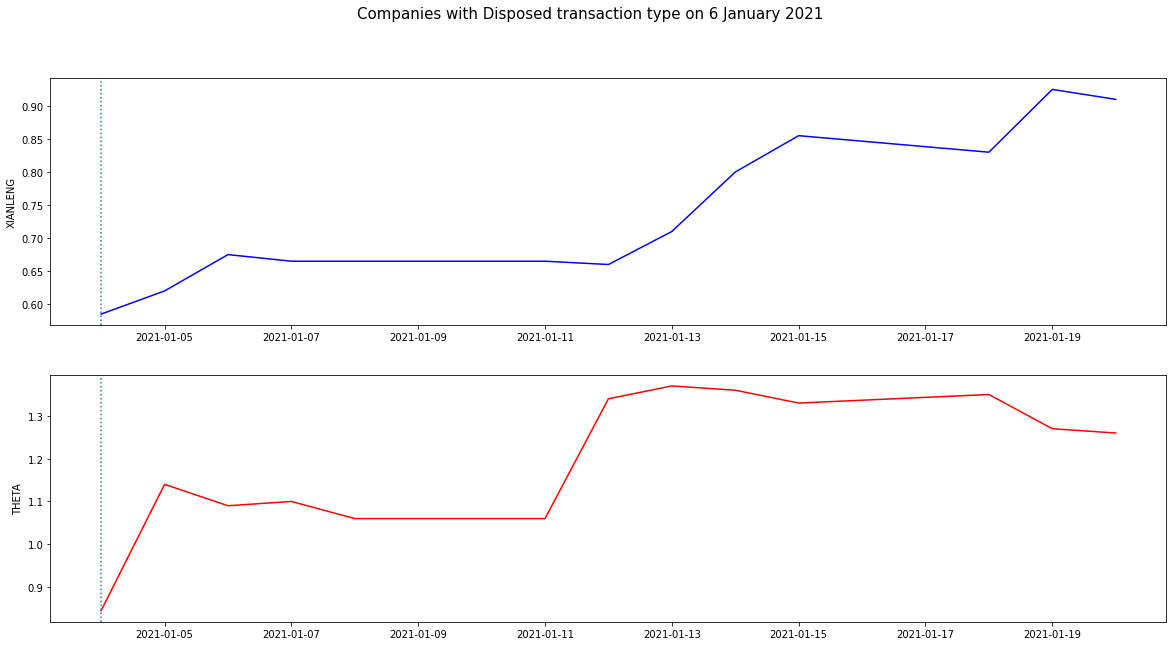

In [ ]:
#Xianlng
#Theta

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(20,10))
fig.suptitle('Companies with Disposed transaction type on 6 January 2021',fontsize=15)
ax1.plot(Xianlng.Date,Xianlng.Close, color='b') #Xianlng
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('XIANLENG')

ax2.plot(Theta.Date,Theta.Close, color='r')#Theta
ax2.axvline(x=time,linestyle ='dotted')
ax2.set_ylabel('THETA')

# ***DISPOSED JANUARY 7***

In [ ]:
Jan7 = Disposed[Disposed['date']=='07/01/2021'].sort_values(by=['pct_share'],ascending=0)
Jan7

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
9,3119529,THETA EDGE BERHAD,THETA,CGS-CIMB Nominees (Tempatan) Sdn Bhd - Pledged...,07/01/2021,4.845098,Disposed,RM0.876 per share (average price),Disposal in Open Market,"280,000",0.261,Ordinary Shares
5,3119392,ES CERAMICS TECHNOLOGY BHD,ESCERAM,RITHAUDDIN HUSSEIN JAMALATIFF BIN JAMALUDDIN,07/01/2021,5.176091,Disposed,RM0.30 per warrant,Disposal of Warrants,NaN,NaN,Warrants B (2020/2023)
18,3119889,SENTORIA GROUP BERHAD,SNTORIA,Base Rock Sdn. Bhd.,07/01/2021,6.176091,Disposed,NaN,Disposal via married deal,NaN,NaN,Ordinary shares


In [ ]:
#Companies from Jan7

#Esceram
#Sntoria
#Theta


start = datetime.datetime(2021,1,4)
end = datetime.datetime(2021,1,19)

Esceram = web.DataReader('0100.kl','yahoo',start,end).reset_index()
Sntoria = web.DataReader('5213.kl','yahoo',start,end).reset_index()
Theta = web.DataReader('0113.kl','yahoo',start,end).reset_index()

In [ ]:
time= datetime.datetime(2021,1,4)

Text(0, 0.5, 'THETA')

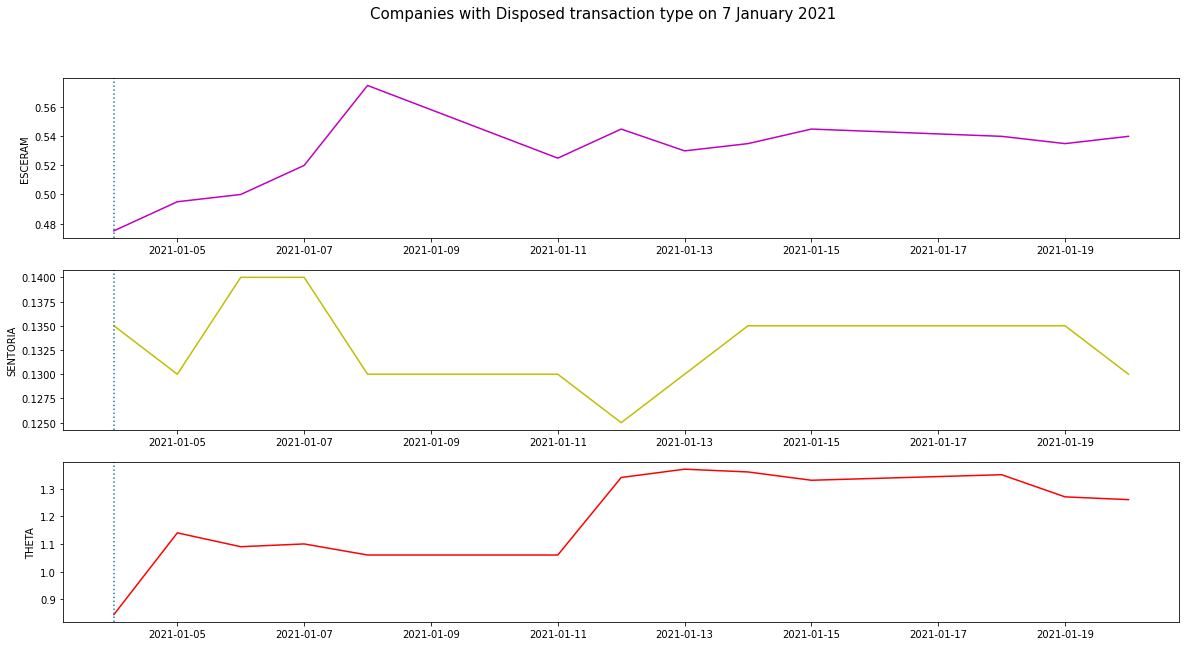

In [ ]:
#Esceram
#Sntoria
#Theta

fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(20,10))
fig.suptitle('Companies with Disposed transaction type on 7 January 2021',fontsize=15)
ax1.plot(Esceram.Date,Esceram.Close, color='m') #Esceram
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('ESCERAM')

ax2.plot(Sntoria.Date,Sntoria.Close, color='y')#Sntoria
ax2.axvline(x=time,linestyle ='dotted')
ax2.set_ylabel('SENTORIA')

ax3.plot(Theta.Date,Theta.Close, color='r')#Theta
ax3.axvline(x=time,linestyle ='dotted')
ax3.set_ylabel('THETA')

# ***CORRELATION DISPOSED***

In [ ]:
CorrDis=Disposed.sort_values(['pct_share'],ascending=0)
CorrDis

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
67,3119545,TROPICANA CORPORATION BERHAD,TROP,Tan Sri Dato' Tan Chee Sing,05/01/2021,6.477121,Disposed,NaN,Disposal of shares,"359,462,475",24.596,Ordinary Shares
72,3119844,TROPICANA CORPORATION BERHAD,TROP,Tan Sri Dato' Tan Chee Sing,05/01/2021,6.477121,Disposed,NaN,Disposal of shares,"359,462,475",24.596,Ordinary Shares
43,3119089,MMS VENTURES BERHAD,MMSV,Sim Goay Hoon,05/01/2021,4.903090,Disposed,NaN,Disposal of Shares in Open Market,"31,676,007",15.504,Ordinary Shares
27,3119350,XIAN LENG HOLDINGS BERHAD,XIANLNG,DATO' NG JET HEONG,06/01/2021,6.903090,Disposed,NaN,Disposal,"11,751,600",14.771,Ordinary Shares
51,3119139,PEGASUS HEIGHTS BERHAD,PHB,Chin Pak Loong,05/01/2021,8.477121,Disposed,RM0.02,Disposal of ordinary shares via off market.,"1,505,263,143",14.428,Ordinary Share
69,3119671,SCOPE INDUSTRIES BERHAD,SCOPE,CHEW KONG YOON,05/01/2021,6.740363,Disposed,0.31,Open market disposal,"44,931,196",5.842,Ordinary Shares
50,3119138,PEGASUS HEIGHTS BERHAD,PHB,RHB Nominees (Tempatan) Sdn Bhd Toh Hong Chye,05/01/2021,8.000000,Disposed,RM0.015,Disposal of Warrants via off market.,"139,367,892",4.395,Warrants
63,3119422,MALAYSIAN GENOMICS RESOURCE CENTRE BERHAD,MGRC,SYNAMATIX SDN. BHD.,05/01/2021,5.549089,Disposed,379846.30,"1.\tDisposal of 354,070 shares by Synamatix Sd...","2,894,000",2.796,Ordinary Shares
90,3118985,TIGER SYNERGY BERHAD,TIGER,Datin Sek Chian Nee,04/01/2021,6.778151,Disposed,NaN,1 Disposal of Ordinary Shares through Open Mar...,"29,562,300",2.013,Ordinary Shares
65,3119527,D&O GREEN TECHNOLOGIES BERHAD,D&O,TAY KHENG CHIONG,05/01/2021,5.318063,Disposed,NaN,Disposal of shares via open market \r\nExercis...,"20,039,352",1.737,Ordinary Shares


In [ ]:
CorrDis.drop(68,axis=0,inplace=True)

In [ ]:
CorrDis

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
67,3119545,TROPICANA CORPORATION BERHAD,TROP,Tan Sri Dato' Tan Chee Sing,05/01/2021,6.477121,Disposed,NaN,Disposal of shares,"359,462,475",24.596,Ordinary Shares
72,3119844,TROPICANA CORPORATION BERHAD,TROP,Tan Sri Dato' Tan Chee Sing,05/01/2021,6.477121,Disposed,NaN,Disposal of shares,"359,462,475",24.596,Ordinary Shares
43,3119089,MMS VENTURES BERHAD,MMSV,Sim Goay Hoon,05/01/2021,4.903090,Disposed,NaN,Disposal of Shares in Open Market,"31,676,007",15.504,Ordinary Shares
27,3119350,XIAN LENG HOLDINGS BERHAD,XIANLNG,DATO' NG JET HEONG,06/01/2021,6.903090,Disposed,NaN,Disposal,"11,751,600",14.771,Ordinary Shares
51,3119139,PEGASUS HEIGHTS BERHAD,PHB,Chin Pak Loong,05/01/2021,8.477121,Disposed,RM0.02,Disposal of ordinary shares via off market.,"1,505,263,143",14.428,Ordinary Share
69,3119671,SCOPE INDUSTRIES BERHAD,SCOPE,CHEW KONG YOON,05/01/2021,6.740363,Disposed,0.31,Open market disposal,"44,931,196",5.842,Ordinary Shares
50,3119138,PEGASUS HEIGHTS BERHAD,PHB,RHB Nominees (Tempatan) Sdn Bhd Toh Hong Chye,05/01/2021,8.000000,Disposed,RM0.015,Disposal of Warrants via off market.,"139,367,892",4.395,Warrants
63,3119422,MALAYSIAN GENOMICS RESOURCE CENTRE BERHAD,MGRC,SYNAMATIX SDN. BHD.,05/01/2021,5.549089,Disposed,379846.30,"1.\tDisposal of 354,070 shares by Synamatix Sd...","2,894,000",2.796,Ordinary Shares
90,3118985,TIGER SYNERGY BERHAD,TIGER,Datin Sek Chian Nee,04/01/2021,6.778151,Disposed,NaN,1 Disposal of Ordinary Shares through Open Mar...,"29,562,300",2.013,Ordinary Shares
65,3119527,D&O GREEN TECHNOLOGIES BERHAD,D&O,TAY KHENG CHIONG,05/01/2021,5.318063,Disposed,NaN,Disposal of shares via open market \r\nExercis...,"20,039,352",1.737,Ordinary Shares


In [ ]:
#18 companies from Disposed

#Trop
#Mmsv
#Xianlng
#Phb
#Scope
#Mgrc
#Tiger
#D&O
#CnAsia
#Toyoven
#Chgp
#Theta
#Greatec
#Swscap
#Bcmall
#Ccm
#Esceram
#Sntoria

start = datetime.datetime(2021,1,4)
end = datetime.datetime(2021,1,19)

Trop = web.DataReader('5401.kl','yahoo',start,end).reset_index()
Mmsv = web.DataReader('0113.kl','yahoo',start,end).reset_index()
Xianlng = web.DataReader('7121.kl','yahoo',start,end).reset_index()
Phb = web.DataReader('4464.kl','yahoo',start,end).reset_index()
Scope = web.DataReader('0028.kl','yahoo',start,end).reset_index()
Mgrc = web.DataReader('0155.kl','yahoo',start,end).reset_index()
Tiger= web.DataReader('7079.kl','yahoo',start,end).reset_index()
DnO = web.DataReader('7204.kl','yahoo',start,end).reset_index()
CnAsia = web.DataReader('7986.kl','yahoo',start,end).reset_index()
Toyoven = web.DataReader('7173.kl','yahoo',start,end).reset_index()
Chgp = web.DataReader('7187.kl','yahoo',start,end).reset_index()
Theta = web.DataReader('9075.kl','yahoo',start,end).reset_index()
Greatec = web.DataReader('0208.kl','yahoo',start,end).reset_index()
Swscap = web.DataReader('7186.kl','yahoo',start,end).reset_index()
Bcmall = web.DataReader('0187.kl','yahoo',start,end).reset_index()
Esceram = web.DataReader('0100.kl','yahoo',start,end).reset_index()
Sntoria = web.DataReader('5213.kl','yahoo',start,end).reset_index()

In [ ]:
Company = [Trop,Trop,Mmsv,Xianlng,Phb,Scope,Phb,Mgrc,Tiger,DnO,DnO,CnAsia,Toyoven,Toyoven,Chgp,Theta,Theta,Theta,Greatec,Swscap,Bcmall,Bcmall,Esceram,Sntoria]

In [ ]:
for i in range (len(Company)):
  print(Company[i])

         Date   High    Low   Open  Close   Volume  Adj Close
0  2021-01-04  0.860  0.830  0.845  0.860   922400      0.860
1  2021-01-05  0.865  0.840  0.855  0.860  3677500      0.860
2  2021-01-06  0.875  0.850  0.860  0.875   988000      0.875
3  2021-01-07  0.875  0.860  0.875  0.870   726400      0.870
4  2021-01-08  0.870  0.855  0.870  0.870  4233800      0.870
5  2021-01-11  0.875  0.860  0.875  0.870   600600      0.870
6  2021-01-12  0.865  0.855  0.865  0.860  3578200      0.860
7  2021-01-13  0.865  0.855  0.860  0.865   338100      0.865
8  2021-01-14  0.865  0.845  0.855  0.865  2872700      0.865
9  2021-01-15  0.875  0.860  0.865  0.875   361000      0.875
10 2021-01-18  0.870  0.860  0.865  0.860  1374700      0.860
11 2021-01-19  0.865  0.855  0.855  0.865   313300      0.865
12 2021-01-20  0.870  0.855  0.855  0.865   270100      0.865
         Date   High    Low   Open  Close   Volume  Adj Close
0  2021-01-04  0.860  0.830  0.845  0.860   922400      0.860
1  2021-

In [ ]:
pct_chg =[]
for i in range(0,24):
  df=(Company[i].loc[12,'Close']-Company[i].loc[0,'Close'])/(Company[i].loc[0,'Close'])*100
  pct_chg.append(df)
pct_chg

[0.5813947847045612,
 0.5813947847045612,
 49.112419858207254,
 55.5555657443841,
 0.0,
 -7.936509888789085,
 0.0,
 0.9434066238083006,
 -8.69565668088043,
 13.913040864219683,
 13.913040864219683,
 -35.31914712293695,
 94.67454736445904,
 94.67454736445904,
 12.62135911093478,
 20.805365154052804,
 20.805365154052804,
 20.805365154052804,
 21.06383591768938,
 13.636366451222964,
 -23.611112490848203,
 -23.611112490848203,
 13.684216470269359,
 -3.7037110623015317]

In [ ]:
CorrDis['pct_chg_in_2weeks']=pct_chg
CorrDis

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description,pct_chg_in_2weeks
67,3119545,TROPICANA CORPORATION BERHAD,TROP,Tan Sri Dato' Tan Chee Sing,05/01/2021,6.477121,Disposed,NaN,Disposal of shares,"359,462,475",24.596,Ordinary Shares,0.581395
72,3119844,TROPICANA CORPORATION BERHAD,TROP,Tan Sri Dato' Tan Chee Sing,05/01/2021,6.477121,Disposed,NaN,Disposal of shares,"359,462,475",24.596,Ordinary Shares,0.581395
43,3119089,MMS VENTURES BERHAD,MMSV,Sim Goay Hoon,05/01/2021,4.903090,Disposed,NaN,Disposal of Shares in Open Market,"31,676,007",15.504,Ordinary Shares,49.112420
27,3119350,XIAN LENG HOLDINGS BERHAD,XIANLNG,DATO' NG JET HEONG,06/01/2021,6.903090,Disposed,NaN,Disposal,"11,751,600",14.771,Ordinary Shares,55.555566
51,3119139,PEGASUS HEIGHTS BERHAD,PHB,Chin Pak Loong,05/01/2021,8.477121,Disposed,RM0.02,Disposal of ordinary shares via off market.,"1,505,263,143",14.428,Ordinary Share,0.000000
69,3119671,SCOPE INDUSTRIES BERHAD,SCOPE,CHEW KONG YOON,05/01/2021,6.740363,Disposed,0.31,Open market disposal,"44,931,196",5.842,Ordinary Shares,-7.936510
50,3119138,PEGASUS HEIGHTS BERHAD,PHB,RHB Nominees (Tempatan) Sdn Bhd Toh Hong Chye,05/01/2021,8.000000,Disposed,RM0.015,Disposal of Warrants via off market.,"139,367,892",4.395,Warrants,0.000000
63,3119422,MALAYSIAN GENOMICS RESOURCE CENTRE BERHAD,MGRC,SYNAMATIX SDN. BHD.,05/01/2021,5.549089,Disposed,379846.30,"1.\tDisposal of 354,070 shares by Synamatix Sd...","2,894,000",2.796,Ordinary Shares,0.943407
90,3118985,TIGER SYNERGY BERHAD,TIGER,Datin Sek Chian Nee,04/01/2021,6.778151,Disposed,NaN,1 Disposal of Ordinary Shares through Open Mar...,"29,562,300",2.013,Ordinary Shares,-8.695657
65,3119527,D&O GREEN TECHNOLOGIES BERHAD,D&O,TAY KHENG CHIONG,05/01/2021,5.318063,Disposed,NaN,Disposal of shares via open market \r\nExercis...,"20,039,352",1.737,Ordinary Shares,13.913041


In [ ]:
CorrDis=CorrDis.sort_values(['pct_chg_in_2weeks'],ascending=0)
CorrDis

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description,pct_chg_in_2weeks
99,3119908,TOYO VENTURES HOLDINGS BERHAD,TOYOVEN-WB,LIM GUAN LEE,5/1/2021,5.518514,Disposed,NaN,Direct Interest:-\r\n- Disposal warrants throu...,"647,000",1.209,Warrants 2018/2023,94.674547
100,3119201,TOYO VENTURES HOLDINGS BERHAD,TOYOVEN-WB,SONG KOK CHEONG,5/1/2021,5.000000,Disposed,NaN,Direct Interest:-\r\n- Disposal warrants throu...,"550,000",1.028,Warrants 2018/2023,94.674547
115,3119350,XIAN LENG HOLDINGS BERHAD,XIANLNG,DATO' NG JET HEONG,6/1/2021,6.903090,Disposed,NaN,Disposal,"11,751,600",14.771,Ordinary Shares,55.555566
56,3119089,MMS VENTURES BERHAD,MMSV,Sim Goay Hoon,5/1/2021,4.903090,Disposed,NaN,Disposal of Shares in Open Market,"31,676,007",15.504,Ordinary Shares,49.112420
35,3119721,GREATECH TECHNOLOGY BERHAD,GREATEC,Ooi Hooi Kiang,5/1/2021,4.763428,Disposed,NaN,Disposal via open market,"1,105,600",0.177,Ordinary Shares,21.063836
90,3119529,THETA EDGE BERHAD,THETA,CGS-CIMB Nominees (Tempatan) Sdn Bhd - Pledged...,7/1/2021,4.845098,Disposed,RM0.876 per share (average price),Disposal in Open Market,"280,000",0.261,Ordinary Shares,20.805365
89,3119245,THETA EDGE BERHAD,THETA,CGS-CIMB Nominees (Tempatan) Sdn Bhd - Pledged...,6/1/2021,5.000000,Disposed,RM0.943 per share (average price),Disposal in Open Market,"350,000",0.326,Ordinary Shares,20.805365
88,3118939,THETA EDGE BERHAD,THETA,CGS-CIMB Nominees (Tempatan) Sdn Bhd - Pledged...,5/1/2021,5.184407,Disposed,RM0.893 (average price),Disposal in Open Market,"450,000",0.420,Ordinary Shares,20.805365
22,3119527,D&O GREEN TECHNOLOGIES BERHAD,D&O,TAY KHENG CHIONG,5/1/2021,5.318063,Disposed,NaN,Disposal of shares via open market \r\nExercis...,"20,039,352",1.737,Ordinary Shares,13.913041
21,3118833,D&O GREEN TECHNOLOGIES BERHAD,D&O,TAY KHENG CHIONG,4/1/2021,5.332438,Disposed,NaN,Disposal of shares via open market\r\nExercise...,"19,346,852",1.677,Ordinary Shares,13.913041


In [ ]:
dis=set(pct_chg)

In [ ]:
dis=list(dis)
dis

[0.5813947847045612,
 0.0,
 0.9434066238083006,
 -23.611112490848203,
 12.62135911093478,
 13.913040864219683,
 13.636366451222964,
 13.684216470269359,
 49.112419858207254,
 -3.7037110623015317,
 20.805365154052804,
 21.06383591768938,
 55.5555657443841,
 -8.69565668088043,
 -7.936509888789085,
 -35.31914712293695,
 94.67454736445904]

In [ ]:
dis.sort(reverse=True)

Text(0, 0.5, 'Stock Name')

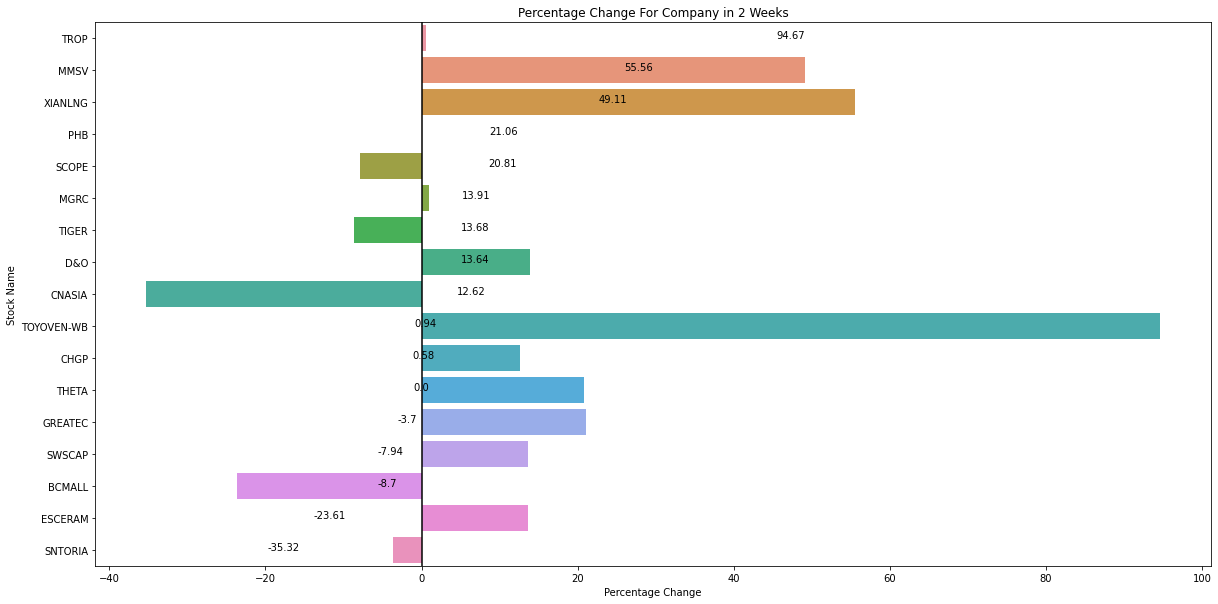

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='pct_chg_in_2weeks',y='stock_name',data=CorrDis)
for i in range(len(dis)):
 plt.text(dis[i]/2,i, str(round(dis[i],2)),
           fontdict= dict(color = 'black', fontsize =10),
           horizontalalignment= 'center')
plt.axvline(x=0,linestyle='solid',color='black')           
plt.title('Percentage Change For Company in 2 Weeks')
plt.xlabel('Percentage Change')
plt.ylabel('Stock Name')

Text(0.5, 1.0, 'Relationship between Percentage Share and Percentage Change for 2 Weeks (Disposed)')

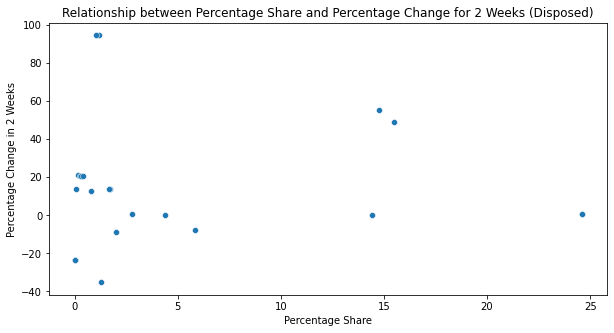

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='pct_share',y='pct_chg_in_2weeks',data = CorrDis)
plt.xlabel('Percentage Share')
plt.ylabel('Percentage Change in 2 Weeks')
plt.title('Relationship between Percentage Share and Percentage Change for 2 Weeks (Disposed)')

Text(0.5, 1.0, 'Relationship between Volume Share and Percentage Change for 2 Weeks (Disposed)')

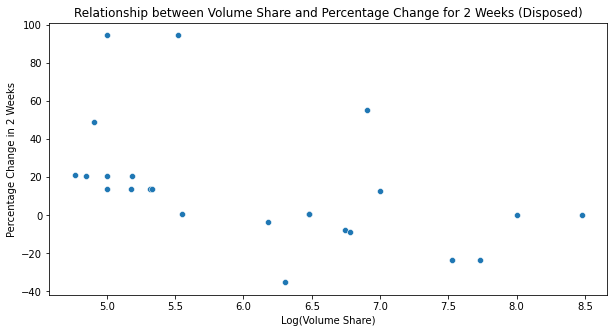

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='share',y='pct_chg_in_2weeks',data = CorrDis)
plt.xlabel('Log(Volume Share)')
plt.ylabel('Percentage Change in 2 Weeks')
plt.title('Relationship between Volume Share and Percentage Change for 2 Weeks (Disposed)')

In [ ]:
test = test.append(CorrDis)
test

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description,pct_chg_in_2weeks
115,3119447,SENI JAYA CORPORATION BERHAD,SJC,Datin Lee Nai Yee,04/01/2021,5.903090,Acquired,"RM680,000.00",Acquisition of shares,"16,743,130",41.307,Ordinary shares,0.000000
82,3118883,TOP GLOVE CORPORATION BHD,TOPGLOV,RHB NOMINEES (TEMPATAN) SDN BHD PLEDGED SECURI...,04/01/2021,6.558709,Acquired,RM5.5217 Per Share,Acquisition of shares.,"2,105,671,456",26.247,Ordinary Shares,11.636361
97,3119084,SCICOM (MSC) BERHAD,SCICOM,Dato' Sri Leo Suresh Ariyanayakam,04/01/2021,4.477121,Acquired,RM0.93 per share,Acquisition of shares,"90,460,763",25.449,Ordinary Shares,-0.537634
108,3119288,CRG INCORPORATED BERHAD,CRG,CGS-CIMB Nominees (Tempatan) Sdn. Bhd. - Pledg...,04/01/2021,5.968996,Acquired,NaN,Acquisition of Ordinary Shares,"161,016,340",19.986,Ordinary Shares,17.647059
113,3119435,CAREPLUS GROUP BERHAD,CAREPLS,RHB Nominees (Tempatan) Sdn Bhd (Pledged secur...,04/01/2021,4.698970,Acquired,"RM99,000.00",Acquisition of shares via open market,"103,762,200",18.863,Ordinary shares,20.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,3119221,SWS CAPITAL BERHAD,SWSCAP,PIONG YEW PENG,04/01/2021,5.000000,Disposed,"RM79,539.84",Open market deal,"150,000",0.072,Ordinary shares,13.636366
77,3118646,BCM ALLIANCE BERHAD,BCMALL,Lo Ling,04/01/2021,7.731811,Disposed,NaN,Disposal of ordinary shares via off market. \r...,0,0.000,Ordinary Shares,-23.611112
76,3118645,BCM ALLIANCE BERHAD,BCMALL,Koh Pee Seng,04/01/2021,7.528806,Disposed,NaN,Disposal of ordinary shares via off market. \r...,0,0.000,Ordinary Shares,-23.611112
5,3119392,ES CERAMICS TECHNOLOGY BHD,ESCERAM,RITHAUDDIN HUSSEIN JAMALATIFF BIN JAMALUDDIN,07/01/2021,5.176091,Disposed,RM0.30 per warrant,Disposal of Warrants,NaN,NaN,Warrants B (2020/2023),13.684216


# ***OTHERS (AMENDMENT)***

In [ ]:
Others = Bursa[Bursa['trans_type']=='Others'].sort_values(by=['pct_share'],ascending=0).head(12)
Others

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
76,3119227,SOLUTION GROUP BERHAD,SOLUTN-WA,LIM YONG HEW,5/1/2021,6.000000,Others,RM0.20,Exercise of Warrants,"13,054,796",18.836,Warrants
75,3119228,SOLUTION GROUP BERHAD,SOLUTN,LIM YONG HEW,5/1/2021,6.000000,Others,RM0.20,Exercise of Warrants,"59,325,581",15.993,Ordinary shares
10,3119194,CAELY HOLDINGS BHD,CAELY,Dato' Chuah Chin Lai,6/1/2021,6.301030,Others,RM0.19 per warrant,"Acquisition of 2,000,000 ordinary shares throu...","16,055,400",7.822,Ordinary Shares
87,3118948,SWS CAPITAL BERHAD,SWSCAP,TAN KEAN AIK,4/1/2021,5.602060,Others,"RM272,000",Subscription of shares via Employee Share Opti...,"15,628,525",7.452,Ordinary shares
9,3119191,CAELY HOLDINGS BHD,CAELY,Dato' Chuah Chin Lai,6/1/2021,6.301030,Others,RM0.19 per warrant,"Acquisition of 2,000,000 ordinary shares throu...","12,363,700",6.023,Ordinary Share
86,3118950,SWS CAPITAL BERHAD,SWSCAP,DATO' SERI MR. SERM JUTHAMONGKHON,4/1/2021,5.698970,Others,"RM340,000",Subscription of shares via Employee Share Opti...,"10,537,125",5.024,Ordinary shares
14,3119196,CAELY HOLDINGS BHD,CAELY-WA,Dato' Chuah Chin Lai,6/1/2021,6.301030,Others,RM0.19 per warrant,"Exercised of 2,000,000 Warrants 2018/2021 at a...","1,029,100",2.963,Warrants
31,3119398,GDEX BERHAD,GDEX,Teong Teck Lean,5/1/2021,7.109468,Others,NaN,Free warrants of 1 warrant C for every 8 exist...,"16,289,417",2.314,Warrants C
84,3118946,SWS CAPITAL BERHAD,SWSCAP,CHUA HEOK WEE,4/1/2021,5.698970,Others,"RM340,000",Subscription of shares via Employee Share Opti...,"2,182,056",1.040,Ordinary Shares
77,3119133,SUPERMAX CORPORATION BERHAD,SUPERMX,Alliancegroup Nominees (Tempatan) Sdn Bhd - Pl...,5/1/2021,4.698970,Others,NaN,Shares received via Share dividend distributio...,"17,528,874",0.668,Ordinary Shares


In [ ]:
#SOLUTN
#CAELY
#SWSCAP
#GDEX
#SUPERMX

start = datetime.datetime(2021,1,1)
end = datetime.datetime(2021,1,31)

Solutn = web.DataReader('0093.kl','yahoo',start,end).reset_index()
Caely = web.DataReader('7154.kl','yahoo',start,end).reset_index()
Swscap = web.DataReader('7186.kl','yahoo',start,end).reset_index()
Gdex = web.DataReader('0078.kl','yahoo',start,end).reset_index()
Supermx = web.DataReader('7106.kl','yahoo',start,end).reset_index()

In [ ]:
time= datetime.datetime(2021,1,4)

Text(0, 0.5, 'SWS CAPITAL BERHAD')

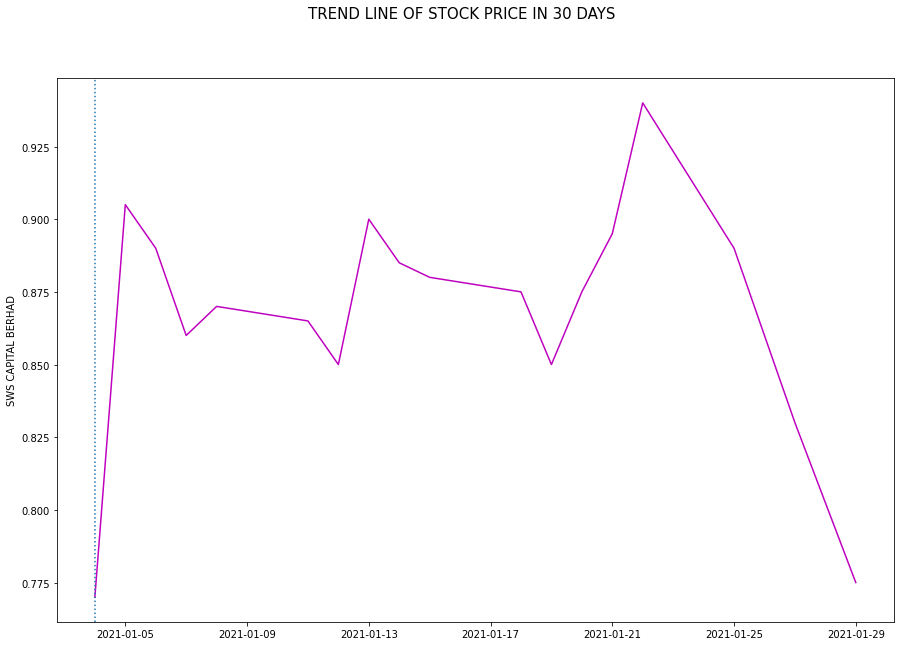

In [ ]:
fig,(ax1) = plt.subplots(1,1,figsize=(15,10))
fig.suptitle('TREND LINE OF STOCK PRICE IN 30 DAYS',fontsize=15)
ax1.plot(Swscap.Date,Swscap.Close, color='m') #Swscap
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('SWS CAPITAL BERHAD')

In [ ]:
time= datetime.datetime(2021,1,6)

Text(0, 0.5, 'CAELY HOLDINGS BHD')

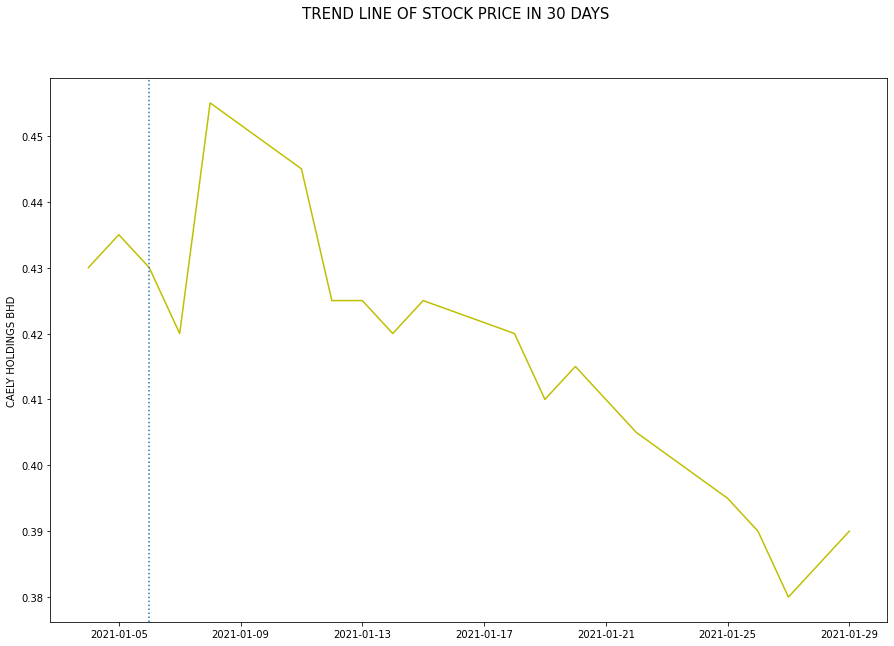

In [ ]:
fig,(ax1) = plt.subplots(1,1,figsize=(15,10))
fig.suptitle('TREND LINE OF STOCK PRICE IN 30 DAYS',fontsize=15)
ax1.plot(Caely.Date,Caely.Close, color='y') #Caely
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('CAELY HOLDINGS BHD')

In [ ]:
time= datetime.datetime(2021,1,5)

Text(0, 0.5, 'SOLUTION GROUP BERHAD')

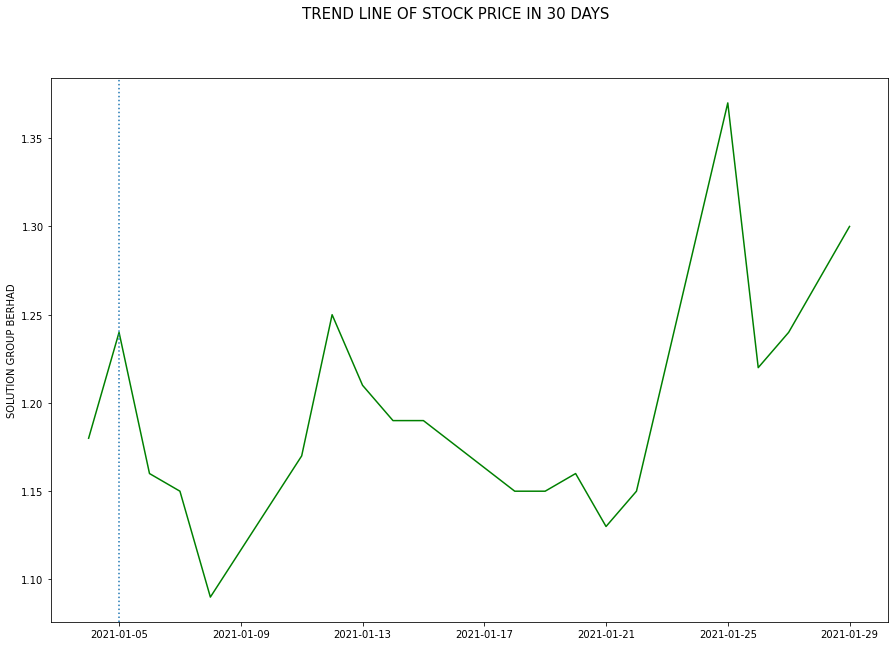

In [ ]:
fig,(ax1) = plt.subplots(1,1,figsize=(15,10))
fig.suptitle('TREND LINE OF STOCK PRICE IN 30 DAYS',fontsize=15)
ax1.plot(Solutn.Date,Solutn.Close, color='g')
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('SOLUTION GROUP BERHAD')

Text(0, 0.5, 'GDEX BERHAD')

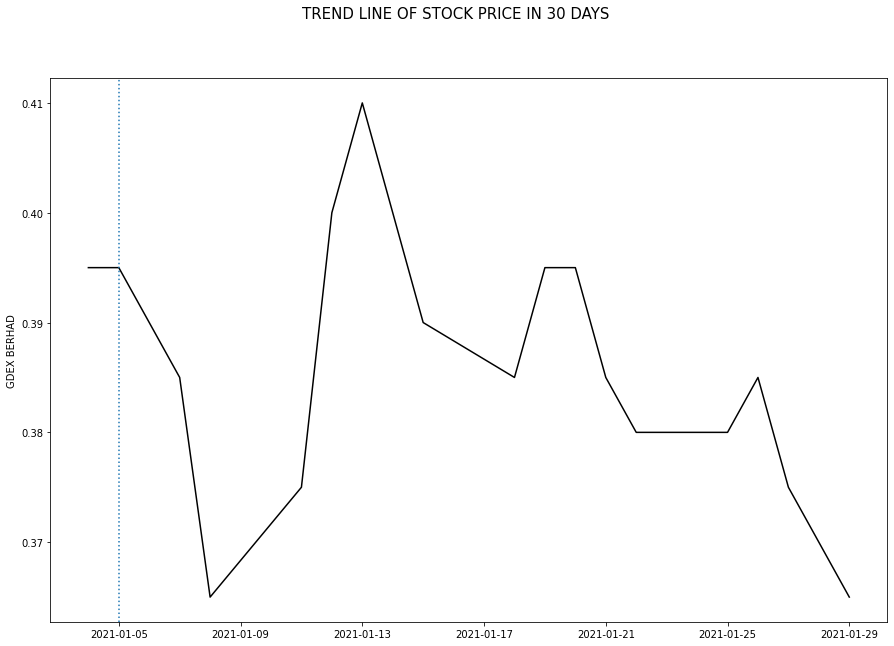

In [ ]:
fig,(ax1) = plt.subplots(1,1,figsize=(15,10))
fig.suptitle('TREND LINE OF STOCK PRICE IN 30 DAYS',fontsize=15)
ax1.plot(Gdex.Date,Gdex.Close, color='k')
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('GDEX BERHAD')

Text(0, 0.5, 'SUPERMAX CORPORATION BERHAD')

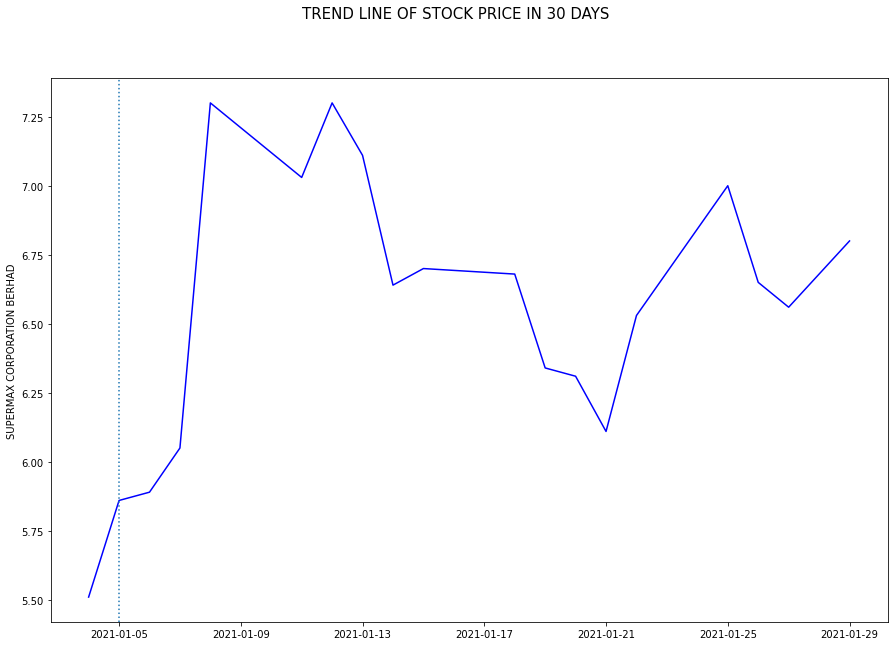

In [ ]:
fig,(ax1) = plt.subplots(1,1,figsize=(15,10))
fig.suptitle('TREND LINE OF STOCK PRICE IN 30 DAYS',fontsize=15)
ax1.plot(Supermx.Date,Supermx.Close, color='b')
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('SUPERMAX CORPORATION BERHAD')

In [ ]:
CorrOt=Others.sort_values(['pct_share'],ascending=0)
CorrOt

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
76,3119227,SOLUTION GROUP BERHAD,SOLUTN-WA,LIM YONG HEW,5/1/2021,6.000000,Others,RM0.20,Exercise of Warrants,"13,054,796",18.836,Warrants
75,3119228,SOLUTION GROUP BERHAD,SOLUTN,LIM YONG HEW,5/1/2021,6.000000,Others,RM0.20,Exercise of Warrants,"59,325,581",15.993,Ordinary shares
10,3119194,CAELY HOLDINGS BHD,CAELY,Dato' Chuah Chin Lai,6/1/2021,6.301030,Others,RM0.19 per warrant,"Acquisition of 2,000,000 ordinary shares throu...","16,055,400",7.822,Ordinary Shares
87,3118948,SWS CAPITAL BERHAD,SWSCAP,TAN KEAN AIK,4/1/2021,5.602060,Others,"RM272,000",Subscription of shares via Employee Share Opti...,"15,628,525",7.452,Ordinary shares
9,3119191,CAELY HOLDINGS BHD,CAELY,Dato' Chuah Chin Lai,6/1/2021,6.301030,Others,RM0.19 per warrant,"Acquisition of 2,000,000 ordinary shares throu...","12,363,700",6.023,Ordinary Share
86,3118950,SWS CAPITAL BERHAD,SWSCAP,DATO' SERI MR. SERM JUTHAMONGKHON,4/1/2021,5.698970,Others,"RM340,000",Subscription of shares via Employee Share Opti...,"10,537,125",5.024,Ordinary shares
14,3119196,CAELY HOLDINGS BHD,CAELY-WA,Dato' Chuah Chin Lai,6/1/2021,6.301030,Others,RM0.19 per warrant,"Exercised of 2,000,000 Warrants 2018/2021 at a...","1,029,100",2.963,Warrants
31,3119398,GDEX BERHAD,GDEX,Teong Teck Lean,5/1/2021,7.109468,Others,NaN,Free warrants of 1 warrant C for every 8 exist...,"16,289,417",2.314,Warrants C
84,3118946,SWS CAPITAL BERHAD,SWSCAP,CHUA HEOK WEE,4/1/2021,5.698970,Others,"RM340,000",Subscription of shares via Employee Share Opti...,"2,182,056",1.040,Ordinary Shares
77,3119133,SUPERMAX CORPORATION BERHAD,SUPERMX,Alliancegroup Nominees (Tempatan) Sdn Bhd - Pl...,5/1/2021,4.698970,Others,NaN,Shares received via Share dividend distributio...,"17,528,874",0.668,Ordinary Shares


In [ ]:
Company = [Solutn,Solutn,Caely,Swscap,Caely,Swscap,Caely,Gdex,Swscap,Supermx,Swscap,Supermx]

In [ ]:
len(Company)

12

In [ ]:
for i in range (len(Company)):
  print(Company[i])

         Date  High   Low  Open  Close    Volume  Adj Close
0  2021-01-04  1.22  1.15  1.19   1.18   6312100       1.18
1  2021-01-05  1.27  1.15  1.18   1.24  29780300       1.24
2  2021-01-06  1.25  1.15  1.23   1.16  13259800       1.16
3  2021-01-07  1.20  1.10  1.17   1.15  23240000       1.15
4  2021-01-08  1.18  1.05  1.17   1.09  17866000       1.09
5  2021-01-11  1.30  1.08  1.09   1.17  65830800       1.17
6  2021-01-12  1.27  1.15  1.21   1.25  21226400       1.25
7  2021-01-13  1.26  1.20  1.25   1.21  10707800       1.21
8  2021-01-14  1.23  1.16  1.21   1.19  14838700       1.19
9  2021-01-15  1.21  1.17  1.20   1.19   8524800       1.19
10 2021-01-18  1.20  1.13  1.19   1.15  10534500       1.15
11 2021-01-19  1.19  1.14  1.15   1.15   9880700       1.15
12 2021-01-20  1.20  1.15  1.16   1.16   7808100       1.16
13 2021-01-21  1.17  1.12  1.17   1.13   7659100       1.13
14 2021-01-22  1.17  1.13  1.14   1.15   8270500       1.15
15 2021-01-25  1.37  1.14  1.15   1.37  

In [ ]:
pct_chg =[]
for i in range(0,12):
  df=(Company[i].loc[12,'Close']-Company[i].loc[0,'Close'])/(Company[i].loc[0,'Close'])*100
  pct_chg.append(df)
pct_chg

[-1.694913713180618,
 -1.694913713180618,
 -3.4883756389999006,
 13.636366451222964,
 -3.4883756389999006,
 13.636366451222964,
 -3.4883756389999006,
 0.0,
 13.636366451222964,
 14.519050465811903,
 13.636366451222964,
 14.519050465811903]

In [ ]:
CorrOt['pct_chg_for_30days']=pct_chg
CorrOt

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description,pct_chg_for_30days
76,3119227,SOLUTION GROUP BERHAD,SOLUTN-WA,LIM YONG HEW,5/1/2021,6.000000,Others,RM0.20,Exercise of Warrants,"13,054,796",18.836,Warrants,-1.694914
75,3119228,SOLUTION GROUP BERHAD,SOLUTN,LIM YONG HEW,5/1/2021,6.000000,Others,RM0.20,Exercise of Warrants,"59,325,581",15.993,Ordinary shares,-1.694914
10,3119194,CAELY HOLDINGS BHD,CAELY,Dato' Chuah Chin Lai,6/1/2021,6.301030,Others,RM0.19 per warrant,"Acquisition of 2,000,000 ordinary shares throu...","16,055,400",7.822,Ordinary Shares,-3.488376
87,3118948,SWS CAPITAL BERHAD,SWSCAP,TAN KEAN AIK,4/1/2021,5.602060,Others,"RM272,000",Subscription of shares via Employee Share Opti...,"15,628,525",7.452,Ordinary shares,13.636366
9,3119191,CAELY HOLDINGS BHD,CAELY,Dato' Chuah Chin Lai,6/1/2021,6.301030,Others,RM0.19 per warrant,"Acquisition of 2,000,000 ordinary shares throu...","12,363,700",6.023,Ordinary Share,-3.488376
86,3118950,SWS CAPITAL BERHAD,SWSCAP,DATO' SERI MR. SERM JUTHAMONGKHON,4/1/2021,5.698970,Others,"RM340,000",Subscription of shares via Employee Share Opti...,"10,537,125",5.024,Ordinary shares,13.636366
14,3119196,CAELY HOLDINGS BHD,CAELY-WA,Dato' Chuah Chin Lai,6/1/2021,6.301030,Others,RM0.19 per warrant,"Exercised of 2,000,000 Warrants 2018/2021 at a...","1,029,100",2.963,Warrants,-3.488376
31,3119398,GDEX BERHAD,GDEX,Teong Teck Lean,5/1/2021,7.109468,Others,NaN,Free warrants of 1 warrant C for every 8 exist...,"16,289,417",2.314,Warrants C,0.000000
84,3118946,SWS CAPITAL BERHAD,SWSCAP,CHUA HEOK WEE,4/1/2021,5.698970,Others,"RM340,000",Subscription of shares via Employee Share Opti...,"2,182,056",1.040,Ordinary Shares,13.636366
77,3119133,SUPERMAX CORPORATION BERHAD,SUPERMX,Alliancegroup Nominees (Tempatan) Sdn Bhd - Pl...,5/1/2021,4.698970,Others,NaN,Shares received via Share dividend distributio...,"17,528,874",0.668,Ordinary Shares,14.519050


In [ ]:
CorrOt=CorrOt.sort_values(by=['pct_chg_for_30days'],ascending=0)

In [ ]:
dis=set(pct_chg)

In [ ]:
dis=list(dis)
dis

[0.0,
 13.636366451222964,
 14.519050465811903,
 -3.4883756389999006,
 -1.694913713180618]

In [ ]:
dis.sort(reverse=True)

Text(0, 0.5, 'Stock Name')

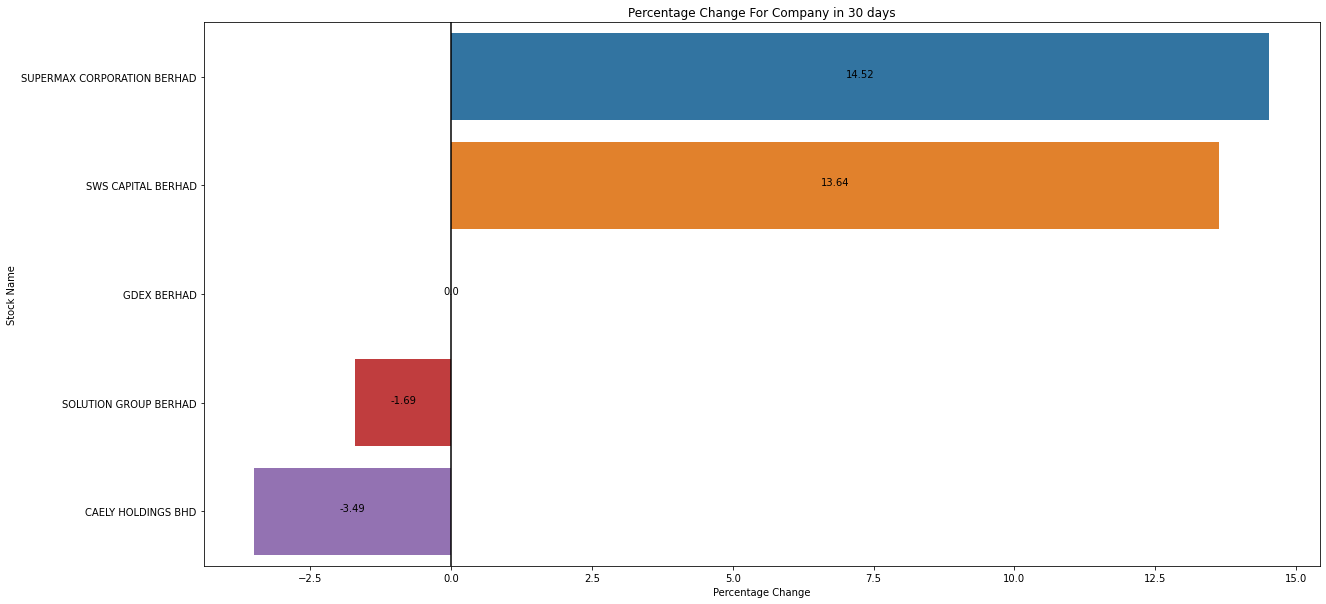

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='pct_chg_for_30days',y='company',data=CorrOt)
for i in range(len(dis)):
 plt.text(dis[i]/2,i, str(round(dis[i],2)),
           fontdict= dict(color = 'black', fontsize =10),
           horizontalalignment= 'center')
plt.axvline(x=0,linestyle='solid',color='black')           
plt.title('Percentage Change For Company in 30 days')
plt.xlabel('Percentage Change')
plt.ylabel('Stock Name')

# ***OTHERS JANUARY 1***

In [ ]:
Oj1 = Others[Others['date']=='1/1/2021'].sort_values(by=['pct_share'],ascending=0)
Oj1

In [ ]:
#Inno

start = datetime.datetime(2020,12,31)
end = datetime.datetime(2021,1,15)

Inno = web.DataReader('6262.kl','yahoo',start,end).reset_index()

In [ ]:
time= datetime.datetime(2021,1,1)

In [ ]:
#Inno

fig,(ax1) = plt.subplots(1,1,figsize=(20,10))
fig.suptitle('Companies with Others transaction type on January 1',fontsize=15)
ax1.plot(Inno.Date,Inno.Close, color='k') #Inno
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('INNO')

# ***OTHERS JANUARY 4***

In [ ]:
Oj4 = Others[Others['date']=='4/1/2021'].sort_values(by=['pct_share'],ascending=0)
Oj4

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
87,3118948,SWS CAPITAL BERHAD,SWSCAP,TAN KEAN AIK,4/1/2021,5.60206,Others,"RM272,000",Subscription of shares via Employee Share Opti...,"15,628,525",7.452,Ordinary shares
86,3118950,SWS CAPITAL BERHAD,SWSCAP,DATO' SERI MR. SERM JUTHAMONGKHON,4/1/2021,5.69897,Others,"RM340,000",Subscription of shares via Employee Share Opti...,"10,537,125",5.024,Ordinary shares
84,3118946,SWS CAPITAL BERHAD,SWSCAP,CHUA HEOK WEE,4/1/2021,5.69897,Others,"RM340,000",Subscription of shares via Employee Share Opti...,"2,182,056",1.040,Ordinary Shares
85,3118947,SWS CAPITAL BERHAD,SWSCAP,CHEW SENG GUAN,4/1/2021,5.69897,Others,"RM340,000",Subscription of shares via Employee Share Opti...,"1,036,125",0.494,Ordinary Shares


In [ ]:
#Swscap

start = datetime.datetime(2021,1,4)
end = datetime.datetime(2021,1,20)

Swscap = web.DataReader('7186.kl','yahoo',start,end).reset_index()

In [ ]:
time= datetime.datetime(2021,1,4)

Text(0, 0.5, 'SWSCAP')

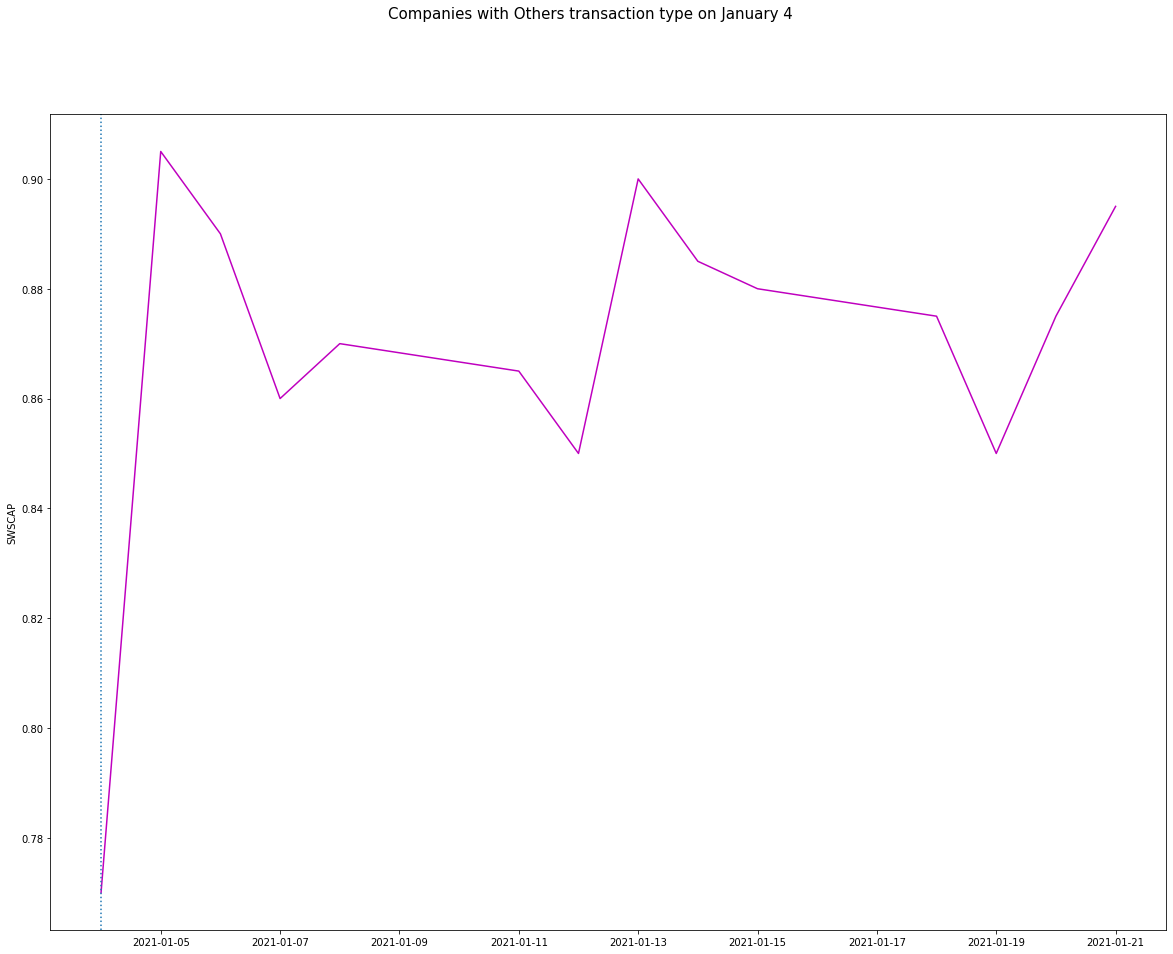

In [ ]:
fig,(ax1) = plt.subplots(1,1,figsize=(20,15))
fig.suptitle('Companies with Others transaction type on January 4',fontsize=15)
ax1.plot(Swscap.Date,Swscap.Close, color='m') #Swscap
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('SWSCAP')

# ***OTHERS JANUARY 5***

In [ ]:
Oj5 = Others[Others['date']=='5/1/2021'].sort_values(by=['pct_share'],ascending=0)
Oj5

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
76,3119227,SOLUTION GROUP BERHAD,SOLUTN-WA,LIM YONG HEW,5/1/2021,"1,000,000",Others,RM0.20,Exercise of Warrants,"13,054,796",18.836,Warrants
75,3119228,SOLUTION GROUP BERHAD,SOLUTN,LIM YONG HEW,5/1/2021,"1,000,000",Others,RM0.20,Exercise of Warrants,"59,325,581",15.993,Ordinary shares
31,3119398,GDEX BERHAD,GDEX,Teong Teck Lean,5/1/2021,"12,866,714",Others,NaN,Free warrants of 1 warrant C for every 8 exist...,"16,289,417",2.314,Warrants C
77,3119133,SUPERMAX CORPORATION BERHAD,SUPERMX,Alliancegroup Nominees (Tempatan) Sdn Bhd - Pl...,5/1/2021,"50,000",Others,NaN,Shares received via Share dividend distributio...,"17,528,874",0.668,Ordinary Shares
78,3119126,SUPERMAX CORPORATION BERHAD,SUPERMX,Tan Chee Keong,5/1/2021,"20,266",Others,NaN,Shares received via Share dividend distributio...,"932,266",0.036,Ordinary Shares
79,3119127,SUPERMAX CORPORATION BERHAD,SUPERMX,Ng Keng Lim @ Ngooi Keng Lim,5/1/2021,"6,666",Others,NaN,Shares received via Share dividend distributio...,"408,888",0.016,Ordinary Shares
32,3119400,GDEX BERHAD,GDEX,Lee Kah Hin,5/1/2021,"89,594",Others,NaN,Free warrants of 1 warrant C for every 8 exist...,"89,594",0.013,Warrants C
49,3119143,JCY INTERNATIONAL BERHAD,JCY,Chang Wei Ming,5/1/2021,"80,000",Others,"RM20,000.00",Exercise of options under the Executives' Shar...,"210,000",0.010,Ordinary Shares
80,3119130,SUPERMAX CORPORATION BERHAD,SUPERMX,Dr Rashid Bin Bakar,5/1/2021,"5,415",Others,NaN,Shares received via Share dividend distributio...,"249,107",0.009,Ordinary Shares
81,3119132,SUPERMAX CORPORATION BERHAD,SUPERMX,Cecile Jaclyn Thai,5/1/2021,"4,444",Others,NaN,Shares received via Share dividend distributio...,"204,444",0.008,Ordinary Shares


In [ ]:
#Solutn
#Gdex
#Supermx
#Jcy

start = datetime.datetime(2021,1,5)
end = datetime.datetime(2021,1,20)

Solutn = web.DataReader('0093.kl','yahoo',start,end).reset_index()
Gdex = web.DataReader('0078.kl','yahoo',start,end).reset_index()
Supermx = web.DataReader('7106.kl','yahoo',start,end).reset_index()
Jcy = web.DataReader('5161.kl','yahoo',start,end).reset_index()

In [ ]:
time= datetime.datetime(2021,1,5)

Text(0, 0.5, 'JCY')

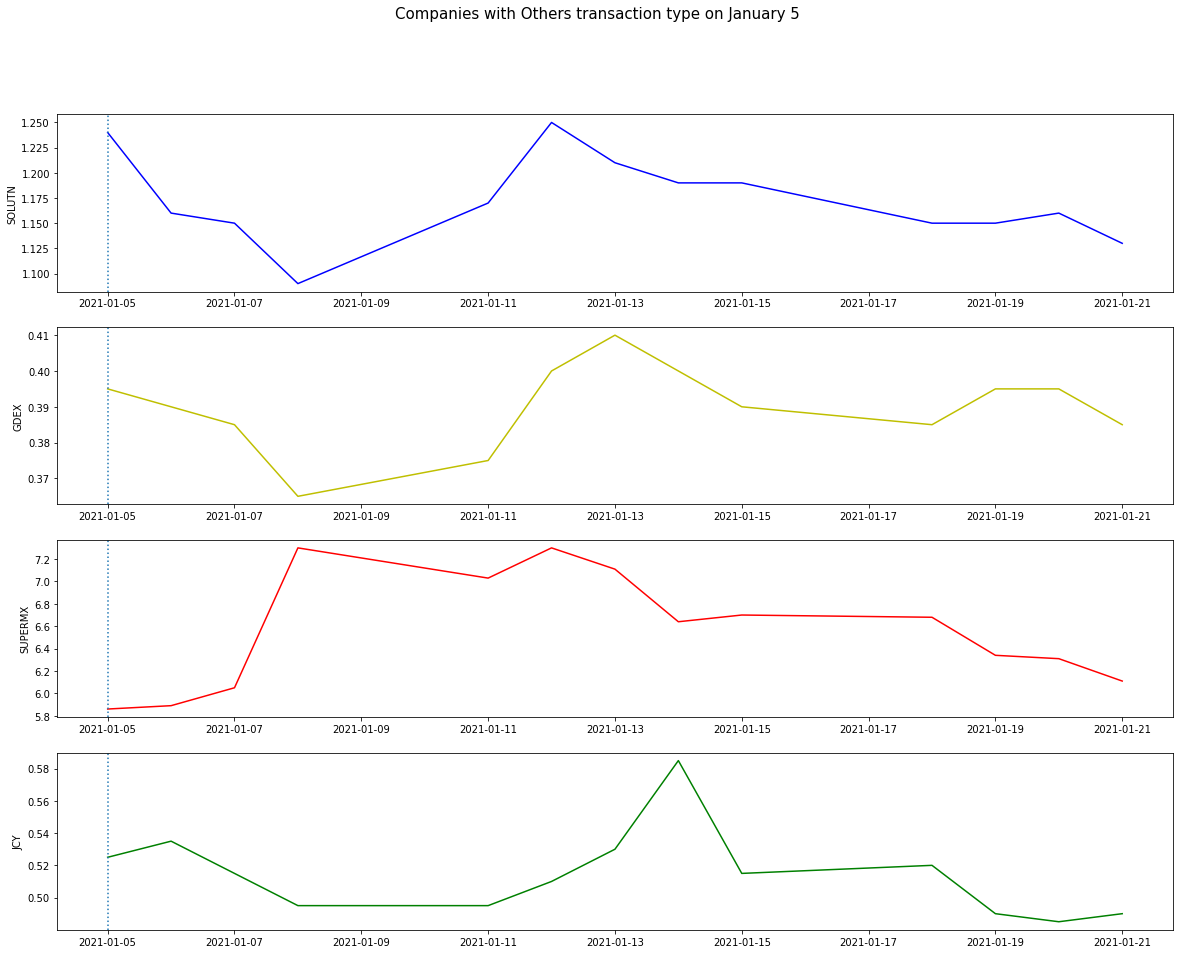

In [ ]:
#Solutn
#Gdex
#Supermx
#Jcy

fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(20,15))
fig.suptitle('Companies with Others transaction type on January 5',fontsize=15)
ax1.plot(Solutn.Date,Solutn.Close, color='b') #Solutn  
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('SOLUTN')

ax2.plot(Gdex.Date,Gdex.Close, color='y')#Gdex
ax2.axvline(x=time,linestyle ='dotted')
ax2.set_ylabel('GDEX')

ax3.plot(Supermx.Date,Supermx.Close, color='r') #Supermx
ax3.axvline(x=time,linestyle ='dotted')
ax3.set_ylabel('SUPERMX')

ax4.plot(Jcy.Date,Jcy.Close, color='g')#Jcy
ax4.axvline(x=time,linestyle ='dotted')
ax4.set_ylabel('JCY')

# ***OTHERS JANUARY 6***

In [ ]:
Oj6 = Others[Others['date']=='6/1/2021'].sort_values(by=['pct_share'],ascending=0)
Oj6

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
10,3119194,CAELY HOLDINGS BHD,CAELY,Dato' Chuah Chin Lai,6/1/2021,"2,000,000",Others,RM0.19 per warrant,"Acquisition of 2,000,000 ordinary shares throu...","16,055,400",7.822,Ordinary Shares
9,3119191,CAELY HOLDINGS BHD,CAELY,Dato' Chuah Chin Lai,6/1/2021,"2,000,000",Others,RM0.19 per warrant,"Acquisition of 2,000,000 ordinary shares throu...","12,363,700",6.023,Ordinary Share
14,3119196,CAELY HOLDINGS BHD,CAELY-WA,Dato' Chuah Chin Lai,6/1/2021,"2,000,000",Others,RM0.19 per warrant,"Exercised of 2,000,000 Warrants 2018/2021 at a...","1,029,100",2.963,Warrants
13,3119195,CAELY HOLDINGS BHD,CAELY-WA,Dato' Chuah Chin Lai,6/1/2021,"2,000,000",Others,RM0.19 per warrant,"Exercised of 2,000,000 Warrants 2018/2021 by h...",0,0.000,Warrants


In [ ]:
#Caely

start = datetime.datetime(2021,1,6)
end = datetime.datetime(2021,1,21)

Caely = web.DataReader('7154.kl','yahoo',start,end).reset_index()

In [ ]:
time= datetime.datetime(2021,1,6)

Text(0, 0.5, 'CAELY')

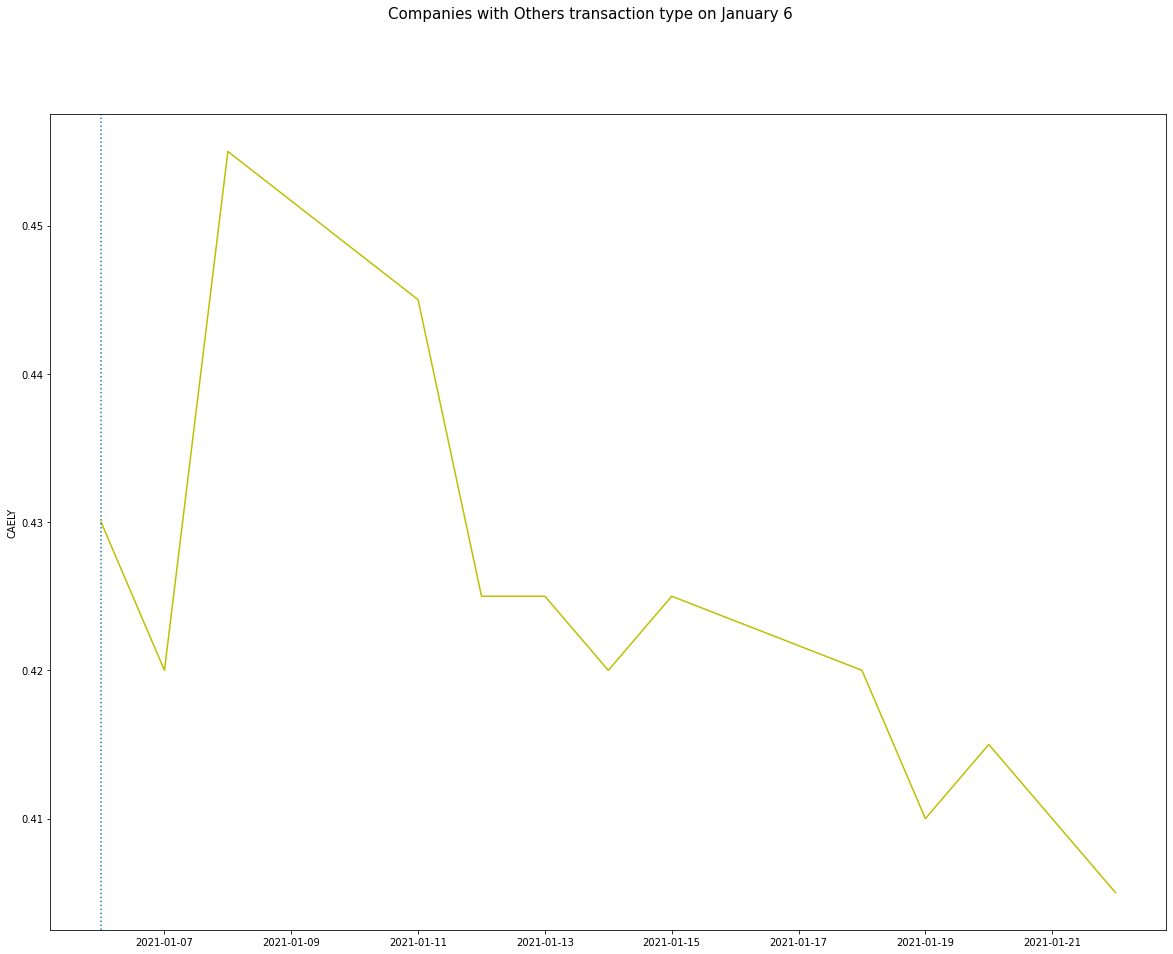

In [ ]:
fig,(ax1) = plt.subplots(1,1,figsize=(20,15))
fig.suptitle('Companies with Others transaction type on January 6',fontsize=15)
ax1.plot(Caely.Date,Caely.Close, color='y') #Caely
ax1.axvline(x=time,linestyle ='dotted')
ax1.set_ylabel('CAELY')

# ***CORRELATION OTHERS***

In [ ]:
CorrOt=Others.sort_values(['pct_share'],ascending=0)
CorrOt

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
54,3119227,SOLUTION GROUP BERHAD,SOLUTN-WA,LIM YONG HEW,05/01/2021,6.000000,Others,RM0.20,Exercise of Warrants,"13,054,796",18.836,Warrants
55,3119228,SOLUTION GROUP BERHAD,SOLUTN,LIM YONG HEW,05/01/2021,6.000000,Others,RM0.20,Exercise of Warrants,"59,325,581",15.993,Ordinary shares
22,3119194,CAELY HOLDINGS BHD,CAELY,Dato' Chuah Chin Lai,06/01/2021,6.301030,Others,RM0.19 per warrant,"Acquisition of 2,000,000 ordinary shares throu...","16,055,400",7.822,Ordinary Shares
88,3118948,SWS CAPITAL BERHAD,SWSCAP,TAN KEAN AIK,04/01/2021,5.602060,Others,"RM272,000",Subscription of shares via Employee Share Opti...,"15,628,525",7.452,Ordinary shares
21,3119191,CAELY HOLDINGS BHD,CAELY,Dato' Chuah Chin Lai,06/01/2021,6.301030,Others,RM0.19 per warrant,"Acquisition of 2,000,000 ordinary shares throu...","12,363,700",6.023,Ordinary Share
89,3118950,SWS CAPITAL BERHAD,SWSCAP,DATO' SERI MR. SERM JUTHAMONGKHON,04/01/2021,5.698970,Others,"RM340,000",Subscription of shares via Employee Share Opti...,"10,537,125",5.024,Ordinary shares
24,3119196,CAELY HOLDINGS BHD,CAELY-WA,Dato' Chuah Chin Lai,06/01/2021,6.301030,Others,RM0.19 per warrant,"Exercised of 2,000,000 Warrants 2018/2021 at a...","1,029,100",2.963,Warrants
60,3119398,GDEX BERHAD,GDEX,Teong Teck Lean,05/01/2021,7.109468,Others,NaN,Free warrants of 1 warrant C for every 8 exist...,"16,289,417",2.314,Warrants C
86,3118946,SWS CAPITAL BERHAD,SWSCAP,CHUA HEOK WEE,04/01/2021,5.698970,Others,"RM340,000",Subscription of shares via Employee Share Opti...,"2,182,056",1.040,Ordinary Shares
48,3119133,SUPERMAX CORPORATION BERHAD,SUPERMX,Alliancegroup Nominees (Tempatan) Sdn Bhd - Pl...,05/01/2021,4.698970,Others,NaN,Shares received via Share dividend distributio...,"17,528,874",0.668,Ordinary Shares


In [ ]:
#Swscap
#Supermx
#Solutn
#Jcy
#Inno
#Gdex
#Caely

start = datetime.datetime(2021,1,1)
end = datetime.datetime(2021,1,31)

Swscap = web.DataReader('7186.kl','yahoo',start,end).reset_index()
Supermx = web.DataReader('7106.kl','yahoo',start,end).reset_index()
Solutn = web.DataReader('0093.kl','yahoo',start,end).reset_index()
Jcy = web.DataReader('5161.kl','yahoo',start,end).reset_index()
Inno = web.DataReader('6262.kl','yahoo',start,end).reset_index()
Gdex = web.DataReader('0078.kl','yahoo',start,end).reset_index()
Caely = web.DataReader('7154.kl','yahoo',start,end).reset_index()

In [ ]:
Company = [Solutn,Solutn,Caely,Swscap,Caely,Swscap,Caely,Gdex,Swscap,Supermx,Swscap,Supermx,Inno,Supermx,Gdex,Jcy,Supermx,Supermx,Supermx,Gdex,Caely]

In [ ]:
len(Company)

21

In [ ]:
for i in range (len(Company)):
  print(Company[i])

         Date  High   Low  Open  Close    Volume  Adj Close
0  2021-01-04  1.22  1.15  1.19   1.18   6312100       1.18
1  2021-01-05  1.27  1.15  1.18   1.24  29780300       1.24
2  2021-01-06  1.25  1.15  1.23   1.16  13259800       1.16
3  2021-01-07  1.20  1.10  1.17   1.15  23240000       1.15
4  2021-01-08  1.18  1.05  1.17   1.09  17866000       1.09
5  2021-01-11  1.30  1.08  1.09   1.17  65830800       1.17
6  2021-01-12  1.27  1.15  1.21   1.25  21226400       1.25
7  2021-01-13  1.26  1.20  1.25   1.21  10707800       1.21
8  2021-01-14  1.23  1.16  1.21   1.19  14838700       1.19
9  2021-01-15  1.21  1.17  1.20   1.19   8524800       1.19
10 2021-01-18  1.20  1.13  1.19   1.15  10534500       1.15
11 2021-01-19  1.19  1.14  1.15   1.15   9880700       1.15
12 2021-01-20  1.20  1.15  1.16   1.16   7808100       1.16
13 2021-01-21  1.17  1.12  1.17   1.13   7659100       1.13
14 2021-01-22  1.17  1.13  1.14   1.15   8270500       1.15
15 2021-01-25  1.37  1.14  1.15   1.37  

In [ ]:
pct_chg =[]
for i in range(0,21):
  df=(Company[i].loc[12,'Close']-Company[i].loc[0,'Close'])/(Company[i].loc[0,'Close'])*100
  pct_chg.append(df)
pct_chg

[-1.694913713180618,
 -1.694913713180618,
 -3.4883756389999006,
 13.636366451222964,
 -3.4883756389999006,
 13.636366451222964,
 -3.4883756389999006,
 0.0,
 13.636366451222964,
 14.519050465811903,
 13.636366451222964,
 14.519050465811903,
 -8.620691958562439,
 14.519050465811903,
 0.0,
 -5.825237324869397,
 14.519050465811903,
 14.519050465811903,
 14.519050465811903,
 0.0,
 -3.4883756389999006]

In [ ]:
CorrOt['pct_chg_in_2weeks']=pct_chg
CorrOt

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description,pct_chg_in_2weeks
54,3119227,SOLUTION GROUP BERHAD,SOLUTN-WA,LIM YONG HEW,05/01/2021,6.000000,Others,RM0.20,Exercise of Warrants,"13,054,796",18.836,Warrants,-1.694914
55,3119228,SOLUTION GROUP BERHAD,SOLUTN,LIM YONG HEW,05/01/2021,6.000000,Others,RM0.20,Exercise of Warrants,"59,325,581",15.993,Ordinary shares,-1.694914
22,3119194,CAELY HOLDINGS BHD,CAELY,Dato' Chuah Chin Lai,06/01/2021,6.301030,Others,RM0.19 per warrant,"Acquisition of 2,000,000 ordinary shares throu...","16,055,400",7.822,Ordinary Shares,-3.488376
88,3118948,SWS CAPITAL BERHAD,SWSCAP,TAN KEAN AIK,04/01/2021,5.602060,Others,"RM272,000",Subscription of shares via Employee Share Opti...,"15,628,525",7.452,Ordinary shares,13.636366
21,3119191,CAELY HOLDINGS BHD,CAELY,Dato' Chuah Chin Lai,06/01/2021,6.301030,Others,RM0.19 per warrant,"Acquisition of 2,000,000 ordinary shares throu...","12,363,700",6.023,Ordinary Share,-3.488376
89,3118950,SWS CAPITAL BERHAD,SWSCAP,DATO' SERI MR. SERM JUTHAMONGKHON,04/01/2021,5.698970,Others,"RM340,000",Subscription of shares via Employee Share Opti...,"10,537,125",5.024,Ordinary shares,13.636366
24,3119196,CAELY HOLDINGS BHD,CAELY-WA,Dato' Chuah Chin Lai,06/01/2021,6.301030,Others,RM0.19 per warrant,"Exercised of 2,000,000 Warrants 2018/2021 at a...","1,029,100",2.963,Warrants,-3.488376
60,3119398,GDEX BERHAD,GDEX,Teong Teck Lean,05/01/2021,7.109468,Others,NaN,Free warrants of 1 warrant C for every 8 exist...,"16,289,417",2.314,Warrants C,0.000000
86,3118946,SWS CAPITAL BERHAD,SWSCAP,CHUA HEOK WEE,04/01/2021,5.698970,Others,"RM340,000",Subscription of shares via Employee Share Opti...,"2,182,056",1.040,Ordinary Shares,13.636366
48,3119133,SUPERMAX CORPORATION BERHAD,SUPERMX,Alliancegroup Nominees (Tempatan) Sdn Bhd - Pl...,05/01/2021,4.698970,Others,NaN,Shares received via Share dividend distributio...,"17,528,874",0.668,Ordinary Shares,14.519050


In [ ]:
CorrOt=CorrOt.sort_values(by=['pct_chg_in_2weeks'],ascending=0)

In [ ]:
CorrOt

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description,pct_chg_in_2weeks
54,3119227,SOLUTION GROUP BERHAD,SOLUTN-WA,LIM YONG HEW,05/01/2021,6.000000,Others,RM0.20,Exercise of Warrants,"13,054,796",18.836,Warrants,-1.694914
55,3119228,SOLUTION GROUP BERHAD,SOLUTN,LIM YONG HEW,05/01/2021,6.000000,Others,RM0.20,Exercise of Warrants,"59,325,581",15.993,Ordinary shares,-1.694914
22,3119194,CAELY HOLDINGS BHD,CAELY,Dato' Chuah Chin Lai,06/01/2021,6.301030,Others,RM0.19 per warrant,"Acquisition of 2,000,000 ordinary shares throu...","16,055,400",7.822,Ordinary Shares,-3.488376
88,3118948,SWS CAPITAL BERHAD,SWSCAP,TAN KEAN AIK,04/01/2021,5.602060,Others,"RM272,000",Subscription of shares via Employee Share Opti...,"15,628,525",7.452,Ordinary shares,13.636366
21,3119191,CAELY HOLDINGS BHD,CAELY,Dato' Chuah Chin Lai,06/01/2021,6.301030,Others,RM0.19 per warrant,"Acquisition of 2,000,000 ordinary shares throu...","12,363,700",6.023,Ordinary Share,-3.488376
89,3118950,SWS CAPITAL BERHAD,SWSCAP,DATO' SERI MR. SERM JUTHAMONGKHON,04/01/2021,5.698970,Others,"RM340,000",Subscription of shares via Employee Share Opti...,"10,537,125",5.024,Ordinary shares,13.636366
24,3119196,CAELY HOLDINGS BHD,CAELY-WA,Dato' Chuah Chin Lai,06/01/2021,6.301030,Others,RM0.19 per warrant,"Exercised of 2,000,000 Warrants 2018/2021 at a...","1,029,100",2.963,Warrants,-3.488376
60,3119398,GDEX BERHAD,GDEX,Teong Teck Lean,05/01/2021,7.109468,Others,NaN,Free warrants of 1 warrant C for every 8 exist...,"16,289,417",2.314,Warrants C,0.000000
86,3118946,SWS CAPITAL BERHAD,SWSCAP,CHUA HEOK WEE,04/01/2021,5.698970,Others,"RM340,000",Subscription of shares via Employee Share Opti...,"2,182,056",1.040,Ordinary Shares,13.636366
48,3119133,SUPERMAX CORPORATION BERHAD,SUPERMX,Alliancegroup Nominees (Tempatan) Sdn Bhd - Pl...,05/01/2021,4.698970,Others,NaN,Shares received via Share dividend distributio...,"17,528,874",0.668,Ordinary Shares,14.519050


In [ ]:
dis=set(pct_chg)

In [ ]:
dis=list(dis)
dis

[0.0,
 13.636366451222964,
 14.519050465811903,
 -8.620691958562439,
 -5.825237324869397,
 -3.4883756389999006,
 -1.694913713180618]

In [ ]:
dis.sort(reverse=True)

Text(0, 0.5, 'Stock Name')

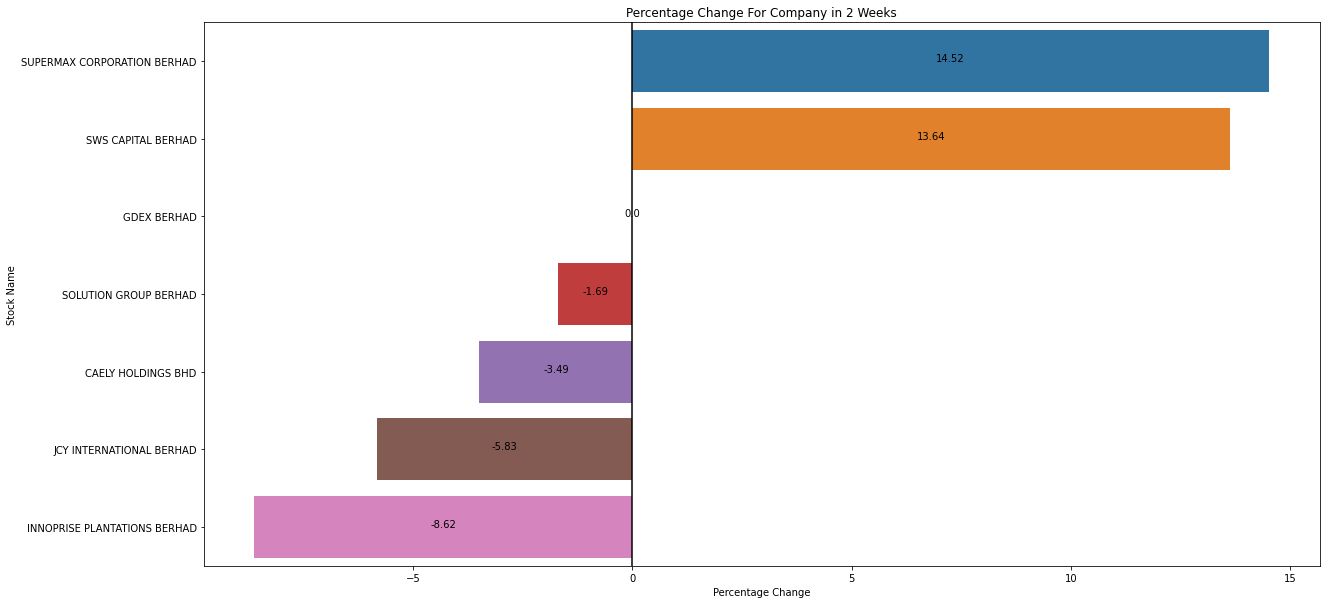

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='pct_chg_in_2weeks',y='company',data=CorrOt)
for i in range(len(dis)):
 plt.text(dis[i]/2,i, str(round(dis[i],2)),
           fontdict= dict(color = 'black', fontsize =10),
           horizontalalignment= 'center')
plt.axvline(x=0,linestyle='solid',color='black')           
plt.title('Percentage Change For Company in 2 Weeks')
plt.xlabel('Percentage Change')
plt.ylabel('Stock Name')

Text(0.5, 1.0, 'Relationship between Percentage Share and Percentage Change for 2 Weeks (Others)')

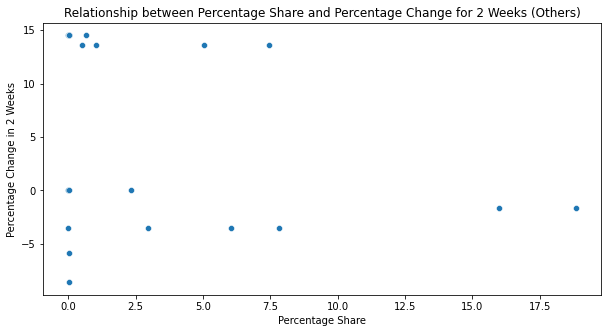

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='pct_share',y='pct_chg_in_2weeks',data = CorrOt)
plt.xlabel('Percentage Share')
plt.ylabel('Percentage Change in 2 Weeks')
plt.title('Relationship between Percentage Share and Percentage Change for 2 Weeks (Others)')

Text(0.5, 1.0, 'Relationship between Volume Share and Percentage Change for 2 Weeks (Others)')

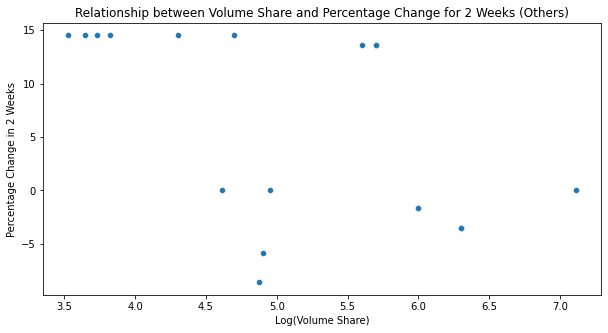

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='share',y='pct_chg_in_2weeks',data = CorrOt)
plt.xlabel('Log(Volume Share)')
plt.ylabel('Percentage Change in 2 Weeks')
plt.title('Relationship between Volume Share and Percentage Change for 2 Weeks (Others)')

In [ ]:
test = test.append(CorrOt)
test

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description,pct_chg_in_2weeks
115,3119447,SENI JAYA CORPORATION BERHAD,SJC,Datin Lee Nai Yee,04/01/2021,5.903090,Acquired,"RM680,000.00",Acquisition of shares,"16,743,130",41.307,Ordinary shares,0.000000
82,3118883,TOP GLOVE CORPORATION BHD,TOPGLOV,RHB NOMINEES (TEMPATAN) SDN BHD PLEDGED SECURI...,04/01/2021,6.558709,Acquired,RM5.5217 Per Share,Acquisition of shares.,"2,105,671,456",26.247,Ordinary Shares,11.636361
97,3119084,SCICOM (MSC) BERHAD,SCICOM,Dato' Sri Leo Suresh Ariyanayakam,04/01/2021,4.477121,Acquired,RM0.93 per share,Acquisition of shares,"90,460,763",25.449,Ordinary Shares,-0.537634
108,3119288,CRG INCORPORATED BERHAD,CRG,CGS-CIMB Nominees (Tempatan) Sdn. Bhd. - Pledg...,04/01/2021,5.968996,Acquired,NaN,Acquisition of Ordinary Shares,"161,016,340",19.986,Ordinary Shares,17.647059
113,3119435,CAREPLUS GROUP BERHAD,CAREPLS,RHB Nominees (Tempatan) Sdn Bhd (Pledged secur...,04/01/2021,4.698970,Acquired,"RM99,000.00",Acquisition of shares via open market,"103,762,200",18.863,Ordinary shares,20.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,3119130,SUPERMAX CORPORATION BERHAD,SUPERMX,Dr Rashid Bin Bakar,05/01/2021,3.733598,Others,NaN,Shares received via Share dividend distributio...,"249,107",0.009,Ordinary Shares,14.519050
47,3119132,SUPERMAX CORPORATION BERHAD,SUPERMX,Cecile Jaclyn Thai,05/01/2021,3.647774,Others,NaN,Shares received via Share dividend distributio...,"204,444",0.008,Ordinary Shares,14.519050
49,3119134,SUPERMAX CORPORATION BERHAD,SUPERMX,Albert Saychuan Cheok,05/01/2021,3.529430,Others,NaN,Shares received via Share dividend distributio...,"155,690",0.006,Ordinary Shares,14.519050
61,3119399,GDEX BERHAD,GDEX,Lim Chee Seong,05/01/2021,4.615424,Others,NaN,Free warrants of 1 warrant C for every 8 exist...,"41,250",0.006,Warrants C,0.000000


# ***TRANSFERRED***

In [ ]:
Trans = Bursa[Bursa['trans_type']=='Transferred'].sort_values(by=['pct_share'],ascending=0)
Trans

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
50,3118829,KEJURUTERAAN ASASTERA BERHAD,KAB,Dato' Lai Keng Onn,4/1/2021,7.301030,Transferred,NaN,Transfer of Shares to Fastrans Ventures Sdn Bhd,"354,080,000",38.009,Ordinary Shares
52,3119419,LEONG HUP INTERNATIONAL BERHAD,LHI,Kenanga Nominees (Tempatan) Sdn. Bhd. Pledged ...,6/1/2021,6.954243,Transferred,NaN,"(i) Transfer of 9,000,000 ordinary shares from...","52,247,007",1.431,Ordinary Shares
109,3118812,UNITED MALACCA BERHAD,UMCCA,TEE KIM TEE @ TEE CHING TEE,5/1/2021,5.778151,Transferred,NaN,Transfer of shares by Parent to Director,"1,268,400",0.605,Ordinary shares
108,3118807,UNITED MALACCA BERHAD,UMCCA,TEE KIM TEE @ TEE CHING TEE,5/1/2021,6.255273,Transferred,NaN,Transfer of shares by sibling.,0,0.000,Ordinary shares


In [ ]:
#Kab
#Lhi
#Umcca

start = datetime.datetime(2021,1,1)
end = datetime.datetime(2021,1,31)

Kab= web.DataReader('0193.kl','yahoo',start,end).reset_index()
Lhi = web.DataReader('6633.kl','yahoo',start,end).reset_index()
Umcca = web.DataReader('2593.kl','yahoo',start,end).reset_index()

In [ ]:
time1= datetime.datetime(2021,1,4)
time2= datetime.datetime(2021,1,5)
time3= datetime.datetime(2021,1,6)

Text(0, 0.5, 'KEJURUTERAAN ASASTERA BERHAD')

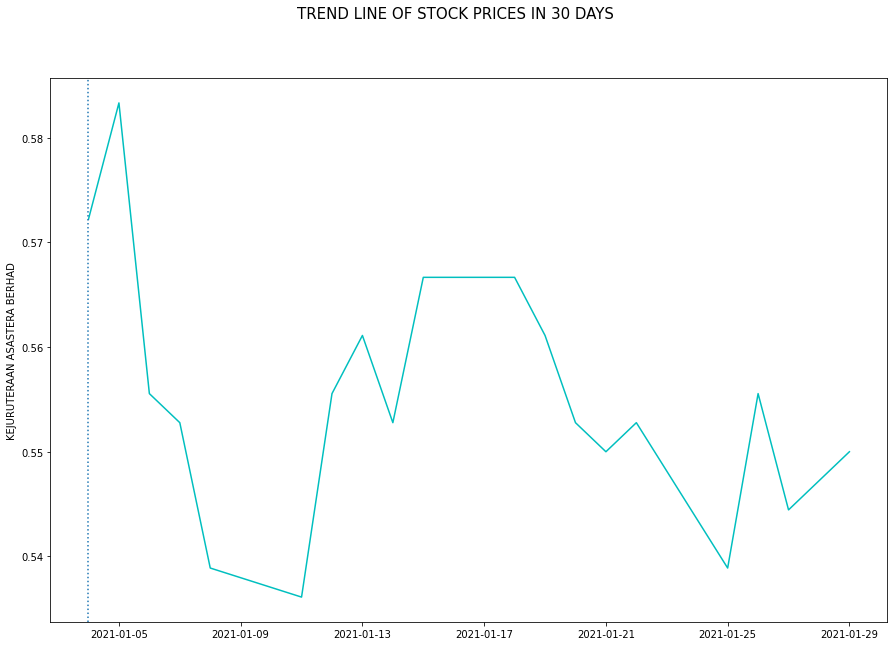

In [ ]:
fig,(ax1) = plt.subplots(1,1,figsize=(15,10))
fig.suptitle('TREND LINE OF STOCK PRICES IN 30 DAYS',fontsize=15)
ax1.plot(Kab.Date,Kab.Close, color='c') #Kab
ax1.axvline(x=time1,linestyle ='dotted')
ax1.set_ylabel('KEJURUTERAAN ASASTERA BERHAD')

Text(0, 0.5, 'UNITED MALACCA BERHAD')

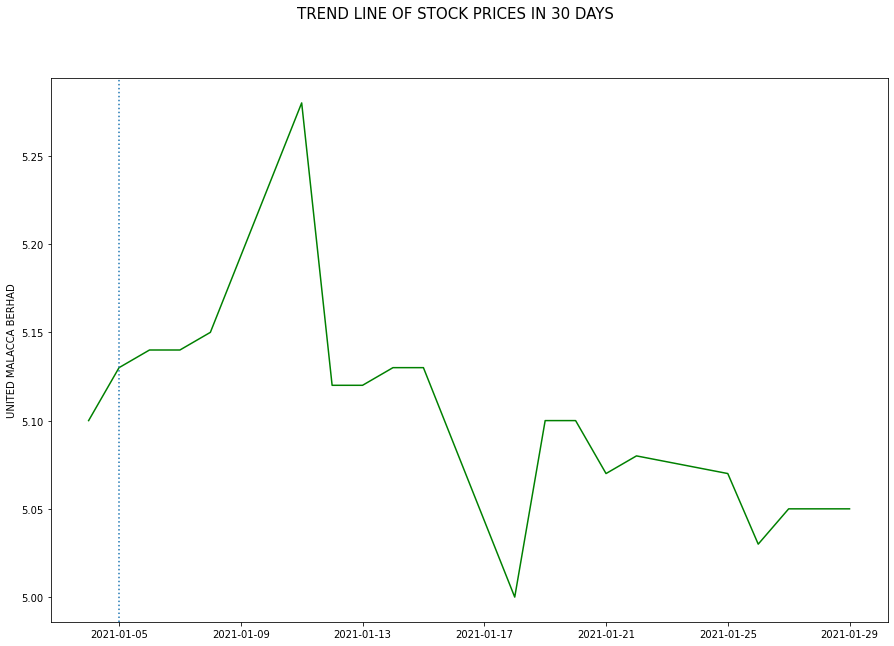

In [ ]:
fig,(ax1) = plt.subplots(1,1,figsize=(15,10))
fig.suptitle('TREND LINE OF STOCK PRICES IN 30 DAYS',fontsize=15)
ax1.plot(Umcca.Date,Umcca.Close, color='g')#Umcca
ax1.axvline(x=time2,linestyle ='dotted')
ax1.set_ylabel('UNITED MALACCA BERHAD')

Text(0, 0.5, 'LEONG HUP INTERNATIONAL BERHAD')

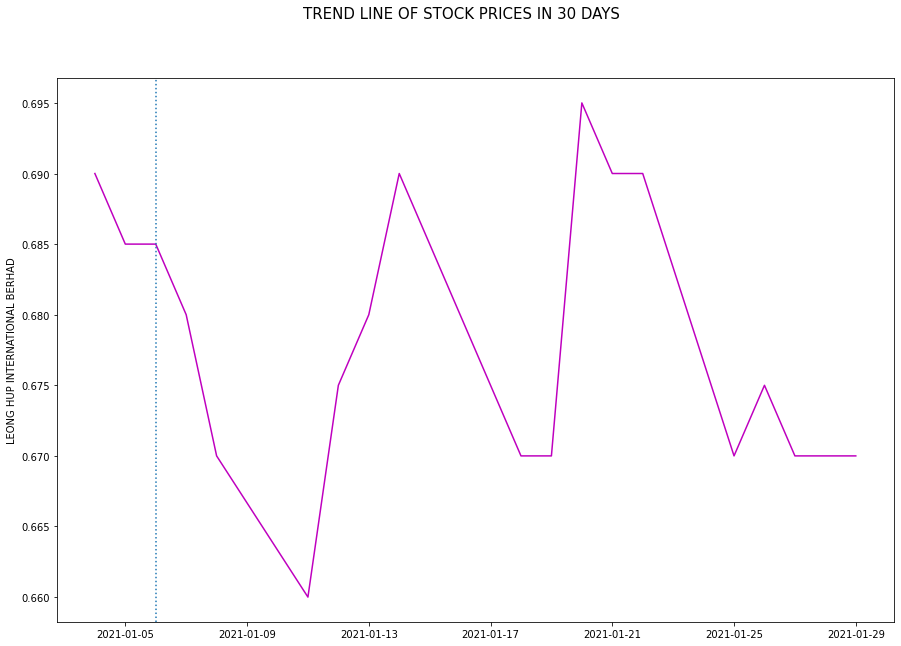

In [ ]:
fig,(ax1) = plt.subplots(1,1,figsize=(15,10))
fig.suptitle('TREND LINE OF STOCK PRICES IN 30 DAYS',fontsize=15)
ax1.plot(Lhi.Date,Lhi.Close, color='m')#Lhi
ax1.axvline(x=time3,linestyle ='dotted')
ax1.set_ylabel('LEONG HUP INTERNATIONAL BERHAD')

In [ ]:
CorrTrans=Trans.sort_values(['pct_share'],ascending=0)
CorrTrans

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description
50,3118829,KEJURUTERAAN ASASTERA BERHAD,KAB,Dato' Lai Keng Onn,4/1/2021,7.301030,Transferred,NaN,Transfer of Shares to Fastrans Ventures Sdn Bhd,"354,080,000",38.009,Ordinary Shares
52,3119419,LEONG HUP INTERNATIONAL BERHAD,LHI,Kenanga Nominees (Tempatan) Sdn. Bhd. Pledged ...,6/1/2021,6.954243,Transferred,NaN,"(i) Transfer of 9,000,000 ordinary shares from...","52,247,007",1.431,Ordinary Shares
109,3118812,UNITED MALACCA BERHAD,UMCCA,TEE KIM TEE @ TEE CHING TEE,5/1/2021,5.778151,Transferred,NaN,Transfer of shares by Parent to Director,"1,268,400",0.605,Ordinary shares
108,3118807,UNITED MALACCA BERHAD,UMCCA,TEE KIM TEE @ TEE CHING TEE,5/1/2021,6.255273,Transferred,NaN,Transfer of shares by sibling.,0,0.000,Ordinary shares


In [ ]:
#Kab
#Lhi
#Umcca

start = datetime.datetime(2021,1,4)
end = datetime.datetime(2021,1,19)

Kab= web.DataReader('0193.kl','yahoo',start,end).reset_index()
Lhi = web.DataReader('6633.kl','yahoo',start,end).reset_index()
Umcca = web.DataReader('2593.kl','yahoo',start,end).reset_index()

In [ ]:
Company = [ Kab,Lhi,Umcca,Umcca]

In [ ]:
for i in range (len(Company)):
  print(Company[i])

         Date      High       Low      Open     Close  Volume  Adj Close
0  2021-01-04  0.583333  0.552777  0.583333  0.572222   36000   0.572222
1  2021-01-05  0.583333  0.555555  0.572222  0.583333  371700   0.583333
2  2021-01-06  0.583333  0.552777  0.572222  0.555555  618660   0.555555
3  2021-01-07  0.555555  0.550000  0.555555  0.552777  246060   0.552777
4  2021-01-08  0.566666  0.538888  0.555555  0.538888  399600   0.538888
5  2021-01-11  0.552777  0.530555  0.530555  0.536111  189540   0.536111
6  2021-01-12  0.583333  0.538888  0.538888  0.555555  385920   0.555555
7  2021-01-13  0.572222  0.561111  0.561111  0.561111  151920   0.561111
8  2021-01-14  0.561111  0.552777  0.552777  0.552777  498960   0.552777
9  2021-01-15  0.583333  0.555555  0.566666  0.566666  304380   0.566666
10 2021-01-18  0.566666  0.550000  0.550000  0.566666    7200   0.566666
11 2021-01-19  0.577777  0.555555  0.561111  0.561111  355140   0.561111
12 2021-01-20  0.561111  0.552777  0.555555  0.5527

In [ ]:
pct_chg =[]
for i in range(0,4):
  df=(Company[i].loc[12,'Close']-Company[i].loc[0,'Close'])/(Company[i].loc[0,'Close'])*100
  pct_chg.append(df)
pct_chg

[-3.3981570560562115, 0.7246369925949435, 0.0, 0.0]

In [ ]:
CorrTrans['pct_chg_in_30days']=pct_chg
CorrTrans

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description,pct_chg_in_30days
50,3118829,KEJURUTERAAN ASASTERA BERHAD,KAB,Dato' Lai Keng Onn,4/1/2021,7.301030,Transferred,NaN,Transfer of Shares to Fastrans Ventures Sdn Bhd,"354,080,000",38.009,Ordinary Shares,-3.398157
52,3119419,LEONG HUP INTERNATIONAL BERHAD,LHI,Kenanga Nominees (Tempatan) Sdn. Bhd. Pledged ...,6/1/2021,6.954243,Transferred,NaN,"(i) Transfer of 9,000,000 ordinary shares from...","52,247,007",1.431,Ordinary Shares,0.724637
109,3118812,UNITED MALACCA BERHAD,UMCCA,TEE KIM TEE @ TEE CHING TEE,5/1/2021,5.778151,Transferred,NaN,Transfer of shares by Parent to Director,"1,268,400",0.605,Ordinary shares,0.000000
108,3118807,UNITED MALACCA BERHAD,UMCCA,TEE KIM TEE @ TEE CHING TEE,5/1/2021,6.255273,Transferred,NaN,Transfer of shares by sibling.,0,0.000,Ordinary shares,0.000000


In [ ]:
CorrTrans=CorrTrans.sort_values(by=['pct_chg_in_30days'],ascending=0)

In [ ]:
dis=set(pct_chg)

In [ ]:
dis=list(dis)
dis

[0.7246369925949435, 0.0, -3.3981570560562115]

In [ ]:
dis.sort(reverse=True)

Text(0, 0.5, 'Stock Name')

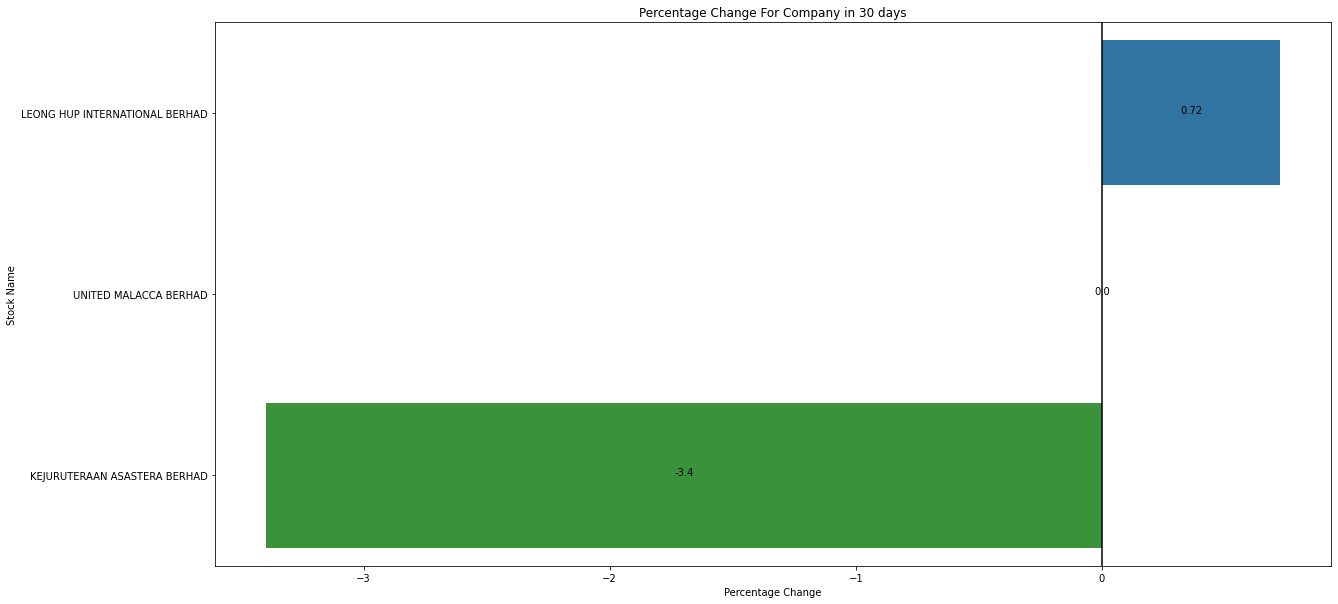

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='pct_chg_in_30days',y='company',data=CorrTrans)
for i in range(len(dis)):
 plt.text(dis[i]/2,i, str(round(dis[i],2)),
           fontdict= dict(color = 'black', fontsize =10),
           horizontalalignment= 'center')
plt.axvline(x=0,linestyle='solid',color='black')           
plt.title('Percentage Change For Company in 30 days')
plt.xlabel('Percentage Change')
plt.ylabel('Stock Name')

Text(0.5, 1.0, 'Relationship between Percentage Share and Percentage Change for 2 Weeks (Others)')

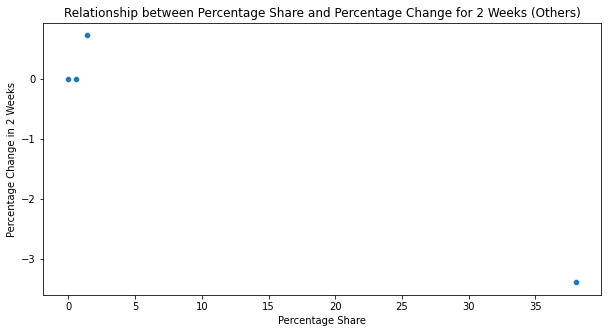

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='pct_share',y='pct_chg_in_2weeks',data = CorrTrans)
plt.xlabel('Percentage Share')
plt.ylabel('Percentage Change in 2 Weeks')
plt.title('Relationship between Percentage Share and Percentage Change for 2 Weeks (Others)')

Text(0.5, 1.0, 'Relationship between Volume Share and Percentage Change for 2 Weeks (Others)')

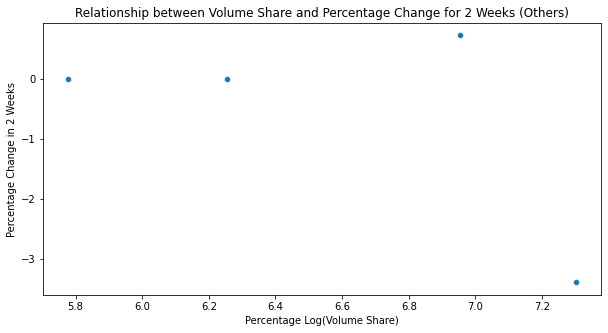

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='share',y='pct_chg_in_2weeks',data = CorrTrans)
plt.xlabel('Percentage Log(Volume Share)')
plt.ylabel('Percentage Change in 2 Weeks')
plt.title('Relationship between Volume Share and Percentage Change for 2 Weeks (Others)')

# ***APPEND DATA***

In [ ]:
Full = test.append(CorrTrans)
Full

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description,pct_chg_in_2weeks
115,3119447,SENI JAYA CORPORATION BERHAD,SJC,Datin Lee Nai Yee,04/01/2021,5.903090,Acquired,"RM680,000.00",Acquisition of shares,"16,743,130",41.307,Ordinary shares,0.000000
82,3118883,TOP GLOVE CORPORATION BHD,TOPGLOV,RHB NOMINEES (TEMPATAN) SDN BHD PLEDGED SECURI...,04/01/2021,6.558709,Acquired,RM5.5217 Per Share,Acquisition of shares.,"2,105,671,456",26.247,Ordinary Shares,11.636361
97,3119084,SCICOM (MSC) BERHAD,SCICOM,Dato' Sri Leo Suresh Ariyanayakam,04/01/2021,4.477121,Acquired,RM0.93 per share,Acquisition of shares,"90,460,763",25.449,Ordinary Shares,-0.537634
108,3119288,CRG INCORPORATED BERHAD,CRG,CGS-CIMB Nominees (Tempatan) Sdn. Bhd. - Pledg...,04/01/2021,5.968996,Acquired,NaN,Acquisition of Ordinary Shares,"161,016,340",19.986,Ordinary Shares,17.647059
113,3119435,CAREPLUS GROUP BERHAD,CAREPLS,RHB Nominees (Tempatan) Sdn Bhd (Pledged secur...,04/01/2021,4.698970,Acquired,"RM99,000.00",Acquisition of shares via open market,"103,762,200",18.863,Ordinary shares,20.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,3119195,CAELY HOLDINGS BHD,CAELY-WA,Dato' Chuah Chin Lai,06/01/2021,6.301030,Others,RM0.19 per warrant,"Exercised of 2,000,000 Warrants 2018/2021 by h...",0,0.000,Warrants,-3.488376
79,3118829,KEJURUTERAAN ASASTERA BERHAD,KAB,Dato' Lai Keng Onn,04/01/2021,7.301030,Transferred,NaN,Transfer of Shares to Fastrans Ventures Sdn Bhd,"354,080,000",38.009,Ordinary Shares,-3.398157
30,3119419,LEONG HUP INTERNATIONAL BERHAD,LHI,Kenanga Nominees (Tempatan) Sdn. Bhd. Pledged ...,06/01/2021,6.954243,Transferred,NaN,"(i) Transfer of 9,000,000 ordinary shares from...","52,247,007",1.431,Ordinary Shares,0.724637
38,3118812,UNITED MALACCA BERHAD,UMCCA,TEE KIM TEE @ TEE CHING TEE,05/01/2021,5.778151,Transferred,NaN,Transfer of shares by Parent to Director,"1,268,400",0.605,Ordinary shares,0.000000


In [ ]:
Full = Full.sort_values('pct_chg_in_2weeks',ascending=0)
Full

,ref,company,stock_name,director,date,share,trans_type,price,reason,updated_share,pct_share,description,pct_chg_in_2weeks
73,3119908,TOYO VENTURES HOLDINGS BERHAD,TOYOVEN-WB,LIM GUAN LEE,05/01/2021,5.518514,Disposed,NaN,Direct Interest:-\r\n- Disposal warrants throu...,"647,000",1.209,Warrants 2018/2023,94.674547
53,3119201,TOYO VENTURES HOLDINGS BERHAD,TOYOVEN-WB,SONG KOK CHEONG,05/01/2021,5.000000,Disposed,NaN,Direct Interest:-\r\n- Disposal warrants throu...,"550,000",1.028,Warrants 2018/2023,94.674547
27,3119350,XIAN LENG HOLDINGS BERHAD,XIANLNG,DATO' NG JET HEONG,06/01/2021,6.903090,Disposed,NaN,Disposal,"11,751,600",14.771,Ordinary Shares,55.555566
43,3119089,MMS VENTURES BERHAD,MMSV,Sim Goay Hoon,05/01/2021,4.903090,Disposed,NaN,Disposal of Shares in Open Market,"31,676,007",15.504,Ordinary Shares,49.112420
59,3119372,VERTICE BERHAD,VERTICE,Wong Kwai Wah,05/01/2021,5.000000,Acquired,RM0.22,Acquisition of shares,"7,754,300",3.335,Ordinary shares,36.363643
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,3119153,POH KONG HOLDINGS BERHAD,POHKONG,Choon Nee Siew,04/01/2021,5.000000,Acquired,NaN,Purchase of shares in the open market.,"1,162,242",0.280,Ordinary Shares,-12.121212
85,3118941,BCM ALLIANCE BERHAD,BCMALL,Yap Kim Choy,04/01/2021,6.579784,Acquired,NaN,Acquisition of ordinary shares via off market,"3,800,000",0.789,Ordinary Shares,-23.611112
77,3118646,BCM ALLIANCE BERHAD,BCMALL,Lo Ling,04/01/2021,7.731811,Disposed,NaN,Disposal of ordinary shares via off market. \r...,0,0.000,Ordinary Shares,-23.611112
76,3118645,BCM ALLIANCE BERHAD,BCMALL,Koh Pee Seng,04/01/2021,7.528806,Disposed,NaN,Disposal of ordinary shares via off market. \r...,0,0.000,Ordinary Shares,-23.611112


In [ ]:
avg = Full.groupby('trans_type')['pct_chg_in_2weeks'].mean().reset_index()
avg

,trans_type,pct_chg_in_2weeks
0,Acquired,1.639667
1,Disposed,14.353916
2,Others,5.231929
3,Transferred,-0.668380


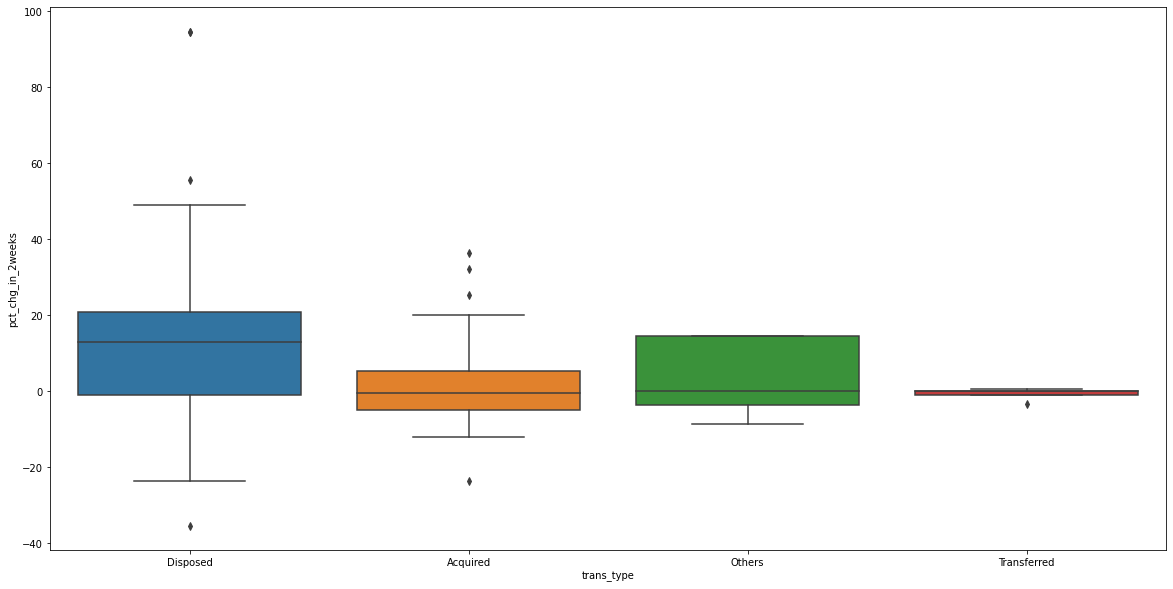

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x=Full['trans_type'],y=Full['pct_chg_in_2weeks'])

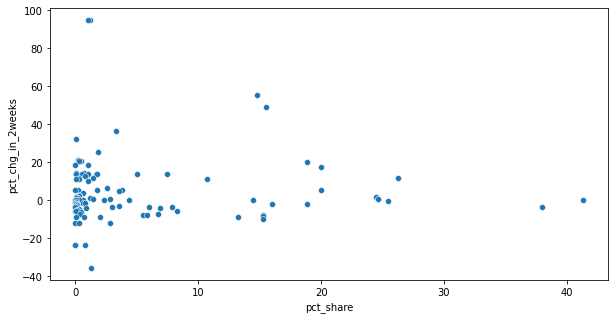

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='pct_share',y='pct_chg_in_2weeks',data=Full)

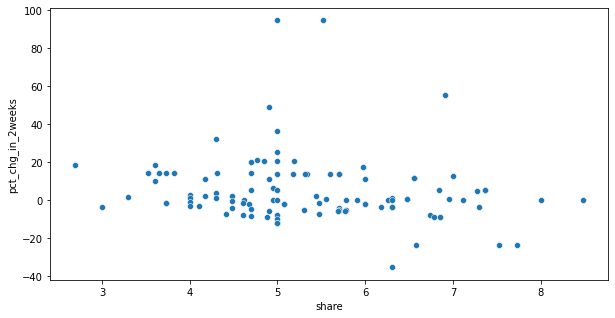

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='share',y='pct_chg_in_2weeks',data=Full)